# Importar as bibliotecas necessárias

In [1]:
#import matplotlib as mpl
# import seaborn as sns
import datetime
# import sklearn
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.decomposition import KernelPCA
import numpy as np
import pandas as pd
# import math
# import keras
import matplotlib.pyplot as plt
import tensorflow as tf
# import seaborn as sns
import json
# Time library to know how much time things take
import time
import random

2025-04-14 19:11:35.037166: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Configurar execução

In [2]:
run_start = time.time()
# run date isoformat
run_date = datetime.datetime.now()
print(run_date.isoformat())
print(run_date.strftime("%Y-%m-%d %H:%M:%S.%f"))

2025-04-14T19:11:37.989324
2025-04-14 19:11:37.989324


In [3]:
NUMBER_OF_SUB_EXPERIMENT = 8
MODEL_TO_USE = 3

# COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - Spread %']
COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - Spread %']
COLUMN_TO_PREDICT = 'IBOVESPA - Close'

# Dataframe constants
# Train, val and test split
START_ON_FIRST_VALID_DATE = True
START_DATE = None # '1995-01-02' # None
END_DATE = None # '2016-04-22' # None
TYPE_OF_UNIT = 'customDays'
# csv have 7993 data rows
TRAINING_SIZE = '1994-01-03'
VALIDATION_SIZE = '2023-10-01'
TESTING_SIZE = '2024-10-01'
FILE = 'data/2 - processed/normalized_data.csv'

# Keras config constants
BATCH_SIZE = 32
MAX_EPOCHS = 500
LEARNING_RATE = 0.01
LEARNING_DECAY = 0.9
DECAY_STEPS = 1000
PATIENCE = 10
# DECAY_EVERY_EPOCHS = 2
NUM_FEATURES = 10 # None # 100
RANDOM_SEED = 509
INPUT_WINDOW_SIZE = 4
OUTPUT_WINDOW_SIZE = 1
# Model constantsNUM_FEATURE
LOSS_FUNCTION = 'MAE'
MISMATCH_PENALITY = 2

# Save data constants
RUN_MOMENT = "2025-04-14 19:11:32"
SAVE_FILE_PATH = 'results/experiment_1'

# Comment to help Orquestrator to find the variables

In [4]:
# # define columns to use and columns to predict
# if NUMBER_OF_SUB_EXPERIMENT == 1:
#     COLUMNS_TO_USE = ['IBOVESPA - Close']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 2:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Spread']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 3:'DXY - Close', 'Gold - Close', 'Brent Crude Oil - Close'
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 5:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 6:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 7:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 8:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 9:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'

In [5]:
MODEL_NAME = ''
if MODEL_TO_USE == 1:
    MODEL_NAME = 'Model_1'
elif MODEL_TO_USE == 2:
    MODEL_NAME = 'Model_2'
elif MODEL_TO_USE == 3:
    MODEL_NAME = 'Model_3'
else:
    # throw error
    raise ValueError("MODEL_TO_USE must be 1, 2 or 3")

In [6]:
# Config fix seed
tf.random.set_seed(RANDOM_SEED)
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

In [7]:
save_file_name = f"{RUN_MOMENT}-s{NUMBER_OF_SUB_EXPERIMENT}-m{MODEL_TO_USE}"

In [8]:
# load normalized data from /data/2 - processed/normalized_data.csv
imported_df = pd.read_csv(FILE, index_col=0)

In [9]:
df_x_values = imported_df.copy()
# order on index
df_x_values = df_x_values.sort_index(ascending=True)
# turn index into column
df_x_values.reset_index(inplace=True)
# remove the first column (index)
df_x_values.drop(columns=['index'], inplace=True)
df_x_values.head()

,IBOVESPA - Close,IBOVESPA - High,IBOVESPA - Low,IBOVESPA - Open,Dólar - Close,Dólar - High,Dólar - Low,Dólar - Open,Dow Jones - Close,Dow Jones - High,...,IBOVESPA - Spread %,Kospi - Spread %,Minério de Ferro - Spread %,Nasdaq - Spread %,Nikkei - Spread %,Petróleo Brent - Spread %,Petróleo WTI - Spread %,S&P 500 - Spread %,STOXX 600 - Spread %,Shanghai SE - Spread %
0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.003941,0.003148,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
1,0.000150,0.000150,0.000049,0.000034,0.0,0.0,0.0,0.0,0.004600,0.003605,...,0.036606,0.0,0.0,0.029525,0.000000,0.0,0.0,0.084905,0.0,0.0
2,0.000299,0.000406,0.000200,0.000183,0.0,0.0,0.0,0.0,0.004961,0.003965,...,0.020442,0.0,0.0,0.119266,0.201590,0.0,0.0,0.065165,0.0,0.0
3,0.000468,0.000484,0.000350,0.000333,0.0,0.0,0.0,0.0,0.005083,0.004311,...,0.008583,0.0,0.0,0.056198,0.049836,0.0,0.0,0.095393,0.0,0.0
4,0.000703,0.000704,0.000519,0.000502,0.0,0.0,0.0,0.0,0.005490,0.004630,...,0.015204,0.0,0.0,0.182793,0.129181,0.0,0.0,0.162195,0.0,0.0


Verificar correlação dos dados

In [10]:
corr = df_x_values.corr()[COLUMN_TO_PREDICT]
corr = corr.sort_values()
print(corr.to_string())

Meta Selic                    -0.258086
IPCA                          -0.183215
INPC                          -0.181477
Taxa acumulada no período     -0.181264
IBOVESPA - High %             -0.028419
IBOVESPA - Low %              -0.025172
IBOVESPA - Close %            -0.023741
IBOVESPA - Open %             -0.023504
HanSeng Index - Spread %      -0.015235
IBOVESPA - Spread %           -0.014234
Dow Jones - Spread %          -0.011542
S&P 500 - Spread %            -0.011357
Nasdaq - Spread %             -0.009685
Nikkei - Spread %             -0.003974
FTSE 100 - Spread %           -0.003755
Minério de Ferro - Spread %    0.000635
HanSeng Index - Open %         0.002705
HanSeng Index - Low %          0.002773
HanSeng Index - Close %        0.002917
HanSeng Index - High %         0.003144
DAX - Spread %                 0.004029
CAC 40 - Spread %              0.004522
Dow Jones - Open %             0.004659
CAC 40 - Open %                0.004786
Dow Jones - Low %              0.004847


In [11]:
corr.index

Index(['Meta Selic', 'IPCA', 'INPC', 'Taxa acumulada no período',
       'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Close %',
       'IBOVESPA - Open %', 'HanSeng Index - Spread %', 'IBOVESPA - Spread %',
       ...
       'Kospi - High', 'ASX 200 - Open', 'ASX 200 - Low', 'ASX 200 - Close',
       'ASX 200 - High', 'PIB', 'IBOVESPA - Open', 'IBOVESPA - High',
       'IBOVESPA - Low', 'IBOVESPA - Close'],
      dtype='object', length=200)

In [12]:
df_x_values = df_x_values[COLUMNS_TO_USE]

array([<Axes: >, <Axes: >, <Axes: >], dtype=object)

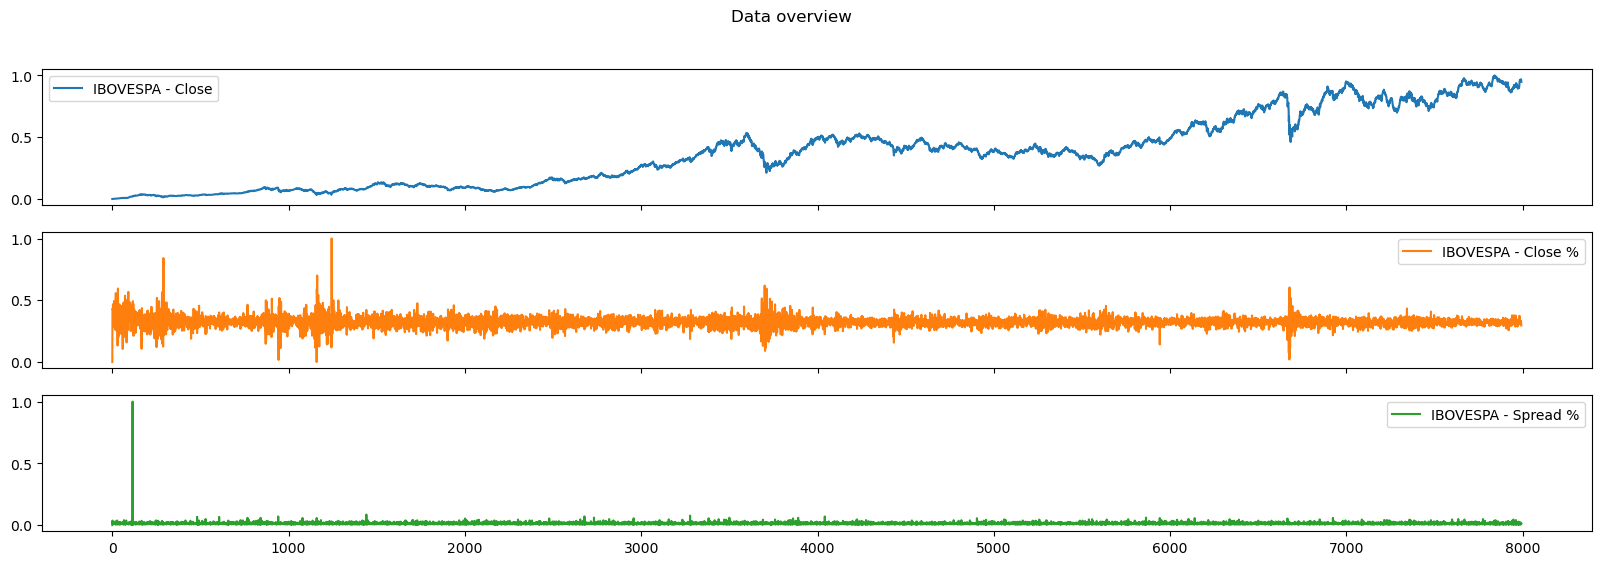

In [13]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

array([<Axes: >, <Axes: >, <Axes: >], dtype=object)

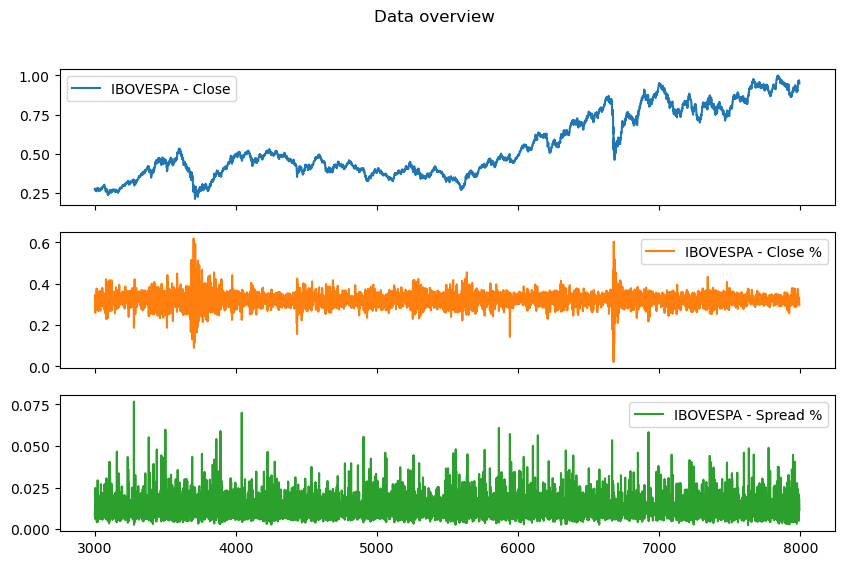

In [14]:
df_x_values[3000:].plot(subplots=True, figsize=(10, 2*len(df_x_values.columns)), title="Data overview") 

In [15]:
imported_df_cpy = imported_df.copy()
# remove the first column (index)
imported_df_cpy.reset_index(inplace=True)
# find date (index) of the 3050th row
print(imported_df_cpy.loc[3700, 'index'])
print(imported_df_cpy.loc[4860, 'index'])

2008-10-13
2013-03-27


Dividir os dados em treino e teste

In [16]:
valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
valid_indexes.head()
# find the first valid date for each column
# the index is the column name and the value is the value in "First Valid Index" column
valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
valid_indexes_dict

{'IBOVESPA - Close': '1994-01-03',
 'IBOVESPA - High': '1994-01-03',
 'IBOVESPA - Low': '1994-01-03',
 'IBOVESPA - Open': '1994-01-03',
 'Dólar - Close': '2003-12-01',
 'Dólar - High': '2003-12-01',
 'Dólar - Low': '2003-12-01',
 'Dólar - Open': '2003-12-01',
 'Dow Jones - Close': '1994-01-03',
 'Dow Jones - High': '1994-01-03',
 'Dow Jones - Low': '1994-01-03',
 'Dow Jones - Open': '1994-01-03',
 'S&P 500 - Close': '1994-01-03',
 'S&P 500 - High': '1994-01-03',
 'S&P 500 - Low': '1994-01-03',
 'S&P 500 - Open': '1994-01-03',
 'Nasdaq - Close': '1994-01-03',
 'Nasdaq - High': '1994-01-03',
 'Nasdaq - Low': '1994-01-03',
 'Nasdaq - Open': '1994-01-03',
 'Shanghai SE - Close': '1997-07-02',
 'Shanghai SE - High': '1997-07-02',
 'Shanghai SE - Low': '1997-07-02',
 'Shanghai SE - Open': '1997-07-02',
 'Nikkei - Close': '1994-01-04',
 'Nikkei - High': '1994-01-04',
 'Nikkei - Low': '1994-01-04',
 'Nikkei - Open': '1994-01-04',
 'HanSeng Index - Close': '1994-01-03',
 'HanSeng Index - High':

In [17]:
if START_ON_FIRST_VALID_DATE:
    # get valid indexes 
    valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
    valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
    valid_indexes_dict
    biggest_valid_index = min(valid_indexes_dict.values())
    for col in df_x_values.columns:
        # get the first valid index for each column
        first_valid_index = valid_indexes_dict[col]
        # check if the first valid index is greater than the biggest valid index
        if first_valid_index > biggest_valid_index:
            biggest_valid_index = first_valid_index
    # filter the dataframe to start on the first valid index, first finding the numeric index searching imported_df
    imported_df_cp = imported_df.copy()
    # reset the index
    imported_df_cp.reset_index(inplace=True)
    # find the first valid index
    first_valid_index = imported_df_cp[imported_df_cp['index'] == biggest_valid_index].index[0]
    print(f"First valid index: {first_valid_index}")

if START_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the START_DATE
    start_index = imported_df_cp[imported_df_cp['index'] == START_DATE].index[0]

if END_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the END_DATE
    end_index = imported_df_cp[imported_df_cp['index'] == END_DATE].index[0]

# crop the dataframe to start on the first valid index
if START_ON_FIRST_VALID_DATE and START_DATE is not None:
    if first_valid_index > start_index:
        # crop the dataframe to start on the first valid index
        df_x_values = df_x_values[first_valid_index:]
    else:
        # crop the dataframe to start on the START_DATE
        df_x_values = df_x_values[start_index:]
elif START_ON_FIRST_VALID_DATE:
    # crop the dataframe to start on the first valid index
    df_x_values = df_x_values[first_valid_index:]
elif START_DATE is not None:
    # crop the dataframe to start on the START_DATE
    df_x_values = df_x_values[start_index:]

# crop the dataframe to end on the END_DATE
if END_DATE is not None:
    # crop the dataframe to end on the END_DATE
    df_x_values = df_x_values[:end_index]
    # crop imported_df_cp to end on the END_DATE
    imported_df_cp = imported_df_cp[:end_index]

# calculate de size of training, validation and testing data
if TYPE_OF_UNIT == "percentual":
    train_size = int(len(df_x_values) * TRAINING_SIZE)
    validation_size = int(len(df_x_values) * VALIDATION_SIZE)
    test_size = int(len(df_x_values) * TESTING_SIZE)
elif TYPE_OF_UNIT == "days":
    train_size = TRAINING_SIZE
    validation_size = VALIDATION_SIZE
    test_size = TESTING_SIZE
elif TYPE_OF_UNIT == "weeks":
    train_size = TRAINING_SIZE * 7
    validation_size = VALIDATION_SIZE * 7
    test_size = TESTING_SIZE * 7
elif TYPE_OF_UNIT == "months":
    train_size = TRAINING_SIZE * 30
    validation_size = VALIDATION_SIZE * 30
    test_size = TESTING_SIZE * 30
elif TYPE_OF_UNIT == "customDays":
    # if iported_df_cp is not defined, define it
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # if TRAINING_SIZE is not in imported_df_cp, find the next closest date
    if TRAINING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TRAINING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Training date not found. Closest date to {TRAINING_SIZE} is {closest_date}")
        # set TRAINING_SIZE to the closest date
        TRAINING_SIZE = closest_date
    # if VALIDATION_SIZE is not in imported_df_cp, find the next closest date
    if VALIDATION_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > VALIDATION_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Validation date not found. Closest date to {VALIDATION_SIZE} is {closest_date}")
        # set VALIDATION_SIZE to the closest date
        VALIDATION_SIZE = closest_date
    # if TESTING_SIZE is not in imported_df_cp, find the next closest date
    if TESTING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TESTING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Testing date not found. Closest date to {TESTING_SIZE} is {closest_date}")
        # set TESTING_SIZE to the closest date
        TESTING_SIZE = closest_date
    
    # if VALIDATION_SIZE is not in imported_df_cp, throw error
    # get the index of TRAINING_SIZE date
    train_index = imported_df_cp[imported_df_cp['index'] == TRAINING_SIZE].index[0]
    # get the index of VALIDATION_SIZE date
    validation_index = imported_df_cp[imported_df_cp['index'] == VALIDATION_SIZE].index[0]
    # get the index of TESTING_SIZE date
    test_index = imported_df_cp[imported_df_cp['index'] == TESTING_SIZE].index[0] 
    # throw error if some of the indexes is not valid
    if train_index < 0 or validation_index < 0 or test_index < 0:
        raise ValueError("Some of the indexes are not valid.")
    # thow error if the indexes are not in the same order
    if train_index > validation_index or validation_index > test_index:
        raise ValueError("The indexes are not in the same order.")
    # calculate the size of the training, validation and testing data
    train_size = len(imported_df_cp[train_index:validation_index])
    validation_size = len(imported_df_cp[validation_index:test_index])
    test_size = len(imported_df_cp[test_index:])
else:
    raise ValueError("Invalid type_of_unit. Must be 'days', 'weeks', 'months' or 'percentual'.")

if START_ON_FIRST_VALID_DATE:
    # if train_size+validation_size+test_size is greater than the size of the dataframe, adjust train_size
    # to be the size of the dataframe minus validation_size and test_size
    if train_size + validation_size + test_size > len(df_x_values):
        # adjust train_size to be the size of the dataframe minus validation_size and test_size
        train_size = len(df_x_values) - validation_size - test_size
        print(f"Adjusted train size: {train_size}")
    # check if train_size is less than 0
    if train_size < 0:
        raise ValueError("Train size is less than 0. Please check the sizes of the data.")

# check if sum of sizes is less than the size of the dataframe
if train_size + validation_size + test_size > len(df_x_values):
    raise ValueError("Sum of train, validate and test sizes is greater than the size of the dataframe.")

# create the train, validation and test dataframes
train_df = df_x_values[-(train_size + test_size + validation_size):-(test_size + validation_size)]
val_df = df_x_values[-(test_size + validation_size):-test_size]
test_df = df_x_values[-(test_size):]

# check the size of the data
print(f"Training data size: {len(train_df)}")
print(f"Validating data size: {len(val_df)}")
print(f"Testing data size: {len(test_df)}")


First valid index: 1
Validation date not found. Closest date to 2023-10-01 is 2023-10-02
Adjusted train size: 7602
Training data size: 7602
Validating data size: 261
Testing data size: 129


array([<Axes: >, <Axes: >, <Axes: >], dtype=object)

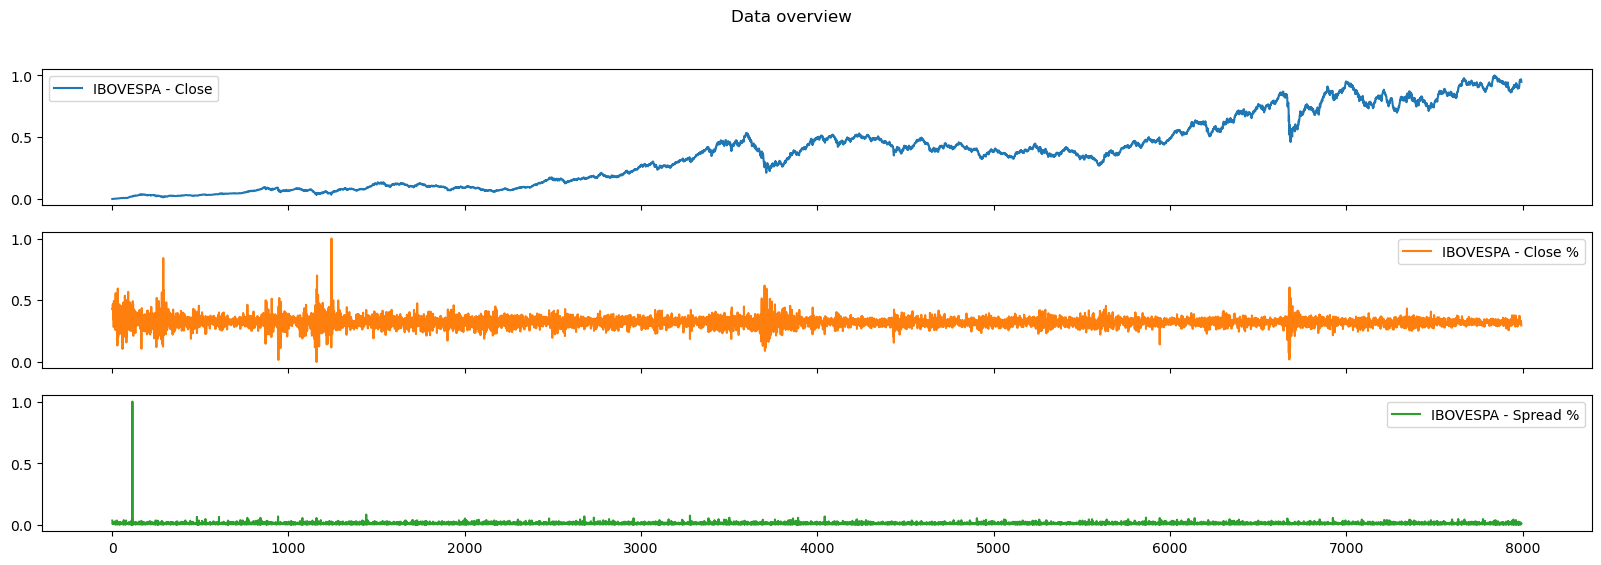

In [18]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

In [19]:
len(train_df), len(val_df), len(test_df), len(df_x_values)

(7602, 261, 129, 7992)

Criar a classe/função geradora das janelas

In [20]:
class WindowGenerator():
  def __init__(self, INPUT_WINDOW_SIZE, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.INPUT_WINDOW_SIZE = INPUT_WINDOW_SIZE
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = INPUT_WINDOW_SIZE + shift

    self.input_slice = slice(0, INPUT_WINDOW_SIZE)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])
  
  def split_window(self, features):
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.labels_slice, :]
    if self.label_columns is not None:
      labels = tf.stack(
          [labels[:, :, self.column_indices[name]] for name in self.label_columns],
          axis=-1)

    # Slicing doesn't preserve static shape information, so set the shapes
    # manually. This way the `tf.data.Datasets` are easier to inspect.
    inputs.set_shape([None, self.INPUT_WINDOW_SIZE, None])
    labels.set_shape([None, self.label_width, None])

    return inputs, labels

  def plot(self, model=None, plot_col='IBOVESPA - Close', max_subplots=3):
    inputs, labels = self.example
    plt.figure(figsize=(12, 8))
    plot_col_index = self.column_indices[plot_col]
    max_n = min(max_subplots, len(inputs))
    for i in range(max_n):
      n = i#random.randint(0, len(inputs)-1)
      plt.subplot(max_n, 1, i+1)
      plt.ylabel(f'{plot_col} ({n}) [normed]')
      plt.plot(self.input_indices, inputs[n, :, plot_col_index],
              label='Inputs', marker='.', zorder=-10)

      if self.label_columns:
        label_col_index = self.label_columns_indices.get(plot_col, None)
      else:
        label_col_index = plot_col_index

      if label_col_index is None:
        continue

      plt.scatter(self.label_indices, labels[n, :, label_col_index],
                  edgecolors='k', label='Labels', c='#2ca02c', s=64)
      if model is not None:
        predictions = model(inputs)
        plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                    marker='X', edgecolors='k', label='Predictions',
                    c='#ff7f0e', s=64)

      if n == 0:
        plt.legend()

    plt.xlabel('Time [day]')

  def make_dataset(self, data):
    data = np.array(data, dtype=np.float32)
    ds = tf.keras.utils.timeseries_dataset_from_array(
        data=data,
        targets=None,
        sequence_length=self.total_window_size,
        sequence_stride=1,
        shuffle=False,
        # shuffle=True,
        seed=RANDOM_SEED,
        batch_size=BATCH_SIZE,)

    ds = ds.map(self.split_window)

    return ds

  @property
  def train(self):
    return self.make_dataset(self.train_df)

  @property
  def val(self):
    return self.make_dataset(self.val_df)

  @property
  def test(self):
    return self.make_dataset(self.test_df)
  
  @property
  def example(self):
    """Get and cache an example batch of `inputs, labels` for plotting."""
    result = getattr(self, '_example', None)
    if result is None:
      # No example batch was found, so get one from the `.train` dataset
      result = next(iter(self.test))
      # And cache it for next time
      self._example = result
    return result

Criar função de erro customizado, aumentando o peso de previsões na direção incorreta

In [21]:
import keras.backend as K
import tensorflow as tf

def custom_loss(y_true, y_pred):
    threshold = 0.5955062488  # Define the threshold

    # Calculate the error between the true and predicted values
    error = y_true - y_pred
    
    # Determine the direction (increase or decrease) for both true and predicted values
    true_direction = tf.cast(tf.greater(y_true, threshold), tf.float32)  # 1 if true value is above threshold (increase), 0 if below (decrease)
    pred_direction = tf.cast(tf.greater(y_pred, threshold), tf.float32)  # 1 if predicted value is above threshold (increase), 0 if below (decrease)
    
    # Check for mismatches: wrong direction between true and predicted
    direction_mismatch = tf.abs(true_direction - pred_direction)  # 1 if directions mismatch, 0 if they match
    
    # Calculate the weighted error: apply a higher penalty when directions mismatch
    loss = tf.square(error) * (1 + MISMATCH_PENALITY * direction_mismatch)  # 5x penalty for mismatch, adjust factor as needed
    
    # Return the mean of the loss over all samples
    return tf.reduce_mean(loss)


Total window size: 5
Input indices: [0 1 2 3]
Label indices: [4]
Label column name(s): ['IBOVESPA - Close']

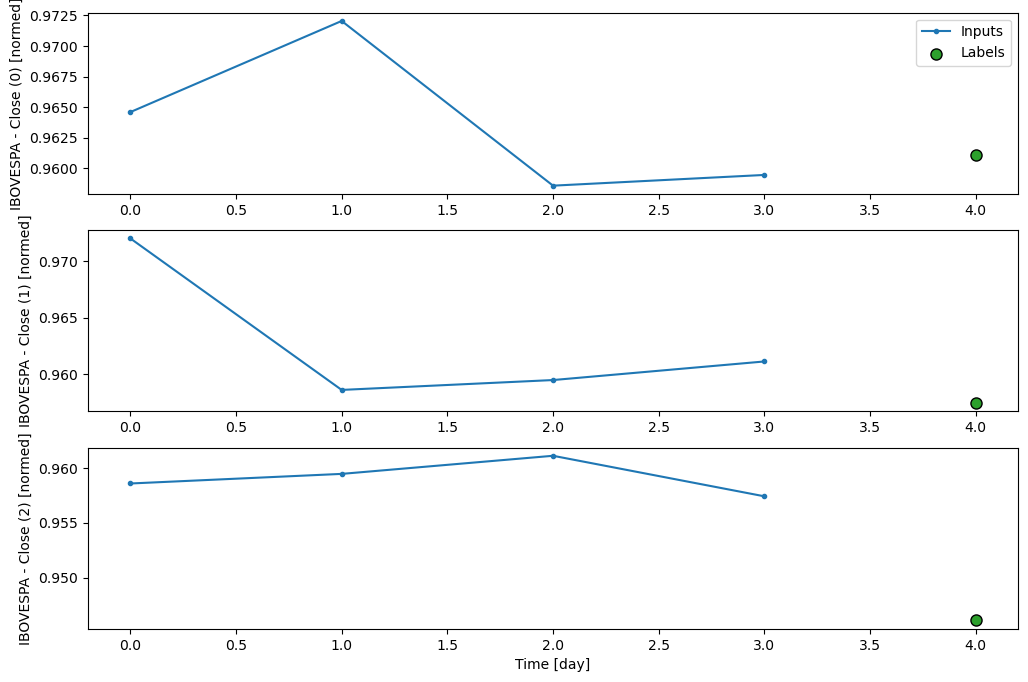

In [22]:
multi_window = WindowGenerator(INPUT_WINDOW_SIZE=INPUT_WINDOW_SIZE,
                               label_width=OUTPUT_WINDOW_SIZE,
                               shift=OUTPUT_WINDOW_SIZE, label_columns=[COLUMN_TO_PREDICT])

multi_window.plot(plot_col=COLUMN_TO_PREDICT)
multi_window

Criação da função de treino da rede

In [23]:
# Define the Required Callback Function
class printlearningrate(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        optimizer = self.model.optimizer
        lr = tf.keras.backend.eval(optimizer.learning_rate)
        # lr = tf.keras.backend.eval(optimizer.lr)
        Epoch_count = epoch + 1
        print(f"\nEpoch: {Epoch_count} - LR: {lr}")
        return lr

In [24]:
def compile_and_fit(model, window, PATIENCE=2, MAX_EPOCHS=150, LEARNING_RATE=0.00001):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=PATIENCE,
                                                    mode='min')
  
  # optimizer using learning rate schedule 
  lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=LEARNING_RATE,
    decay_steps=DECAY_STEPS,
    decay_rate=LEARNING_DECAY)

  # config optimizer
  optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

  # opitimizer AdamW
  # optimizer = tf.keras.optimizers.AdamW(learning_rate=LEARNING_RATE) # weight_decay=0.004
  # optimizer =  tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE, weight_decay=0.004)

  # optimizer =  tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE, weight_decay=1e-6)
  
  def scheduler(epoch, lr):
    decay = LEARNING_DECAY
    decayEveryEpochs = DECAY_EVERY_EPOCHS
    iterations = epoch // decayEveryEpochs
    optimizer = model.optimizer
    # return tf.keras.backend.eval(optimizer.learning_rate)
    # decay by 0.1 every 5 epochs; use `% 1` to decay after each epoch
    if (epoch % decayEveryEpochs == 0) and (epoch != 0):
        lr = lr * (1 - decay)
        lr = lr * (1. / (1. + decay * iterations))
    print(f"Epoch: {epoch} - Learning rate: {optimizer.learning_rate} - LR: {lr}")
    return lr
    return tf.keras.backend.eval(optimizer.learning_rate)
  
  printlr = printlearningrate() 
  updatelr = tf.keras.callbacks.LearningRateScheduler(scheduler)
  
  # config loss function
  if LOSS_FUNCTION == 'MAE':
    loss_function = tf.keras.losses.MeanAbsoluteError()
  elif LOSS_FUNCTION == 'MSE':
    loss_function = tf.keras.losses.MeanSquaredError()
  # elif LOSS_FUNCTION == 'CUSTOM':
  #   loss_function = custom_loss

  # model.compile(loss=tf.keras.losses.MeanAbsoluteError(),
  # model.compile(loss=tf.keras.losses.MeanSquaredError(),
  # model.compile(loss=custom_loss,
  model.compile(
                loss=loss_function,
                optimizer=optimizer,
                metrics=[
                  tf.keras.metrics.MeanAbsoluteError(),
                  tf.keras.metrics.MeanSquaredError(),
                  tf.keras.metrics.MeanAbsolutePercentageError(),
                  tf.keras.metrics.RootMeanSquaredError(),
                  # tf.keras.metrics.R2Score()
                  ]
              )

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[printlr,early_stopping]) # updatelr])
  return history

Definir modelo da rede e realizar o treinamento

In [25]:
multi_window.train

<_MapDataset element_spec=(TensorSpec(shape=(None, 4, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1, 1), dtype=tf.float32, name=None))>

# Definir modelos

In [26]:
num_features = df_x_values.shape[1]

num_features

3

In [27]:
def get_model():
    if NUM_FEATURES is not None:
        num_features = NUM_FEATURES
    else:
        num_features = df_x_values.shape[1]
    
    if MODEL_TO_USE == 1:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 2:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=True), 
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 3:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(100, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model

Calculate metrics

In [28]:
# create dataframe for "hard" predictions
def create_df_repeat_prediction(data):        
    # predictions = data[COLUMN_TO_PREDICT].values[:-1]
    # labels = data[COLUMN_TO_PREDICT].values[1:]
    predictions, labels = None, None
    for part in iter(data):
        # print(part)
        if predictions is None:
            labels = part[1]
        else:
            labels = np.concatenate((labels, part[1]), axis=0)
    labels = labels[:, :, 0]
    # convert labels to 1D array
    # print(labels.shape)
    # print(labels)
    predictions = labels
    for i, label in enumerate(labels[:-1]):
        # if i == 3:
        #     break
        for j in range(len(label)):
            # replace values of predictions[i] with the first value of label
            predictions = tf.tensor_scatter_nd_update(
                predictions, 
                [[i, j]], 
                [label[0]]
            )
        # print(f"Label {i}: {label}")
        # print(f"Prediction {i}: {predictions[i]}")
    predictions = predictions[:-1]    
    labels = labels[1:]
    return {"predictions": predictions, "labels": labels}
    predictions_df = pd.DataFrame({"predictions": predictions, "labels": labels})
    predictions_df = predictions_df.dropna()
    return predictions_df

In [29]:
def make_repeat_predictions_metrics(data):
    predictions = create_df_repeat_prediction(data)
    mae = tf.keras.metrics.MeanAbsoluteError()
    mae.update_state(predictions["labels"], predictions["predictions"])
    mse = tf.keras.metrics.MeanSquaredError()
    mse.update_state(predictions["labels"], predictions["predictions"])
    mape = tf.keras.metrics.MeanAbsolutePercentageError()
    mape.update_state(predictions["labels"], predictions["predictions"])
    rmse = tf.keras.metrics.RootMeanSquaredError()
    rmse.update_state(predictions["labels"], predictions["predictions"])
    print(f"MAE: {mae.result()} - MSE: {mse.result()} - MAPE: {mape.result()} - RMSE: {rmse.result()}")
    return {
            "Loss": None,
            "MAE": float(mae.result()),
            "MSE": float(mse.result()),
            "MAPE": float(mape.result()),
            "RMSE": float(rmse.result()),
        }


In [30]:
def make_model_predictions_metrics(model, data):
    loss, mae, mse, mape, rmse = model.evaluate(data)
    print(f"Loss: {loss} - MAE: {mae} - MSE: {mse} - MAPE: {mape} - RMSE: {rmse}")
    return {
            "Loss": loss,
            "MAE": mae,
            "MSE": mse,
            "MAPE": mape,
            "RMSE": rmse,
        }

Treinar modelos

In [31]:
# record start time
training_start = time.time()

model = get_model()

history = compile_and_fit(model, multi_window, PATIENCE, MAX_EPOCHS, LEARNING_RATE)

# record end time
training_end = time.time()

Epoch 1/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9:07 2s/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 100.0000 - mean_squared_error: 1.0882e-05 - root_mean_squared_error: 0.0033

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 115.4688 - mean_squared_error: 2.2210e-04 - root_mean_squared_error: 0.0140 

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 96.3497 - mean_squared_error: 2.4602e-04 - root_mean_squared_error: 0.0152 

 25/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 80.9429 - mean_squared_error: 2.2309e-04 - root_mean_squared_error: 0.0146

 34/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 70.5233 - mean_squared_error: 2.1247e-04 - root_mean_squared_error: 0.0143

 43/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 63.6792 - mean_squared_error: 2.1340e-04 - root_mean_squared_error: 0.0144

 53/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 58.1993 - mean_squared_error: 2.2171e-04 - root_mean_squared_error: 0.0147

 62/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 54.2505 - mean_squared_error: 2.2780e-04 - root_mean_squared_error: 0.0149

 71/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 51.0033 - mean_squared_error: 2.3152e-04 - root_mean_squared_error: 0.0151

 80/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 48.4273 - mean_squared_error: 2.3928e-04 - root_mean_squared_error: 0.0153

 89/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 46.2393 - mean_squared_error: 2.4934e-04 - root_mean_squared_error: 0.0156

 98/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 44.3437 - mean_squared_error: 2.6477e-04 - root_mean_squared_error: 0.0161

107/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 42.6596 - mean_squared_error: 2.8434e-04 - root_mean_squared_error: 0.0166

116/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 41.1435 - mean_squared_error: 3.1415e-04 - root_mean_squared_error: 0.0173

125/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 39.8962 - mean_squared_error: 4.1778e-04 - root_mean_squared_error: 0.0191

134/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 38.8462 - mean_squared_error: 6.0616e-04 - root_mean_squared_error: 0.0216

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 37.8698 - mean_squared_error: 7.7345e-04 - root_mean_squared_error: 0.0238

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 36.9501 - mean_squared_error: 9.1431e-04 - root_mean_squared_error: 0.0257

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 36.0775 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0274    

170/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 35.2557 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0288

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 34.4837 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0300

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 33.7995 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0313

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 33.1876 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0328

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 32.6135 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0342

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 32.0775 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0357

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 31.5250 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0373

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 31.0468 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0387


Epoch: 1 - LR: 0.009752360172569752
238/238 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 30.7881 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0394 - val_loss: 0.0725 - val_mean_absolute_error: 0.0725 - val_mean_absolute_percentage_error: 7.7148 - val_mean_squared_error: 0.0062 - val_root_mean_squared_error: 0.0789


Epoch 2/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.6329 - mean_absolute_error: 0.6329 - mean_absolute_percentage_error: 27333.0352 - mean_squared_error: 0.4005 - root_mean_squared_error: 0.6329

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.5956 - mean_absolute_error: 0.5956 - mean_absolute_percentage_error: 11426.0996 - mean_squared_error: 0.3595 - root_mean_squared_error: 0.5986 

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.4791 - mean_absolute_error: 0.4791 - mean_absolute_percentage_error: 7589.4492 - mean_squared_error: 0.2746 - root_mean_squared_error: 0.5161 

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.4074 - mean_absolute_error: 0.4074 - mean_absolute_percentage_error: 5959.6255 - mean_squared_error: 0.2257 - root_mean_squared_error: 0.4621

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3579 - mean_absolute_error: 0.3579 - mean_absolute_percentage_error: 4958.8169 - mean_squared_error: 0.1929 - root_mean_squared_error: 0.4224

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3210 - mean_absolute_error: 0.3210 - mean_absolute_percentage_error: 4273.8271 - mean_squared_error: 0.1692 - root_mean_squared_error: 0.3918

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2890 - mean_absolute_error: 0.2890 - mean_absolute_percentage_error: 3723.0527 - mean_squared_error: 0.1494 - root_mean_squared_error: 0.3648

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2659 - mean_absolute_error: 0.2659 - mean_absolute_percentage_error: 3346.5046 - mean_squared_error: 0.1356 - root_mean_squared_error: 0.3449

 76/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2448 - mean_absolute_error: 0.2448 - mean_absolute_percentage_error: 3016.2671 - mean_squared_error: 0.1232 - root_mean_squared_error: 0.3264

 85/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2290 - mean_absolute_error: 0.2290 - mean_absolute_percentage_error: 2775.2029 - mean_squared_error: 0.1141 - root_mean_squared_error: 0.3121

 95/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2140 - mean_absolute_error: 0.2140 - mean_absolute_percentage_error: 2552.8569 - mean_squared_error: 0.1055 - root_mean_squared_error: 0.2984

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2025 - mean_absolute_error: 0.2025 - mean_absolute_percentage_error: 2383.8972 - mean_squared_error: 0.0990 - root_mean_squared_error: 0.2875

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1925 - mean_absolute_error: 0.1925 - mean_absolute_percentage_error: 2237.9626 - mean_squared_error: 0.0933 - root_mean_squared_error: 0.2778

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1840 - mean_absolute_error: 0.1840 - mean_absolute_percentage_error: 2110.5908 - mean_squared_error: 0.0883 - root_mean_squared_error: 0.2693

132/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1758 - mean_absolute_error: 0.1758 - mean_absolute_percentage_error: 1986.6676 - mean_squared_error: 0.0835 - root_mean_squared_error: 0.2608

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1686 - mean_absolute_error: 0.1686 - mean_absolute_percentage_error: 1877.8052 - mean_squared_error: 0.0793 - root_mean_squared_error: 0.2531

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1622 - mean_absolute_error: 0.1622 - mean_absolute_percentage_error: 1781.3373 - mean_squared_error: 0.0755 - root_mean_squared_error: 0.2461

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1564 - mean_absolute_error: 0.1564 - mean_absolute_percentage_error: 1695.1848 - mean_squared_error: 0.0721 - root_mean_squared_error: 0.2397

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1516 - mean_absolute_error: 0.1516 - mean_absolute_percentage_error: 1625.1281 - mean_squared_error: 0.0693 - root_mean_squared_error: 0.2344

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1477 - mean_absolute_error: 0.1477 - mean_absolute_percentage_error: 1568.0000 - mean_squared_error: 0.0670 - root_mean_squared_error: 0.2300

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1437 - mean_absolute_error: 0.1437 - mean_absolute_percentage_error: 1508.7999 - mean_squared_error: 0.0646 - root_mean_squared_error: 0.2253

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1400 - mean_absolute_error: 0.1400 - mean_absolute_percentage_error: 1454.3245 - mean_squared_error: 0.0625 - root_mean_squared_error: 0.2210

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1362 - mean_absolute_error: 0.1362 - mean_absolute_percentage_error: 1398.6503 - mean_squared_error: 0.0602 - root_mean_squared_error: 0.2165

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1327 - mean_absolute_error: 0.1327 - mean_absolute_percentage_error: 1347.4751 - mean_squared_error: 0.0582 - root_mean_squared_error: 0.2123

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1299 - mean_absolute_error: 0.1299 - mean_absolute_percentage_error: 1304.8146 - mean_squared_error: 0.0565 - root_mean_squared_error: 0.2088

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1271 - mean_absolute_error: 0.1271 - mean_absolute_percentage_error: 1260.7603 - mean_squared_error: 0.0547 - root_mean_squared_error: 0.2052


Epoch: 2 - LR: 0.009510851465165615
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1262 - mean_absolute_error: 0.1262 - mean_absolute_percentage_error: 1248.1825 - mean_squared_error: 0.0542 - root_mean_squared_error: 0.2041 - val_loss: 0.0227 - val_mean_absolute_error: 0.0227 - val_mean_absolute_percentage_error: 2.4469 - val_mean_squared_error: 7.8055e-04 - val_root_mean_squared_error: 0.0279


Epoch 3/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.4355 - mean_absolute_error: 0.4355 - mean_absolute_percentage_error: 18789.7930 - mean_squared_error: 0.1897 - root_mean_squared_error: 0.4356

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.4218 - mean_absolute_error: 0.4218 - mean_absolute_percentage_error: 7905.7798 - mean_squared_error: 0.1784 - root_mean_squared_error: 0.4222  

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3762 - mean_absolute_error: 0.3762 - mean_absolute_percentage_error: 5403.5376 - mean_squared_error: 0.1502 - root_mean_squared_error: 0.3852

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3287 - mean_absolute_error: 0.3287 - mean_absolute_percentage_error: 4291.8271 - mean_squared_error: 0.1273 - root_mean_squared_error: 0.3513

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2906 - mean_absolute_error: 0.2906 - mean_absolute_percentage_error: 3592.6316 - mean_squared_error: 0.1104 - root_mean_squared_error: 0.3241

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2580 - mean_absolute_error: 0.2580 - mean_absolute_percentage_error: 3063.0342 - mean_squared_error: 0.0965 - root_mean_squared_error: 0.3002

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2348 - mean_absolute_error: 0.2348 - mean_absolute_percentage_error: 2715.4912 - mean_squared_error: 0.0869 - root_mean_squared_error: 0.2827

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2159 - mean_absolute_error: 0.2159 - mean_absolute_percentage_error: 2445.7598 - mean_squared_error: 0.0793 - root_mean_squared_error: 0.2680

 75/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2003 - mean_absolute_error: 0.2003 - mean_absolute_percentage_error: 2229.8157 - mean_squared_error: 0.0730 - root_mean_squared_error: 0.2555

 85/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1857 - mean_absolute_error: 0.1857 - mean_absolute_percentage_error: 2034.6472 - mean_squared_error: 0.0672 - root_mean_squared_error: 0.2435

 94/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1746 - mean_absolute_error: 0.1746 - mean_absolute_percentage_error: 1888.7480 - mean_squared_error: 0.0628 - root_mean_squared_error: 0.2341

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1670 - mean_absolute_error: 0.1670 - mean_absolute_percentage_error: 1790.3774 - mean_squared_error: 0.0598 - root_mean_squared_error: 0.2276

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1583 - mean_absolute_error: 0.1583 - mean_absolute_percentage_error: 1679.4343 - mean_squared_error: 0.0563 - root_mean_squared_error: 0.2199

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1507 - mean_absolute_error: 0.1507 - mean_absolute_percentage_error: 1582.7228 - mean_squared_error: 0.0533 - root_mean_squared_error: 0.2130

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1433 - mean_absolute_error: 0.1433 - mean_absolute_percentage_error: 1488.7725 - mean_squared_error: 0.0504 - root_mean_squared_error: 0.2062

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1375 - mean_absolute_error: 0.1375 - mean_absolute_percentage_error: 1414.1731 - mean_squared_error: 0.0481 - root_mean_squared_error: 0.2005

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1316 - mean_absolute_error: 0.1316 - mean_absolute_percentage_error: 1340.3969 - mean_squared_error: 0.0457 - root_mean_squared_error: 0.1949

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1269 - mean_absolute_error: 0.1269 - mean_absolute_percentage_error: 1280.8943 - mean_squared_error: 0.0438 - root_mean_squared_error: 0.1901

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1221 - mean_absolute_error: 0.1221 - mean_absolute_percentage_error: 1221.2535 - mean_squared_error: 0.0419 - root_mean_squared_error: 0.1853

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1181 - mean_absolute_error: 0.1181 - mean_absolute_percentage_error: 1172.5746 - mean_squared_error: 0.0404 - root_mean_squared_error: 0.1813

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1141 - mean_absolute_error: 0.1141 - mean_absolute_percentage_error: 1123.2687 - mean_squared_error: 0.0388 - root_mean_squared_error: 0.1771

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1107 - mean_absolute_error: 0.1107 - mean_absolute_percentage_error: 1082.6389 - mean_squared_error: 0.0375 - root_mean_squared_error: 0.1736

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1077 - mean_absolute_error: 0.1077 - mean_absolute_percentage_error: 1045.1185 - mean_squared_error: 0.0362 - root_mean_squared_error: 0.1703

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1048 - mean_absolute_error: 0.1048 - mean_absolute_percentage_error: 1010.3525 - mean_squared_error: 0.0351 - root_mean_squared_error: 0.1672

222/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1022 - mean_absolute_error: 0.1022 - mean_absolute_percentage_error: 978.0413 - mean_squared_error: 0.0340 - root_mean_squared_error: 0.1643 

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0998 - mean_absolute_error: 0.0998 - mean_absolute_percentage_error: 947.9282 - mean_squared_error: 0.0331 - root_mean_squared_error: 0.1616


Epoch: 3 - LR: 0.009275324642658234
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0978 - mean_absolute_error: 0.0978 - mean_absolute_percentage_error: 922.8291 - mean_squared_error: 0.0322 - root_mean_squared_error: 0.1593 - val_loss: 0.0477 - val_mean_absolute_error: 0.0477 - val_mean_absolute_percentage_error: 5.0917 - val_mean_squared_error: 0.0026 - val_root_mean_squared_error: 0.0511


Epoch 4/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - loss: 0.1910 - mean_absolute_error: 0.1910 - mean_absolute_percentage_error: 8224.2871 - mean_squared_error: 0.0365 - root_mean_squared_error: 0.1910

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1652 - mean_absolute_error: 0.1652 - mean_absolute_percentage_error: 3369.9419 - mean_squared_error: 0.0286 - root_mean_squared_error: 0.1682 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1374 - mean_absolute_error: 0.1374 - mean_absolute_percentage_error: 2307.8057 - mean_squared_error: 0.0220 - root_mean_squared_error: 0.1457

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1183 - mean_absolute_error: 0.1183 - mean_absolute_percentage_error: 1799.6764 - mean_squared_error: 0.0180 - root_mean_squared_error: 0.1303

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1043 - mean_absolute_error: 0.1043 - mean_absolute_percentage_error: 1491.3186 - mean_squared_error: 0.0153 - root_mean_squared_error: 0.1190

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0935 - mean_absolute_error: 0.0935 - mean_absolute_percentage_error: 1281.5219 - mean_squared_error: 0.0134 - root_mean_squared_error: 0.1102

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0850 - mean_absolute_error: 0.0850 - mean_absolute_percentage_error: 1128.4407 - mean_squared_error: 0.0120 - root_mean_squared_error: 0.1032

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0775 - mean_absolute_error: 0.0775 - mean_absolute_percentage_error: 999.9288 - mean_squared_error: 0.0107 - root_mean_squared_error: 0.0969 

 74/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0720 - mean_absolute_error: 0.0720 - mean_absolute_percentage_error: 909.2308 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0921

 84/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0670 - mean_absolute_error: 0.0670 - mean_absolute_percentage_error: 827.7151 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0876

 93/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0631 - mean_absolute_error: 0.0631 - mean_absolute_percentage_error: 767.0564 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0841

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0594 - mean_absolute_error: 0.0594 - mean_absolute_percentage_error: 710.2379 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0807

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0565 - mean_absolute_error: 0.0565 - mean_absolute_percentage_error: 666.5066 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0780

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0538 - mean_absolute_error: 0.0538 - mean_absolute_percentage_error: 624.4089 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0753

131/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0516 - mean_absolute_error: 0.0516 - mean_absolute_percentage_error: 591.2562 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0731

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0496 - mean_absolute_error: 0.0496 - mean_absolute_percentage_error: 558.6985 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0710

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 532.6016 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0692

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 506.5827 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0674

170/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 483.2169 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0657

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 464.1274 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0643

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 444.7744 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0629

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 427.1177 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0615

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 412.4955 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0604

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 398.9385 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0594

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 389.0572 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0587

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 377.1222 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0579


Epoch: 4 - LR: 0.009045630693435669
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 369.6068 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0574 - val_loss: 0.0342 - val_mean_absolute_error: 0.0342 - val_mean_absolute_percentage_error: 3.6413 - val_mean_squared_error: 0.0014 - val_root_mean_squared_error: 0.0373


Epoch 5/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0981 - mean_absolute_error: 0.0981 - mean_absolute_percentage_error: 4228.7134 - mean_squared_error: 0.0096 - root_mean_squared_error: 0.0982

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0749 - mean_absolute_error: 0.0749 - mean_absolute_percentage_error: 1686.0160 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0787 

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0608 - mean_absolute_error: 0.0608 - mean_absolute_percentage_error: 1114.2461 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0666

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0523 - mean_absolute_error: 0.0523 - mean_absolute_percentage_error: 874.5035 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0594 

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 727.4056 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0543

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 617.7418 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0499

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 546.3296 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0469

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0351 - mean_absolute_error: 0.0351 - mean_absolute_percentage_error: 491.1795 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0443

 75/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0328 - mean_absolute_error: 0.0328 - mean_absolute_percentage_error: 447.2435 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0422

 84/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0309 - mean_absolute_error: 0.0309 - mean_absolute_percentage_error: 411.2858 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0404

 93/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0292 - mean_absolute_error: 0.0292 - mean_absolute_percentage_error: 381.2172 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0388

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0277 - mean_absolute_error: 0.0277 - mean_absolute_percentage_error: 353.0634 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0372

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 331.3973 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0360

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 312.4947 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0350

131/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 294.1272 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0340

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 278.0093 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0331

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 265.0876 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0324

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 252.2022 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0317

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 241.7333 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0311

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 232.1834 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0305

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 223.4337 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0300

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 214.5297 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0294

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 207.1635 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0290

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 200.3384 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0286

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 193.9961 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0284

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 187.4547 - mean_squared_error: 9.8539e-04 - root_mean_squared_error: 0.0281


Epoch: 5 - LR: 0.008821624331176281
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 184.3657 - mean_squared_error: 9.7642e-04 - root_mean_squared_error: 0.0281 - val_loss: 0.0386 - val_mean_absolute_error: 0.0386 - val_mean_absolute_percentage_error: 4.1087 - val_mean_squared_error: 0.0018 - val_root_mean_squared_error: 0.0421


Epoch 6/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.1049 - mean_absolute_error: 0.1049 - mean_absolute_percentage_error: 4522.5781 - mean_squared_error: 0.0110 - root_mean_squared_error: 0.1050

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0822 - mean_absolute_error: 0.0822 - mean_absolute_percentage_error: 1812.4896 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0859 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0686 - mean_absolute_error: 0.0686 - mean_absolute_percentage_error: 1239.1195 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0742

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0598 - mean_absolute_error: 0.0598 - mean_absolute_percentage_error: 966.7376 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0666 

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0533 - mean_absolute_error: 0.0533 - mean_absolute_percentage_error: 801.7693 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0610

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 689.6840 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0566

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 607.8630 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0532

 64/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 545.1461 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0503

 74/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 490.4750 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0476

 81/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0365 - mean_absolute_error: 0.0365 - mean_absolute_percentage_error: 458.9529 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0460

 90/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0345 - mean_absolute_error: 0.0345 - mean_absolute_percentage_error: 424.4915 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0441

 99/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0327 - mean_absolute_error: 0.0327 - mean_absolute_percentage_error: 395.3313 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0425

108/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0312 - mean_absolute_error: 0.0312 - mean_absolute_percentage_error: 370.2973 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0411

117/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0299 - mean_absolute_error: 0.0299 - mean_absolute_percentage_error: 348.5440 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0398

126/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0287 - mean_absolute_error: 0.0287 - mean_absolute_percentage_error: 329.4509 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0386

135/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0277 - mean_absolute_error: 0.0277 - mean_absolute_percentage_error: 312.5386 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0376

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 295.8633 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0365

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 282.4534 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0357

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 269.0454 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0348

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 258.1279 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0341

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 248.1472 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0334

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 238.9837 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0327

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 229.6413 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0321

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 221.8992 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0316

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 213.9503 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0311

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 207.3224 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0309


Epoch: 6 - LR: 0.008603165857493877
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 200.4783 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0307 - val_loss: 0.0174 - val_mean_absolute_error: 0.0174 - val_mean_absolute_percentage_error: 1.9407 - val_mean_squared_error: 4.7239e-04 - val_root_mean_squared_error: 0.0217


Epoch 7/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.1270 - mean_absolute_error: 0.1270 - mean_absolute_percentage_error: 5478.3877 - mean_squared_error: 0.0162 - root_mean_squared_error: 0.1271

 11/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1055 - mean_absolute_error: 0.1055 - mean_absolute_percentage_error: 2120.0642 - mean_squared_error: 0.0120 - root_mean_squared_error: 0.1088 

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0864 - mean_absolute_error: 0.0864 - mean_absolute_percentage_error: 1475.5880 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0934

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0743 - mean_absolute_error: 0.0743 - mean_absolute_percentage_error: 1158.1553 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0834

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0657 - mean_absolute_error: 0.0657 - mean_absolute_percentage_error: 963.3943 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0761 

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0586 - mean_absolute_error: 0.0586 - mean_absolute_percentage_error: 817.9600 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0700

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0537 - mean_absolute_error: 0.0537 - mean_absolute_percentage_error: 723.3087 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0657

 67/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0492 - mean_absolute_error: 0.0492 - mean_absolute_percentage_error: 643.0856 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0617

 76/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 586.0761 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0587

 85/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 539.2574 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0562

 95/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 496.0765 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0537

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 466.6821 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0519

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0367 - mean_absolute_error: 0.0367 - mean_absolute_percentage_error: 437.9150 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0502

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0352 - mean_absolute_error: 0.0352 - mean_absolute_percentage_error: 412.8320 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0487

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0339 - mean_absolute_error: 0.0339 - mean_absolute_percentage_error: 390.7573 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0474

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0328 - mean_absolute_error: 0.0328 - mean_absolute_percentage_error: 371.1523 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0462

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0318 - mean_absolute_error: 0.0318 - mean_absolute_percentage_error: 351.7701 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0450

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0309 - mean_absolute_error: 0.0309 - mean_absolute_percentage_error: 336.1399 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0440

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0300 - mean_absolute_error: 0.0300 - mean_absolute_percentage_error: 320.4740 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0430

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0292 - mean_absolute_error: 0.0292 - mean_absolute_percentage_error: 307.6880 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0422

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0285 - mean_absolute_error: 0.0285 - mean_absolute_percentage_error: 295.9775 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0414

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0278 - mean_absolute_error: 0.0278 - mean_absolute_percentage_error: 285.2072 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0406

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0273 - mean_absolute_error: 0.0273 - mean_absolute_percentage_error: 277.4081 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0401

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0268 - mean_absolute_error: 0.0268 - mean_absolute_percentage_error: 269.0509 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0395

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0263 - mean_absolute_error: 0.0263 - mean_absolute_percentage_error: 259.3586 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0388

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 251.2745 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0384


Epoch: 7 - LR: 0.00839011650532484
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 242.9228 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0379 - val_loss: 0.0369 - val_mean_absolute_error: 0.0369 - val_mean_absolute_percentage_error: 3.9600 - val_mean_squared_error: 0.0015 - val_root_mean_squared_error: 0.0385


Epoch 8/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 2015.3237 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0470

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0321 - mean_absolute_error: 0.0321 - mean_absolute_percentage_error: 781.7013 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0349  

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 526.0516 - mean_squared_error: 9.0550e-04 - root_mean_squared_error: 0.0289

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 406.3735 - mean_squared_error: 7.1809e-04 - root_mean_squared_error: 0.0254

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 335.2580 - mean_squared_error: 6.0533e-04 - root_mean_squared_error: 0.0231

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 283.1342 - mean_squared_error: 5.2045e-04 - root_mean_squared_error: 0.0212

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 249.6083 - mean_squared_error: 4.6480e-04 - root_mean_squared_error: 0.0200

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 221.4373 - mean_squared_error: 4.1736e-04 - root_mean_squared_error: 0.0188

 75/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 201.6040 - mean_squared_error: 3.8380e-04 - root_mean_squared_error: 0.0179

 85/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 183.7659 - mean_squared_error: 3.5331e-04 - root_mean_squared_error: 0.0171

 94/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 170.4801 - mean_squared_error: 3.3055e-04 - root_mean_squared_error: 0.0165

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 158.0282 - mean_squared_error: 3.0944e-04 - root_mean_squared_error: 0.0160

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 148.4346 - mean_squared_error: 2.9344e-04 - root_mean_squared_error: 0.0155

123/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 139.1961 - mean_squared_error: 2.7890e-04 - root_mean_squared_error: 0.0151

132/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 131.9213 - mean_squared_error: 2.6874e-04 - root_mean_squared_error: 0.0149

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 125.4481 - mean_squared_error: 2.6002e-04 - root_mean_squared_error: 0.0147

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 119.6459 - mean_squared_error: 2.5225e-04 - root_mean_squared_error: 0.0145

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 114.4100 - mean_squared_error: 2.4506e-04 - root_mean_squared_error: 0.0143

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 109.1582 - mean_squared_error: 2.3770e-04 - root_mean_squared_error: 0.0141

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 104.8699 - mean_squared_error: 2.3161e-04 - root_mean_squared_error: 0.0139

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 100.5248 - mean_squared_error: 2.2544e-04 - root_mean_squared_error: 0.0137

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 96.9426 - mean_squared_error: 2.2037e-04 - root_mean_squared_error: 0.0136 

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 93.2814 - mean_squared_error: 2.1538e-04 - root_mean_squared_error: 0.0135

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 90.2429 - mean_squared_error: 2.1269e-04 - root_mean_squared_error: 0.0134

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 87.4214 - mean_squared_error: 2.1243e-04 - root_mean_squared_error: 0.0135

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 84.7932 - mean_squared_error: 2.1396e-04 - root_mean_squared_error: 0.0136


Epoch: 8 - LR: 0.008182344026863575
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 83.4091 - mean_squared_error: 2.1496e-04 - root_mean_squared_error: 0.0136 - val_loss: 0.0330 - val_mean_absolute_error: 0.0330 - val_mean_absolute_percentage_error: 3.5338 - val_mean_squared_error: 0.0012 - val_root_mean_squared_error: 0.0346


Epoch 9/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.0667 - mean_absolute_error: 0.0667 - mean_absolute_percentage_error: 2869.9292 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0668

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0490 - mean_absolute_error: 0.0490 - mean_absolute_percentage_error: 1135.3564 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0523 

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 745.5532 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0435 

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0327 - mean_absolute_error: 0.0327 - mean_absolute_percentage_error: 570.4449 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0382

 40/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0287 - mean_absolute_error: 0.0287 - mean_absolute_percentage_error: 467.8489 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0345

 49/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 405.4510 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0321

 58/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 359.1716 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0302

 65/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 330.5945 - mean_squared_error: 9.7590e-04 - root_mean_squared_error: 0.0289

 74/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 300.6142 - mean_squared_error: 8.9405e-04 - root_mean_squared_error: 0.0275

 83/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 276.1495 - mean_squared_error: 8.2656e-04 - root_mean_squared_error: 0.0263

 92/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 255.7450 - mean_squared_error: 7.6982e-04 - root_mean_squared_error: 0.0253

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 236.6816 - mean_squared_error: 7.1689e-04 - root_mean_squared_error: 0.0243

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 222.0379 - mean_squared_error: 6.7650e-04 - root_mean_squared_error: 0.0235

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 209.2786 - mean_squared_error: 6.4178e-04 - root_mean_squared_error: 0.0228

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 198.0613 - mean_squared_error: 6.1279e-04 - root_mean_squared_error: 0.0223

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 188.1091 - mean_squared_error: 5.8808e-04 - root_mean_squared_error: 0.0218

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 179.2078 - mean_squared_error: 5.6593e-04 - root_mean_squared_error: 0.0214

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 170.3505 - mean_squared_error: 5.4363e-04 - root_mean_squared_error: 0.0210

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 163.1682 - mean_squared_error: 5.2533e-04 - root_mean_squared_error: 0.0206

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 155.9362 - mean_squared_error: 5.0680e-04 - root_mean_squared_error: 0.0203

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 150.0107 - mean_squared_error: 4.9169e-04 - root_mean_squared_error: 0.0200

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 144.5651 - mean_squared_error: 4.7792e-04 - root_mean_squared_error: 0.0197

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 139.5416 - mean_squared_error: 4.6548e-04 - root_mean_squared_error: 0.0194

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 134.3952 - mean_squared_error: 4.5319e-04 - root_mean_squared_error: 0.0192

222/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 130.1112 - mean_squared_error: 4.4370e-04 - root_mean_squared_error: 0.0190

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 125.6939 - mean_squared_error: 4.3469e-04 - root_mean_squared_error: 0.0188


Epoch: 9 - LR: 0.007979716174304485
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 122.7962 - mean_squared_error: 4.2921e-04 - root_mean_squared_error: 0.0188 - val_loss: 0.0293 - val_mean_absolute_error: 0.0293 - val_mean_absolute_percentage_error: 3.1292 - val_mean_squared_error: 9.8399e-04 - val_root_mean_squared_error: 0.0314


Epoch 10/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0889 - mean_absolute_error: 0.0889 - mean_absolute_percentage_error: 3825.6250 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0889

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0718 - mean_absolute_error: 0.0718 - mean_absolute_percentage_error: 1545.7733 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0746 

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0569 - mean_absolute_error: 0.0569 - mean_absolute_percentage_error: 1015.9523 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0622

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 795.9913 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0553 

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 661.4080 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0504

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 569.4449 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0466

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0350 - mean_absolute_error: 0.0350 - mean_absolute_percentage_error: 502.0382 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0436

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0322 - mean_absolute_error: 0.0322 - mean_absolute_percentage_error: 450.2646 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0412

 75/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0297 - mean_absolute_error: 0.0297 - mean_absolute_percentage_error: 405.0761 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0389

 84/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0278 - mean_absolute_error: 0.0278 - mean_absolute_percentage_error: 372.2189 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0372

 94/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0260 - mean_absolute_error: 0.0260 - mean_absolute_percentage_error: 341.9983 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0355

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 319.0894 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0342

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 297.3095 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0329

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 280.3418 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0319

132/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 263.8380 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0309

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 250.7170 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0301

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 238.9621 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0293

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 228.3630 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0287

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 217.7382 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0280

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 209.0654 - mean_squared_error: 9.6673e-04 - root_mean_squared_error: 0.0274

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 201.9706 - mean_squared_error: 9.3660e-04 - root_mean_squared_error: 0.0269

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 195.3861 - mean_squared_error: 9.0857e-04 - root_mean_squared_error: 0.0265

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 187.7906 - mean_squared_error: 8.7620e-04 - root_mean_squared_error: 0.0260

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 180.8177 - mean_squared_error: 8.4674e-04 - root_mean_squared_error: 0.0255

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 175.0117 - mean_squared_error: 8.2248e-04 - root_mean_squared_error: 0.0251

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 169.0232 - mean_squared_error: 7.9762e-04 - root_mean_squared_error: 0.0247


Epoch: 10 - LR: 0.0077821058221161366
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 165.6427 - mean_squared_error: 7.8361e-04 - root_mean_squared_error: 0.0244 - val_loss: 0.0105 - val_mean_absolute_error: 0.0105 - val_mean_absolute_percentage_error: 1.1177 - val_mean_squared_error: 1.6705e-04 - val_root_mean_squared_error: 0.0129


Epoch 11/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0545 - mean_absolute_error: 0.0545 - mean_absolute_percentage_error: 2342.6460 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0546

 11/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 873.6148 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0411  

 21/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0305 - mean_absolute_error: 0.0305 - mean_absolute_percentage_error: 586.7263 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0343

 31/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 452.3378 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0301

 40/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 378.9120 - mean_squared_error: 8.5490e-04 - root_mean_squared_error: 0.0275

 50/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 323.3473 - mean_squared_error: 7.3899e-04 - root_mean_squared_error: 0.0253

 59/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 286.8235 - mean_squared_error: 6.6125e-04 - root_mean_squared_error: 0.0238

 69/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 255.6874 - mean_squared_error: 5.9401e-04 - root_mean_squared_error: 0.0223

 79/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 231.2715 - mean_squared_error: 5.4068e-04 - root_mean_squared_error: 0.0212

 88/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 213.3416 - mean_squared_error: 5.0128e-04 - root_mean_squared_error: 0.0203

 97/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 198.2578 - mean_squared_error: 4.6810e-04 - root_mean_squared_error: 0.0195

107/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 184.0547 - mean_squared_error: 4.3705e-04 - root_mean_squared_error: 0.0188

116/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 173.0716 - mean_squared_error: 4.1332e-04 - root_mean_squared_error: 0.0182

125/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 163.4557 - mean_squared_error: 3.9293e-04 - root_mean_squared_error: 0.0177

135/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 154.0712 - mean_squared_error: 3.7323e-04 - root_mean_squared_error: 0.0172

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 146.5901 - mean_squared_error: 3.5765e-04 - root_mean_squared_error: 0.0169

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 139.1688 - mean_squared_error: 3.4231e-04 - root_mean_squared_error: 0.0165

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 133.1659 - mean_squared_error: 3.2986e-04 - root_mean_squared_error: 0.0162

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 127.1338 - mean_squared_error: 3.1731e-04 - root_mean_squared_error: 0.0159

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 122.2000 - mean_squared_error: 3.0705e-04 - root_mean_squared_error: 0.0156

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 117.1925 - mean_squared_error: 2.9669e-04 - root_mean_squared_error: 0.0153

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 113.0582 - mean_squared_error: 2.8818e-04 - root_mean_squared_error: 0.0151

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 108.8272 - mean_squared_error: 2.7983e-04 - root_mean_squared_error: 0.0149

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 105.3102 - mean_squared_error: 2.7396e-04 - root_mean_squared_error: 0.0147

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 101.6885 - mean_squared_error: 2.6905e-04 - root_mean_squared_error: 0.0147


Epoch: 11 - LR: 0.007589389570057392
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 98.6591 - mean_squared_error: 2.6558e-04 - root_mean_squared_error: 0.0146 - val_loss: 0.0206 - val_mean_absolute_error: 0.0206 - val_mean_absolute_percentage_error: 2.1973 - val_mean_squared_error: 5.1292e-04 - val_root_mean_squared_error: 0.0226


Epoch 12/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0652 - mean_absolute_error: 0.0652 - mean_absolute_percentage_error: 2805.9089 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0652

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0499 - mean_absolute_error: 0.0499 - mean_absolute_percentage_error: 1121.2811 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0526 

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 739.3531 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0441 

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0353 - mean_absolute_error: 0.0353 - mean_absolute_percentage_error: 581.4869 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0396

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0313 - mean_absolute_error: 0.0313 - mean_absolute_percentage_error: 475.9785 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0361

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0292 - mean_absolute_error: 0.0292 - mean_absolute_percentage_error: 424.4633 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0341

 54/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 378.9939 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0322

 63/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 339.2740 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0305

 73/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 304.7470 - mean_squared_error: 9.6159e-04 - root_mean_squared_error: 0.0288

 82/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 279.7242 - mean_squared_error: 8.8896e-04 - root_mean_squared_error: 0.0276

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 258.8786 - mean_squared_error: 8.2771e-04 - root_mean_squared_error: 0.0265

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 239.4172 - mean_squared_error: 7.7005e-04 - root_mean_squared_error: 0.0254

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 224.4822 - mean_squared_error: 7.2570e-04 - root_mean_squared_error: 0.0245

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 210.1418 - mean_squared_error: 6.8366e-04 - root_mean_squared_error: 0.0237

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 198.8766 - mean_squared_error: 6.5148e-04 - root_mean_squared_error: 0.0231

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 187.8364 - mean_squared_error: 6.2052e-04 - root_mean_squared_error: 0.0225

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 179.0016 - mean_squared_error: 5.9583e-04 - root_mean_squared_error: 0.0221

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 170.2045 - mean_squared_error: 5.7108e-04 - root_mean_squared_error: 0.0216

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 163.0656 - mean_squared_error: 5.5078e-04 - root_mean_squared_error: 0.0212

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 155.8714 - mean_squared_error: 5.3016e-04 - root_mean_squared_error: 0.0207

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 149.9710 - mean_squared_error: 5.1314e-04 - root_mean_squared_error: 0.0204

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 143.9672 - mean_squared_error: 4.9572e-04 - root_mean_squared_error: 0.0200

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 138.9996 - mean_squared_error: 4.8128e-04 - root_mean_squared_error: 0.0197

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 134.3967 - mean_squared_error: 4.6814e-04 - root_mean_squared_error: 0.0194

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 130.1188 - mean_squared_error: 4.5617e-04 - root_mean_squared_error: 0.0192

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 125.7048 - mean_squared_error: 4.4395e-04 - root_mean_squared_error: 0.0189


Epoch: 12 - LR: 0.007401445880532265
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 123.2124 - mean_squared_error: 4.3709e-04 - root_mean_squared_error: 0.0187 - val_loss: 0.0101 - val_mean_absolute_error: 0.0101 - val_mean_absolute_percentage_error: 1.0804 - val_mean_squared_error: 1.5430e-04 - val_root_mean_squared_error: 0.0124


Epoch 13/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0531 - mean_absolute_error: 0.0531 - mean_absolute_percentage_error: 2279.4023 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0531

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 898.1215 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0409  

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0300 - mean_absolute_error: 0.0300 - mean_absolute_percentage_error: 588.4986 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0338

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 459.8890 - mean_squared_error: 9.8478e-04 - root_mean_squared_error: 0.0299

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 374.5795 - mean_squared_error: 8.1681e-04 - root_mean_squared_error: 0.0269

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 323.3036 - mean_squared_error: 7.1351e-04 - root_mean_squared_error: 0.0249

 58/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 281.9847 - mean_squared_error: 6.2865e-04 - root_mean_squared_error: 0.0232

 67/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 253.7192 - mean_squared_error: 5.6988e-04 - root_mean_squared_error: 0.0219

 77/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 228.9721 - mean_squared_error: 5.1822e-04 - root_mean_squared_error: 0.0208

 86/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 210.8859 - mean_squared_error: 4.8011e-04 - root_mean_squared_error: 0.0199

 96/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 194.1795 - mean_squared_error: 4.4467e-04 - root_mean_squared_error: 0.0190

105/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 181.4740 - mean_squared_error: 4.1782e-04 - root_mean_squared_error: 0.0184

115/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 169.3594 - mean_squared_error: 3.9253e-04 - root_mean_squared_error: 0.0178

124/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 159.9008 - mean_squared_error: 3.7342e-04 - root_mean_squared_error: 0.0173

133/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 151.5476 - mean_squared_error: 3.5680e-04 - root_mean_squared_error: 0.0169

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 144.1084 - mean_squared_error: 3.4204e-04 - root_mean_squared_error: 0.0165

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 136.7378 - mean_squared_error: 3.2746e-04 - root_mean_squared_error: 0.0162

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 130.7829 - mean_squared_error: 3.1564e-04 - root_mean_squared_error: 0.0159

170/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 125.3754 - mean_squared_error: 3.0484e-04 - root_mean_squared_error: 0.0156

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 120.9684 - mean_squared_error: 2.9603e-04 - root_mean_squared_error: 0.0154

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 116.4044 - mean_squared_error: 2.8695e-04 - root_mean_squared_error: 0.0151

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 111.7606 - mean_squared_error: 2.7778e-04 - root_mean_squared_error: 0.0149

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 107.9183 - mean_squared_error: 2.7032e-04 - root_mean_squared_error: 0.0147

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 104.3595 - mean_squared_error: 2.6429e-04 - root_mean_squared_error: 0.0145

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 101.0547 - mean_squared_error: 2.6016e-04 - root_mean_squared_error: 0.0145

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 97.9767 - mean_squared_error: 2.5759e-04 - root_mean_squared_error: 0.0144 


Epoch: 13 - LR: 0.007218156475573778
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 96.0388 - mean_squared_error: 2.5615e-04 - root_mean_squared_error: 0.0144 - val_loss: 0.0108 - val_mean_absolute_error: 0.0108 - val_mean_absolute_percentage_error: 1.1556 - val_mean_squared_error: 1.7037e-04 - val_root_mean_squared_error: 0.0131


Epoch 14/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0588 - mean_absolute_error: 0.0588 - mean_absolute_percentage_error: 2528.9504 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0588

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 1006.2556 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0468 

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0365 - mean_absolute_error: 0.0365 - mean_absolute_percentage_error: 667.0130 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0400 

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0313 - mean_absolute_error: 0.0313 - mean_absolute_percentage_error: 512.9907 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0355

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0280 - mean_absolute_error: 0.0280 - mean_absolute_percentage_error: 429.3975 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0326

 44/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 394.9585 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0313

 53/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 346.3858 - mean_squared_error: 9.6499e-04 - root_mean_squared_error: 0.0293

 62/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 309.5028 - mean_squared_error: 8.7207e-04 - root_mean_squared_error: 0.0277

 71/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 280.4446 - mean_squared_error: 7.9732e-04 - root_mean_squared_error: 0.0263

 81/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 254.5490 - mean_squared_error: 7.2958e-04 - root_mean_squared_error: 0.0250

 90/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 235.4005 - mean_squared_error: 6.7888e-04 - root_mean_squared_error: 0.0240

 99/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 219.2042 - mean_squared_error: 6.3566e-04 - root_mean_squared_error: 0.0231

108/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 205.3050 - mean_squared_error: 5.9842e-04 - root_mean_squared_error: 0.0223

117/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 193.2338 - mean_squared_error: 5.6631e-04 - root_mean_squared_error: 0.0216

126/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 182.6438 - mean_squared_error: 5.3838e-04 - root_mean_squared_error: 0.0210

135/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 173.2652 - mean_squared_error: 5.1359e-04 - root_mean_squared_error: 0.0205

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 164.0194 - mean_squared_error: 4.8908e-04 - root_mean_squared_error: 0.0200

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 156.5836 - mean_squared_error: 4.6929e-04 - root_mean_squared_error: 0.0195

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 149.8574 - mean_squared_error: 4.5130e-04 - root_mean_squared_error: 0.0191

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 143.7413 - mean_squared_error: 4.3492e-04 - root_mean_squared_error: 0.0187

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 137.5621 - mean_squared_error: 4.1832e-04 - root_mean_squared_error: 0.0183

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 132.4818 - mean_squared_error: 4.0466e-04 - root_mean_squared_error: 0.0180

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 127.7993 - mean_squared_error: 3.9207e-04 - root_mean_squared_error: 0.0177

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 123.4684 - mean_squared_error: 3.8052e-04 - root_mean_squared_error: 0.0174

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 119.4506 - mean_squared_error: 3.7018e-04 - root_mean_squared_error: 0.0171

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 115.7112 - mean_squared_error: 3.6066e-04 - root_mean_squared_error: 0.0169

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 112.2216 - mean_squared_error: 3.5189e-04 - root_mean_squared_error: 0.0167


Epoch: 14 - LR: 0.007039405405521393
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 111.1103 - mean_squared_error: 3.4910e-04 - root_mean_squared_error: 0.0166 - val_loss: 0.0101 - val_mean_absolute_error: 0.0101 - val_mean_absolute_percentage_error: 1.0763 - val_mean_squared_error: 1.4855e-04 - val_root_mean_squared_error: 0.0122


Epoch 15/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - loss: 0.0504 - mean_absolute_error: 0.0504 - mean_absolute_percentage_error: 2168.4688 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0505

 11/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0351 - mean_absolute_error: 0.0351 - mean_absolute_percentage_error: 807.0500 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0379  

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0282 - mean_absolute_error: 0.0282 - mean_absolute_percentage_error: 557.8321 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0319

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 446.1577 - mean_squared_error: 8.9487e-04 - root_mean_squared_error: 0.0285

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 367.9961 - mean_squared_error: 7.5019e-04 - root_mean_squared_error: 0.0257

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 310.6532 - mean_squared_error: 6.4165e-04 - root_mean_squared_error: 0.0236

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 270.2446 - mean_squared_error: 5.6377e-04 - root_mean_squared_error: 0.0219

 66/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 242.7285 - mean_squared_error: 5.1008e-04 - root_mean_squared_error: 0.0207

 76/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 218.7189 - mean_squared_error: 4.6299e-04 - root_mean_squared_error: 0.0196

 86/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 199.4751 - mean_squared_error: 4.2496e-04 - root_mean_squared_error: 0.0187

 96/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 183.6605 - mean_squared_error: 3.9360e-04 - root_mean_squared_error: 0.0179

105/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 171.6365 - mean_squared_error: 3.6991e-04 - root_mean_squared_error: 0.0173

115/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 160.1730 - mean_squared_error: 3.4765e-04 - root_mean_squared_error: 0.0167

124/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 151.2219 - mean_squared_error: 3.3077e-04 - root_mean_squared_error: 0.0163

134/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 142.4951 - mean_squared_error: 3.1457e-04 - root_mean_squared_error: 0.0159

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 135.5436 - mean_squared_error: 3.0177e-04 - root_mean_squared_error: 0.0155

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 129.3061 - mean_squared_error: 2.9039e-04 - root_mean_squared_error: 0.0152

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 123.6734 - mean_squared_error: 2.8006e-04 - root_mean_squared_error: 0.0149

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 118.0194 - mean_squared_error: 2.6966e-04 - root_mean_squared_error: 0.0147

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 113.3990 - mean_squared_error: 2.6114e-04 - root_mean_squared_error: 0.0144

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 108.7139 - mean_squared_error: 2.5254e-04 - root_mean_squared_error: 0.0142

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 104.8489 - mean_squared_error: 2.4548e-04 - root_mean_squared_error: 0.0140

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 100.8959 - mean_squared_error: 2.3841e-04 - root_mean_squared_error: 0.0138

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 97.6119 - mean_squared_error: 2.3342e-04 - root_mean_squared_error: 0.0137 

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 94.2309 - mean_squared_error: 2.2881e-04 - root_mean_squared_error: 0.0136

238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 91.1002 - mean_squared_error: 2.2482e-04 - root_mean_squared_error: 0.0135


Epoch: 15 - LR: 0.0068650818429887295
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 90.8002 - mean_squared_error: 2.2444e-04 - root_mean_squared_error: 0.0135 - val_loss: 0.0075 - val_mean_absolute_error: 0.0075 - val_mean_absolute_percentage_error: 0.8194 - val_mean_squared_error: 8.6621e-05 - val_root_mean_squared_error: 0.0093


Epoch 16/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0668 - mean_absolute_error: 0.0668 - mean_absolute_percentage_error: 2875.8372 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0668

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0515 - mean_absolute_error: 0.0515 - mean_absolute_percentage_error: 1150.1588 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0542 

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 755.3276 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0451 

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0343 - mean_absolute_error: 0.0343 - mean_absolute_percentage_error: 577.9833 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0396

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0303 - mean_absolute_error: 0.0303 - mean_absolute_percentage_error: 482.3959 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0361

 49/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 410.5557 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0332

 58/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 363.5582 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0312

 67/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 327.1676 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0295

 76/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 298.0935 - mean_squared_error: 9.3535e-04 - root_mean_squared_error: 0.0280

 86/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 271.8566 - mean_squared_error: 8.5788e-04 - root_mean_squared_error: 0.0267

 95/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 252.2667 - mean_squared_error: 7.9963e-04 - root_mean_squared_error: 0.0256

105/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 233.8676 - mean_squared_error: 7.4467e-04 - root_mean_squared_error: 0.0246

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 219.6744 - mean_squared_error: 7.0230e-04 - root_mean_squared_error: 0.0238

123/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 207.2710 - mean_squared_error: 6.6561e-04 - root_mean_squared_error: 0.0231

132/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 196.3248 - mean_squared_error: 6.3321e-04 - root_mean_squared_error: 0.0225

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 185.5674 - mean_squared_error: 6.0129e-04 - root_mean_squared_error: 0.0218

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 178.7800 - mean_squared_error: 5.8112e-04 - root_mean_squared_error: 0.0214

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 170.8188 - mean_squared_error: 5.5739e-04 - root_mean_squared_error: 0.0209

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 163.6031 - mean_squared_error: 5.3583e-04 - root_mean_squared_error: 0.0205

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 157.0302 - mean_squared_error: 5.1618e-04 - root_mean_squared_error: 0.0201

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 151.0151 - mean_squared_error: 4.9816e-04 - root_mean_squared_error: 0.0197

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 144.9002 - mean_squared_error: 4.7983e-04 - root_mean_squared_error: 0.0193

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 139.8449 - mean_squared_error: 4.6472e-04 - root_mean_squared_error: 0.0189

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 134.6652 - mean_squared_error: 4.4957e-04 - root_mean_squared_error: 0.0186

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 130.3527 - mean_squared_error: 4.3734e-04 - root_mean_squared_error: 0.0183

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 126.3341 - mean_squared_error: 4.2608e-04 - root_mean_squared_error: 0.0181


Epoch: 16 - LR: 0.006695074494928122
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 123.3933 - mean_squared_error: 4.1790e-04 - root_mean_squared_error: 0.0179 - val_loss: 0.0080 - val_mean_absolute_error: 0.0080 - val_mean_absolute_percentage_error: 0.8623 - val_mean_squared_error: 1.0147e-04 - val_root_mean_squared_error: 0.0101


Epoch 17/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 1936.9377 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0451

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0324 - mean_absolute_error: 0.0324 - mean_absolute_percentage_error: 761.5925 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0346  

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 503.3739 - mean_squared_error: 9.1216e-04 - root_mean_squared_error: 0.0294

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 395.9263 - mean_squared_error: 7.5138e-04 - root_mean_squared_error: 0.0264

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 329.7850 - mean_squared_error: 6.4326e-04 - root_mean_squared_error: 0.0242

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 284.5556 - mean_squared_error: 5.6577e-04 - root_mean_squared_error: 0.0225

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 248.1812 - mean_squared_error: 5.0130e-04 - root_mean_squared_error: 0.0211

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 223.3015 - mean_squared_error: 4.5604e-04 - root_mean_squared_error: 0.0200

 75/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 203.4661 - mean_squared_error: 4.1939e-04 - root_mean_squared_error: 0.0190

 84/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 187.2213 - mean_squared_error: 3.8900e-04 - root_mean_squared_error: 0.0182

 94/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 172.2568 - mean_squared_error: 3.6072e-04 - root_mean_squared_error: 0.0175

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 160.8950 - mean_squared_error: 3.3912e-04 - root_mean_squared_error: 0.0169

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 150.0776 - mean_squared_error: 3.1865e-04 - root_mean_squared_error: 0.0163

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 141.6403 - mean_squared_error: 3.0308e-04 - root_mean_squared_error: 0.0159

132/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 133.4217 - mean_squared_error: 2.8800e-04 - root_mean_squared_error: 0.0154

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 126.8794 - mean_squared_error: 2.7598e-04 - root_mean_squared_error: 0.0151

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 121.0120 - mean_squared_error: 2.6519e-04 - root_mean_squared_error: 0.0148

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 115.1600 - mean_squared_error: 2.5438e-04 - root_mean_squared_error: 0.0145

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 110.4053 - mean_squared_error: 2.4558e-04 - root_mean_squared_error: 0.0142

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 105.6084 - mean_squared_error: 2.3669e-04 - root_mean_squared_error: 0.0139

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 101.2520 - mean_squared_error: 2.2860e-04 - root_mean_squared_error: 0.0137

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 97.6577 - mean_squared_error: 2.2193e-04 - root_mean_squared_error: 0.0135 

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 94.3353 - mean_squared_error: 2.1584e-04 - root_mean_squared_error: 0.0133

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 90.9267 - mean_squared_error: 2.1018e-04 - root_mean_squared_error: 0.0131

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 88.0847 - mean_squared_error: 2.0575e-04 - root_mean_squared_error: 0.0130

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 85.1496 - mean_squared_error: 2.0139e-04 - root_mean_squared_error: 0.0128


Epoch: 17 - LR: 0.006529277190566063
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 84.3115 - mean_squared_error: 2.0016e-04 - root_mean_squared_error: 0.0128 - val_loss: 0.0100 - val_mean_absolute_error: 0.0100 - val_mean_absolute_percentage_error: 1.0707 - val_mean_squared_error: 1.5528e-04 - val_root_mean_squared_error: 0.0125


Epoch 18/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 2085.2756 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0485

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0361 - mean_absolute_error: 0.0361 - mean_absolute_percentage_error: 871.9787 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0383  

 17/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0291 - mean_absolute_error: 0.0291 - mean_absolute_percentage_error: 595.8453 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0323

 27/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 440.2321 - mean_squared_error: 8.5124e-04 - root_mean_squared_error: 0.0278

 36/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 361.1019 - mean_squared_error: 7.1034e-04 - root_mean_squared_error: 0.0251

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 303.6180 - mean_squared_error: 6.0512e-04 - root_mean_squared_error: 0.0229

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 266.9033 - mean_squared_error: 5.3675e-04 - root_mean_squared_error: 0.0214

 65/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 236.1841 - mean_squared_error: 4.7877e-04 - root_mean_squared_error: 0.0201

 74/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 214.6171 - mean_squared_error: 4.3783e-04 - root_mean_squared_error: 0.0191

 83/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 197.0376 - mean_squared_error: 4.0418e-04 - root_mean_squared_error: 0.0182

 92/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 182.3905 - mean_squared_error: 3.7599e-04 - root_mean_squared_error: 0.0175

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 169.9775 - mean_squared_error: 3.5209e-04 - root_mean_squared_error: 0.0169

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 159.3069 - mean_squared_error: 3.3165e-04 - root_mean_squared_error: 0.0163

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 150.0268 - mean_squared_error: 3.1424e-04 - root_mean_squared_error: 0.0158

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 141.0291 - mean_squared_error: 2.9763e-04 - root_mean_squared_error: 0.0154

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 133.8940 - mean_squared_error: 2.8451e-04 - root_mean_squared_error: 0.0150

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 126.8478 - mean_squared_error: 2.7157e-04 - root_mean_squared_error: 0.0147

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 120.5760 - mean_squared_error: 2.6002e-04 - root_mean_squared_error: 0.0143

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 114.9541 - mean_squared_error: 2.4965e-04 - root_mean_squared_error: 0.0140

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 110.3681 - mean_squared_error: 2.4119e-04 - root_mean_squared_error: 0.0138

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 105.7253 - mean_squared_error: 2.3264e-04 - root_mean_squared_error: 0.0135

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 101.9007 - mean_squared_error: 2.2563e-04 - root_mean_squared_error: 0.0133

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 97.9942 - mean_squared_error: 2.1855e-04 - root_mean_squared_error: 0.0131 

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 94.7524 - mean_squared_error: 2.1338e-04 - root_mean_squared_error: 0.0130

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 91.7418 - mean_squared_error: 2.0958e-04 - root_mean_squared_error: 0.0129

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 88.9376 - mean_squared_error: 2.0683e-04 - root_mean_squared_error: 0.0128


Epoch: 18 - LR: 0.006367586553096771
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 87.1728 - mean_squared_error: 2.0539e-04 - root_mean_squared_error: 0.0128 - val_loss: 0.0182 - val_mean_absolute_error: 0.0182 - val_mean_absolute_percentage_error: 1.9406 - val_mean_squared_error: 4.1031e-04 - val_root_mean_squared_error: 0.0203


Epoch 19/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0533 - mean_absolute_error: 0.0533 - mean_absolute_percentage_error: 2295.7930 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0533

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 914.6099 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0426  

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0337 - mean_absolute_error: 0.0337 - mean_absolute_percentage_error: 625.2090 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0367

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0292 - mean_absolute_error: 0.0292 - mean_absolute_percentage_error: 487.3513 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0329

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 403.7709 - mean_squared_error: 9.8556e-04 - root_mean_squared_error: 0.0300

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 341.8257 - mean_squared_error: 8.5070e-04 - root_mean_squared_error: 0.0276

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 301.7414 - mean_squared_error: 7.6046e-04 - root_mean_squared_error: 0.0259

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 267.9078 - mean_squared_error: 6.8246e-04 - root_mean_squared_error: 0.0244

 75/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 243.9389 - mean_squared_error: 6.2614e-04 - root_mean_squared_error: 0.0232

 84/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 224.3003 - mean_squared_error: 5.7938e-04 - root_mean_squared_error: 0.0222

 93/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 207.8815 - mean_squared_error: 5.3991e-04 - root_mean_squared_error: 0.0213

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 193.9294 - mean_squared_error: 5.0620e-04 - root_mean_squared_error: 0.0205

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 181.9117 - mean_squared_error: 4.7724e-04 - root_mean_squared_error: 0.0199

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 170.3633 - mean_squared_error: 4.5005e-04 - root_mean_squared_error: 0.0192

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 162.2387 - mean_squared_error: 4.3144e-04 - root_mean_squared_error: 0.0188

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 154.9324 - mean_squared_error: 4.1498e-04 - root_mean_squared_error: 0.0184

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 147.5391 - mean_squared_error: 3.9836e-04 - root_mean_squared_error: 0.0180

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 140.1896 - mean_squared_error: 3.8177e-04 - root_mean_squared_error: 0.0176

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 134.2342 - mean_squared_error: 3.6819e-04 - root_mean_squared_error: 0.0173

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 128.8134 - mean_squared_error: 3.5576e-04 - root_mean_squared_error: 0.0170

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 123.8560 - mean_squared_error: 3.4432e-04 - root_mean_squared_error: 0.0167

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 119.3027 - mean_squared_error: 3.3376e-04 - root_mean_squared_error: 0.0164

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 115.1047 - mean_squared_error: 3.2403e-04 - root_mean_squared_error: 0.0162

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 110.8070 - mean_squared_error: 3.1421e-04 - root_mean_squared_error: 0.0159

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 106.8501 - mean_squared_error: 3.0553e-04 - root_mean_squared_error: 0.0157

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 103.5467 - mean_squared_error: 2.9842e-04 - root_mean_squared_error: 0.0155


Epoch: 19 - LR: 0.0062098996713757515
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 100.4621 - mean_squared_error: 2.9187e-04 - root_mean_squared_error: 0.0153 - val_loss: 0.0097 - val_mean_absolute_error: 0.0097 - val_mean_absolute_percentage_error: 1.0360 - val_mean_squared_error: 1.4371e-04 - val_root_mean_squared_error: 0.0120


Epoch 20/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 1763.0741 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0410

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0291 - mean_absolute_error: 0.0291 - mean_absolute_percentage_error: 690.9595 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0312  

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 455.3298 - mean_squared_error: 7.3709e-04 - root_mean_squared_error: 0.0263

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 356.7454 - mean_squared_error: 5.9865e-04 - root_mean_squared_error: 0.0234

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 291.1179 - mean_squared_error: 5.0032e-04 - root_mean_squared_error: 0.0212

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 251.5431 - mean_squared_error: 4.3885e-04 - root_mean_squared_error: 0.0197

 58/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 219.6149 - mean_squared_error: 3.8812e-04 - root_mean_squared_error: 0.0184

 68/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 195.6253 - mean_squared_error: 3.4940e-04 - root_mean_squared_error: 0.0173

 74/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 183.8753 - mean_squared_error: 3.3026e-04 - root_mean_squared_error: 0.0168

 77/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 178.5754 - mean_squared_error: 3.2157e-04 - root_mean_squared_error: 0.0165

 80/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 173.6080 - mean_squared_error: 3.1340e-04 - root_mean_squared_error: 0.0163

 83/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 168.9425 - mean_squared_error: 3.0571e-04 - root_mean_squared_error: 0.0161

 89/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 160.4066 - mean_squared_error: 2.9161e-04 - root_mean_squared_error: 0.0156

 96/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 151.5903 - mean_squared_error: 2.7699e-04 - root_mean_squared_error: 0.0152

104/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 142.7517 - mean_squared_error: 2.6238e-04 - root_mean_squared_error: 0.0147

108/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 138.7493 - mean_squared_error: 2.5579e-04 - root_mean_squared_error: 0.0145

112/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 134.9902 - mean_squared_error: 2.4967e-04 - root_mean_squared_error: 0.0143

117/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 130.6003 - mean_squared_error: 2.4267e-04 - root_mean_squared_error: 0.0141

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 126.5195 - mean_squared_error: 2.3629e-04 - root_mean_squared_error: 0.0139

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 122.7134 - mean_squared_error: 2.3037e-04 - root_mean_squared_error: 0.0137

135/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 117.1269 - mean_squared_error: 2.2174e-04 - root_mean_squared_error: 0.0135

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 113.2942 - mean_squared_error: 2.1584e-04 - root_mean_squared_error: 0.0133

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 110.3073 - mean_squared_error: 2.1126e-04 - root_mean_squared_error: 0.0131

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 106.9464 - mean_squared_error: 2.0610e-04 - root_mean_squared_error: 0.0130

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 104.3146 - mean_squared_error: 2.0205e-04 - root_mean_squared_error: 0.0128

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 101.8230 - mean_squared_error: 1.9820e-04 - root_mean_squared_error: 0.0127

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 99.4602 - mean_squared_error: 1.9454e-04 - root_mean_squared_error: 0.0126 

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 96.3500 - mean_squared_error: 1.8972e-04 - root_mean_squared_error: 0.0124

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 93.4487 - mean_squared_error: 1.8522e-04 - root_mean_squared_error: 0.0123

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 91.1121 - mean_squared_error: 1.8160e-04 - root_mean_squared_error: 0.0122

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 88.5445 - mean_squared_error: 1.7763e-04 - root_mean_squared_error: 0.0120

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 86.1325 - mean_squared_error: 1.7393e-04 - root_mean_squared_error: 0.0119

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 83.8618 - mean_squared_error: 1.7048e-04 - root_mean_squared_error: 0.0118

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 81.7213 - mean_squared_error: 1.6771e-04 - root_mean_squared_error: 0.0117

222/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 79.6994 - mean_squared_error: 1.6538e-04 - root_mean_squared_error: 0.0117

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 78.0532 - mean_squared_error: 1.6367e-04 - root_mean_squared_error: 0.0116

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 76.4810 - mean_squared_error: 1.6214e-04 - root_mean_squared_error: 0.0116


Epoch: 20 - LR: 0.006056117359548807
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 75.2242 - mean_squared_error: 1.6097e-04 - root_mean_squared_error: 0.0115 - val_loss: 0.0076 - val_mean_absolute_error: 0.0076 - val_mean_absolute_percentage_error: 0.8325 - val_mean_squared_error: 9.0890e-05 - val_root_mean_squared_error: 0.0095


Epoch 21/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 2001.6381 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0465

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0366 - mean_absolute_error: 0.0366 - mean_absolute_percentage_error: 898.8494 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0384   

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0288 - mean_absolute_error: 0.0288 - mean_absolute_percentage_error: 595.8284 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0319

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0264 - mean_absolute_error: 0.0264 - mean_absolute_percentage_error: 517.1479 - mean_squared_error: 9.5415e-04 - root_mean_squared_error: 0.0298

 27/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 424.5634 - mean_squared_error: 8.0231e-04 - root_mean_squared_error: 0.0270

 34/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 362.9838 - mean_squared_error: 6.9770e-04 - root_mean_squared_error: 0.0250

 41/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 318.7191 - mean_squared_error: 6.2060e-04 - root_mean_squared_error: 0.0234

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 285.1271 - mean_squared_error: 5.6084e-04 - root_mean_squared_error: 0.0221

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 258.6017 - mean_squared_error: 5.1281e-04 - root_mean_squared_error: 0.0210

 61/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 239.8874 - mean_squared_error: 4.7846e-04 - root_mean_squared_error: 0.0202

 69/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 219.1777 - mean_squared_error: 4.3998e-04 - root_mean_squared_error: 0.0193

 76/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 204.0706 - mean_squared_error: 4.1161e-04 - root_mean_squared_error: 0.0186

 84/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 189.4124 - mean_squared_error: 3.8386e-04 - root_mean_squared_error: 0.0178

 90/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 179.8669 - mean_squared_error: 3.6568e-04 - root_mean_squared_error: 0.0173

 95/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 172.6933 - mean_squared_error: 3.5198e-04 - root_mean_squared_error: 0.0170

102/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 163.6570 - mean_squared_error: 3.3472e-04 - root_mean_squared_error: 0.0165

109/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 155.6133 - mean_squared_error: 3.1941e-04 - root_mean_squared_error: 0.0161

116/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 148.4031 - mean_squared_error: 3.0593e-04 - root_mean_squared_error: 0.0157

124/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 141.0262 - mean_squared_error: 2.9258e-04 - root_mean_squared_error: 0.0153

131/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 135.2093 - mean_squared_error: 2.8221e-04 - root_mean_squared_error: 0.0150

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 129.9015 - mean_squared_error: 2.7281e-04 - root_mean_squared_error: 0.0148

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 125.0369 - mean_squared_error: 2.6422e-04 - root_mean_squared_error: 0.0145

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 121.8028 - mean_squared_error: 2.5855e-04 - root_mean_squared_error: 0.0144

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 117.5751 - mean_squared_error: 2.5114e-04 - root_mean_squared_error: 0.0142

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 114.7493 - mean_squared_error: 2.4618e-04 - root_mean_squared_error: 0.0140

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 112.5949 - mean_squared_error: 2.4239e-04 - root_mean_squared_error: 0.0139

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 109.0334 - mean_squared_error: 2.3613e-04 - root_mean_squared_error: 0.0137

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 104.8055 - mean_squared_error: 2.2870e-04 - root_mean_squared_error: 0.0135

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 101.7598 - mean_squared_error: 2.2334e-04 - root_mean_squared_error: 0.0133

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 98.9036 - mean_squared_error: 2.1832e-04 - root_mean_squared_error: 0.0132 

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 95.8490 - mean_squared_error: 2.1298e-04 - root_mean_squared_error: 0.0130

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 93.3426 - mean_squared_error: 2.0877e-04 - root_mean_squared_error: 0.0129

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 90.9780 - mean_squared_error: 2.0514e-04 - root_mean_squared_error: 0.0128

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 88.7426 - mean_squared_error: 2.0186e-04 - root_mean_squared_error: 0.0127

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 86.9214 - mean_squared_error: 1.9931e-04 - root_mean_squared_error: 0.0126

238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 84.8988 - mean_squared_error: 1.9655e-04 - root_mean_squared_error: 0.0126


Epoch: 21 - LR: 0.005906143691390753
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 84.6188 - mean_squared_error: 1.9617e-04 - root_mean_squared_error: 0.0126 - val_loss: 0.0085 - val_mean_absolute_error: 0.0085 - val_mean_absolute_percentage_error: 0.9112 - val_mean_squared_error: 1.1326e-04 - val_root_mean_squared_error: 0.0106


Epoch 22/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 13s 59ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 1874.1917 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0436

  5/238 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 1075.8375 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0393 

 11/238 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0305 - mean_absolute_error: 0.0305 - mean_absolute_percentage_error: 697.7100 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0328 

 18/238 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 516.7535 - mean_squared_error: 8.7233e-04 - root_mean_squared_error: 0.0286

 27/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 396.2152 - mean_squared_error: 6.9063e-04 - root_mean_squared_error: 0.0251 

 36/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 325.1597 - mean_squared_error: 5.7726e-04 - root_mean_squared_error: 0.0227

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 273.4957 - mean_squared_error: 4.9235e-04 - root_mean_squared_error: 0.0207

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 240.4952 - mean_squared_error: 4.3719e-04 - root_mean_squared_error: 0.0194

 65/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 212.8690 - mean_squared_error: 3.9030e-04 - root_mean_squared_error: 0.0181

 74/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 193.4366 - mean_squared_error: 3.5694e-04 - root_mean_squared_error: 0.0173

 84/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 176.0112 - mean_squared_error: 3.2679e-04 - root_mean_squared_error: 0.0164

 93/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 163.0676 - mean_squared_error: 3.0434e-04 - root_mean_squared_error: 0.0158

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 152.0792 - mean_squared_error: 2.8528e-04 - root_mean_squared_error: 0.0152

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 142.6198 - mean_squared_error: 2.6901e-04 - root_mean_squared_error: 0.0147

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 133.5343 - mean_squared_error: 2.5387e-04 - root_mean_squared_error: 0.0143

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 126.3908 - mean_squared_error: 2.4218e-04 - root_mean_squared_error: 0.0139

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 120.0462 - mean_squared_error: 2.3186e-04 - root_mean_squared_error: 0.0136

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 114.3699 - mean_squared_error: 2.2266e-04 - root_mean_squared_error: 0.0133

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 109.2580 - mean_squared_error: 2.1436e-04 - root_mean_squared_error: 0.0131

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 105.6187 - mean_squared_error: 2.0842e-04 - root_mean_squared_error: 0.0129

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 102.2385 - mean_squared_error: 2.0291e-04 - root_mean_squared_error: 0.0127

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 99.0900 - mean_squared_error: 1.9777e-04 - root_mean_squared_error: 0.0125 

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 96.1494 - mean_squared_error: 1.9298e-04 - root_mean_squared_error: 0.0124

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 93.3957 - mean_squared_error: 1.8851e-04 - root_mean_squared_error: 0.0122

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 90.8112 - mean_squared_error: 1.8433e-04 - root_mean_squared_error: 0.0121

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 88.0446 - mean_squared_error: 1.7993e-04 - root_mean_squared_error: 0.0120

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 86.0903 - mean_squared_error: 1.7732e-04 - root_mean_squared_error: 0.0119

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 85.1494 - mean_squared_error: 1.7626e-04 - root_mean_squared_error: 0.0119

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 83.9303 - mean_squared_error: 1.7511e-04 - root_mean_squared_error: 0.0118

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 82.4609 - mean_squared_error: 1.7425e-04 - root_mean_squared_error: 0.0118

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 80.4983 - mean_squared_error: 1.7347e-04 - root_mean_squared_error: 0.0118


Epoch: 22 - LR: 0.00575988320633769
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 78.6379 - mean_squared_error: 1.7294e-04 - root_mean_squared_error: 0.0119 - val_loss: 0.0183 - val_mean_absolute_error: 0.0183 - val_mean_absolute_percentage_error: 1.9513 - val_mean_squared_error: 4.0299e-04 - val_root_mean_squared_error: 0.0201


Epoch 23/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 1681.1880 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0391

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0298 - mean_absolute_error: 0.0298 - mean_absolute_percentage_error: 748.8875 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0315  

 15/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 521.2046 - mean_squared_error: 7.8494e-04 - root_mean_squared_error: 0.0274

 22/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 411.6716 - mean_squared_error: 6.5882e-04 - root_mean_squared_error: 0.0249

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 337.1757 - mean_squared_error: 5.6698e-04 - root_mean_squared_error: 0.0230

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 293.2371 - mean_squared_error: 5.0878e-04 - root_mean_squared_error: 0.0217

 45/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 256.5313 - mean_squared_error: 4.5649e-04 - root_mean_squared_error: 0.0205

 52/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 231.9260 - mean_squared_error: 4.1965e-04 - root_mean_squared_error: 0.0195

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 217.3595 - mean_squared_error: 3.9720e-04 - root_mean_squared_error: 0.0189

 61/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 207.1072 - mean_squared_error: 3.8111e-04 - root_mean_squared_error: 0.0185

 69/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 189.5574 - mean_squared_error: 3.5302e-04 - root_mean_squared_error: 0.0177

 76/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 176.7372 - mean_squared_error: 3.3207e-04 - root_mean_squared_error: 0.0171

 82/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 167.2048 - mean_squared_error: 3.1633e-04 - root_mean_squared_error: 0.0167

 89/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 157.4485 - mean_squared_error: 3.0013e-04 - root_mean_squared_error: 0.0162

 97/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 147.7497 - mean_squared_error: 2.8387e-04 - root_mean_squared_error: 0.0157

106/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 138.3170 - mean_squared_error: 2.6798e-04 - root_mean_squared_error: 0.0152

115/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 130.1371 - mean_squared_error: 2.5434e-04 - root_mean_squared_error: 0.0147

124/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 122.9723 - mean_squared_error: 2.4275e-04 - root_mean_squared_error: 0.0144

133/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 116.6345 - mean_squared_error: 2.3251e-04 - root_mean_squared_error: 0.0141

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 110.3928 - mean_squared_error: 2.2241e-04 - root_mean_squared_error: 0.0137

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 105.3777 - mean_squared_error: 2.1428e-04 - root_mean_squared_error: 0.0135

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 100.3674 - mean_squared_error: 2.0609e-04 - root_mean_squared_error: 0.0132

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 96.2900 - mean_squared_error: 1.9940e-04 - root_mean_squared_error: 0.0130 

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 92.5652 - mean_squared_error: 1.9327e-04 - root_mean_squared_error: 0.0128

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 88.7849 - mean_squared_error: 1.8705e-04 - root_mean_squared_error: 0.0125

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 85.6639 - mean_squared_error: 1.8194e-04 - root_mean_squared_error: 0.0124

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 82.7771 - mean_squared_error: 1.7726e-04 - root_mean_squared_error: 0.0122

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 80.0998 - mean_squared_error: 1.7349e-04 - root_mean_squared_error: 0.0121

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 77.6085 - mean_squared_error: 1.7018e-04 - root_mean_squared_error: 0.0120

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 75.0353 - mean_squared_error: 1.6698e-04 - root_mean_squared_error: 0.0119


Epoch: 23 - LR: 0.005617246031761169
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 74.3004 - mean_squared_error: 1.6608e-04 - root_mean_squared_error: 0.0119 - val_loss: 0.0080 - val_mean_absolute_error: 0.0080 - val_mean_absolute_percentage_error: 0.8627 - val_mean_squared_error: 1.0144e-04 - val_root_mean_squared_error: 0.0101


Epoch 24/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 1978.0703 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0460

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0334 - mean_absolute_error: 0.0334 - mean_absolute_percentage_error: 780.5502 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0357  

 17/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0279 - mean_absolute_error: 0.0279 - mean_absolute_percentage_error: 566.6511 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0310

 26/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 430.6266 - mean_squared_error: 8.0443e-04 - root_mean_squared_error: 0.0272

 35/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 352.0217 - mean_squared_error: 6.7298e-04 - root_mean_squared_error: 0.0246

 44/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 300.0954 - mean_squared_error: 5.8298e-04 - root_mean_squared_error: 0.0227

 53/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 262.8406 - mean_squared_error: 5.1669e-04 - root_mean_squared_error: 0.0212

 62/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 234.6452 - mean_squared_error: 4.6566e-04 - root_mean_squared_error: 0.0200

 71/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 212.4961 - mean_squared_error: 4.2502e-04 - root_mean_squared_error: 0.0190

 80/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 194.5846 - mean_squared_error: 3.9181e-04 - root_mean_squared_error: 0.0181

 90/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 178.2509 - mean_squared_error: 3.6126e-04 - root_mean_squared_error: 0.0173

 99/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 165.9542 - mean_squared_error: 3.3816e-04 - root_mean_squared_error: 0.0167

108/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 155.4085 - mean_squared_error: 3.1841e-04 - root_mean_squared_error: 0.0161

117/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 146.2540 - mean_squared_error: 3.0160e-04 - root_mean_squared_error: 0.0156

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 137.3953 - mean_squared_error: 2.8571e-04 - root_mean_squared_error: 0.0152

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 130.3826 - mean_squared_error: 2.7329e-04 - root_mean_squared_error: 0.0148

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 123.4674 - mean_squared_error: 2.6118e-04 - root_mean_squared_error: 0.0145

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 117.9046 - mean_squared_error: 2.5150e-04 - root_mean_squared_error: 0.0142

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 112.8702 - mean_squared_error: 2.4267e-04 - root_mean_squared_error: 0.0140

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 108.2910 - mean_squared_error: 2.3465e-04 - root_mean_squared_error: 0.0137

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 103.6630 - mean_squared_error: 2.2652e-04 - root_mean_squared_error: 0.0135

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 99.8569 - mean_squared_error: 2.1985e-04 - root_mean_squared_error: 0.0133 

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 96.3479 - mean_squared_error: 2.1373e-04 - root_mean_squared_error: 0.0131

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 93.1020 - mean_squared_error: 2.0831e-04 - root_mean_squared_error: 0.0129

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 90.0921 - mean_squared_error: 2.0423e-04 - root_mean_squared_error: 0.0128

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 86.9940 - mean_squared_error: 2.0136e-04 - root_mean_squared_error: 0.0128


Epoch: 24 - LR: 0.005478139966726303


238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 84.1257 - mean_squared_error: 1.9934e-04 - root_mean_squared_error: 0.0128 - val_loss: 0.0185 - val_mean_absolute_error: 0.0185 - val_mean_absolute_percentage_error: 1.9806 - val_mean_squared_error: 4.1127e-04 - val_root_mean_squared_error: 0.0203


Epoch 25/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 1705.2653 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0396

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0285 - mean_absolute_error: 0.0285 - mean_absolute_percentage_error: 670.6508 - mean_squared_error: 9.6117e-04 - root_mean_squared_error: 0.0304

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 453.7171 - mean_squared_error: 6.9705e-04 - root_mean_squared_error: 0.0255

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 351.1804 - mean_squared_error: 5.5540e-04 - root_mean_squared_error: 0.0224

 36/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 295.3076 - mean_squared_error: 4.7437e-04 - root_mean_squared_error: 0.0205

 44/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 256.3262 - mean_squared_error: 4.1639e-04 - root_mean_squared_error: 0.0191

 51/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 230.5871 - mean_squared_error: 3.7754e-04 - root_mean_squared_error: 0.0180

 59/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 207.4265 - mean_squared_error: 3.4214e-04 - root_mean_squared_error: 0.0170

 68/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 186.8848 - mean_squared_error: 3.1041e-04 - root_mean_squared_error: 0.0161

 77/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 170.4496 - mean_squared_error: 2.8483e-04 - root_mean_squared_error: 0.0154

 86/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 156.9490 - mean_squared_error: 2.6371e-04 - root_mean_squared_error: 0.0147

 95/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 145.6316 - mean_squared_error: 2.4591e-04 - root_mean_squared_error: 0.0141

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 135.9911 - mean_squared_error: 2.3075e-04 - root_mean_squared_error: 0.0136

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 127.6695 - mean_squared_error: 2.1784e-04 - root_mean_squared_error: 0.0132

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 120.4099 - mean_squared_error: 2.0704e-04 - root_mean_squared_error: 0.0129

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 115.3679 - mean_squared_error: 1.9964e-04 - root_mean_squared_error: 0.0126

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 109.5341 - mean_squared_error: 1.9112e-04 - root_mean_squared_error: 0.0123

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 103.7736 - mean_squared_error: 1.8275e-04 - root_mean_squared_error: 0.0121

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 99.1338 - mean_squared_error: 1.7601e-04 - root_mean_squared_error: 0.0118 

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 94.4888 - mean_squared_error: 1.6923e-04 - root_mean_squared_error: 0.0116

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 90.7022 - mean_squared_error: 1.6372e-04 - root_mean_squared_error: 0.0114

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 87.2376 - mean_squared_error: 1.5869e-04 - root_mean_squared_error: 0.0112

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 84.0541 - mean_squared_error: 1.5410e-04 - root_mean_squared_error: 0.0111

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 81.1177 - mean_squared_error: 1.4994e-04 - root_mean_squared_error: 0.0109

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 78.4004 - mean_squared_error: 1.4642e-04 - root_mean_squared_error: 0.0108

222/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 75.6101 - mean_squared_error: 1.4355e-04 - root_mean_squared_error: 0.0107

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 73.2815 - mean_squared_error: 1.4157e-04 - root_mean_squared_error: 0.0107


Epoch: 25 - LR: 0.005342479329556227
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 71.3420 - mean_squared_error: 1.4010e-04 - root_mean_squared_error: 0.0107 - val_loss: 0.0067 - val_mean_absolute_error: 0.0067 - val_mean_absolute_percentage_error: 0.7283 - val_mean_squared_error: 6.9729e-05 - val_root_mean_squared_error: 0.0084


Epoch 26/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 1663.9941 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0387

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0286 - mean_absolute_error: 0.0286 - mean_absolute_percentage_error: 660.0815 - mean_squared_error: 9.5783e-04 - root_mean_squared_error: 0.0304

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 446.7160 - mean_squared_error: 6.9398e-04 - root_mean_squared_error: 0.0255

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 338.2784 - mean_squared_error: 5.4370e-04 - root_mean_squared_error: 0.0222

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 280.9835 - mean_squared_error: 4.6034e-04 - root_mean_squared_error: 0.0202

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 241.9567 - mean_squared_error: 4.0184e-04 - root_mean_squared_error: 0.0187

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 213.3797 - mean_squared_error: 3.5804e-04 - root_mean_squared_error: 0.0176

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 189.3044 - mean_squared_error: 3.2046e-04 - root_mean_squared_error: 0.0165

 75/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 172.2758 - mean_squared_error: 2.9348e-04 - root_mean_squared_error: 0.0157

 84/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 158.3425 - mean_squared_error: 2.7121e-04 - root_mean_squared_error: 0.0150

 93/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 146.7081 - mean_squared_error: 2.5253e-04 - root_mean_squared_error: 0.0144

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 136.8343 - mean_squared_error: 2.3683e-04 - root_mean_squared_error: 0.0139

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 128.3372 - mean_squared_error: 2.2361e-04 - root_mean_squared_error: 0.0135

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 120.1787 - mean_squared_error: 2.1166e-04 - root_mean_squared_error: 0.0131

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 113.7702 - mean_squared_error: 2.0305e-04 - root_mean_squared_error: 0.0128

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 107.4897 - mean_squared_error: 1.9526e-04 - root_mean_squared_error: 0.0126

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 102.4627 - mean_squared_error: 1.8915e-04 - root_mean_squared_error: 0.0124

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 97.9313 - mean_squared_error: 1.8354e-04 - root_mean_squared_error: 0.0123 

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 93.8234 - mean_squared_error: 1.7835e-04 - root_mean_squared_error: 0.0121

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 89.6853 - mean_squared_error: 1.7305e-04 - root_mean_squared_error: 0.0119

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 86.2925 - mean_squared_error: 1.6864e-04 - root_mean_squared_error: 0.0118

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 83.1724 - mean_squared_error: 1.6455e-04 - root_mean_squared_error: 0.0117

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 79.9862 - mean_squared_error: 1.6041e-04 - root_mean_squared_error: 0.0115

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 77.3418 - mean_squared_error: 1.5723e-04 - root_mean_squared_error: 0.0114

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 74.8845 - mean_squared_error: 1.5448e-04 - root_mean_squared_error: 0.0114

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 72.5944 - mean_squared_error: 1.5203e-04 - root_mean_squared_error: 0.0113


Epoch: 26 - LR: 0.005210177972912788
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 70.9184 - mean_squared_error: 1.5027e-04 - root_mean_squared_error: 0.0112 - val_loss: 0.0066 - val_mean_absolute_error: 0.0066 - val_mean_absolute_percentage_error: 0.7106 - val_mean_squared_error: 6.8459e-05 - val_root_mean_squared_error: 0.0083


Epoch 27/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 978.0898 - mean_squared_error: 5.2410e-04 - root_mean_squared_error: 0.0229

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 374.3374 - mean_squared_error: 2.8334e-04 - root_mean_squared_error: 0.0164 

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 240.9506 - mean_squared_error: 1.9008e-04 - root_mean_squared_error: 0.0131

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 182.3904 - mean_squared_error: 1.4633e-04 - root_mean_squared_error: 0.0113

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 151.3820 - mean_squared_error: 1.2287e-04 - root_mean_squared_error: 0.0102

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 130.3273 - mean_squared_error: 1.0702e-04 - root_mean_squared_error: 0.0095

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 114.9539 - mean_squared_error: 9.5604e-05 - root_mean_squared_error: 0.0089

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 103.1729 - mean_squared_error: 8.6830e-05 - root_mean_squared_error: 0.0085

 75/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 93.8276 - mean_squared_error: 7.9804e-05 - root_mean_squared_error: 0.0081 

 85/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 85.4439 - mean_squared_error: 7.3500e-05 - root_mean_squared_error: 0.0077

 94/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 79.2137 - mean_squared_error: 6.8869e-05 - root_mean_squared_error: 0.0075

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 73.9232 - mean_squared_error: 6.5045e-05 - root_mean_squared_error: 0.0073

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 69.3671 - mean_squared_error: 6.1961e-05 - root_mean_squared_error: 0.0071

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 64.9922 - mean_squared_error: 5.9560e-05 - root_mean_squared_error: 0.0070

131/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 61.5512 - mean_squared_error: 5.7854e-05 - root_mean_squared_error: 0.0069

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 58.1745 - mean_squared_error: 5.6234e-05 - root_mean_squared_error: 0.0068

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 55.4707 - mean_squared_error: 5.4999e-05 - root_mean_squared_error: 0.0068

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 52.7775 - mean_squared_error: 5.3784e-05 - root_mean_squared_error: 0.0067

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 50.5916 - mean_squared_error: 5.2800e-05 - root_mean_squared_error: 0.0067

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 48.3889 - mean_squared_error: 5.1827e-05 - root_mean_squared_error: 0.0066

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 46.5821 - mean_squared_error: 5.1052e-05 - root_mean_squared_error: 0.0066

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 44.7432 - mean_squared_error: 5.0295e-05 - root_mean_squared_error: 0.0066

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 43.0594 - mean_squared_error: 4.9689e-05 - root_mean_squared_error: 0.0066

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 41.6619 - mean_squared_error: 4.9742e-05 - root_mean_squared_error: 0.0066

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 40.2240 - mean_squared_error: 5.0072e-05 - root_mean_squared_error: 0.0066

237/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 38.8938 - mean_squared_error: 5.0639e-05 - root_mean_squared_error: 0.0067


Epoch: 27 - LR: 0.005081153009086847
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 38.6398 - mean_squared_error: 5.0761e-05 - root_mean_squared_error: 0.0067 - val_loss: 0.0070 - val_mean_absolute_error: 0.0070 - val_mean_absolute_percentage_error: 0.7540 - val_mean_squared_error: 7.5847e-05 - val_root_mean_squared_error: 0.0087


Epoch 28/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.0345 - mean_absolute_error: 0.0345 - mean_absolute_percentage_error: 1485.6658 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0346

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 584.9436 - mean_squared_error: 7.3512e-04 - root_mean_squared_error: 0.0267

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 400.9030 - mean_squared_error: 5.6748e-04 - root_mean_squared_error: 0.0233

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 313.8617 - mean_squared_error: 4.7465e-04 - root_mean_squared_error: 0.0212

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 256.5103 - mean_squared_error: 4.0736e-04 - root_mean_squared_error: 0.0195

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 221.8614 - mean_squared_error: 3.6258e-04 - root_mean_squared_error: 0.0183

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 196.2900 - mean_squared_error: 3.2752e-04 - root_mean_squared_error: 0.0173

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 174.6276 - mean_squared_error: 2.9651e-04 - root_mean_squared_error: 0.0163

 76/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 157.7272 - mean_squared_error: 2.7150e-04 - root_mean_squared_error: 0.0155

 85/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 145.3658 - mean_squared_error: 2.5282e-04 - root_mean_squared_error: 0.0149

 95/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 133.9443 - mean_squared_error: 2.3533e-04 - root_mean_squared_error: 0.0143

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 127.0720 - mean_squared_error: 2.2474e-04 - root_mean_squared_error: 0.0140

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 119.3131 - mean_squared_error: 2.1283e-04 - root_mean_squared_error: 0.0135

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 112.5462 - mean_squared_error: 2.0280e-04 - root_mean_squared_error: 0.0132

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 106.5857 - mean_squared_error: 1.9412e-04 - root_mean_squared_error: 0.0129

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 101.2884 - mean_squared_error: 1.8642e-04 - root_mean_squared_error: 0.0126

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 96.5463 - mean_squared_error: 1.7953e-04 - root_mean_squared_error: 0.0124 

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 92.2736 - mean_squared_error: 1.7329e-04 - root_mean_squared_error: 0.0122

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 88.4016 - mean_squared_error: 1.6759e-04 - root_mean_squared_error: 0.0119

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 84.5026 - mean_squared_error: 1.6185e-04 - root_mean_squared_error: 0.0117

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 81.3069 - mean_squared_error: 1.5713e-04 - root_mean_squared_error: 0.0115

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 78.3689 - mean_squared_error: 1.5280e-04 - root_mean_squared_error: 0.0114

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 75.6578 - mean_squared_error: 1.4885e-04 - root_mean_squared_error: 0.0112

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 72.8804 - mean_squared_error: 1.4514e-04 - root_mean_squared_error: 0.0111

222/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 70.3231 - mean_squared_error: 1.4250e-04 - root_mean_squared_error: 0.0110

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 67.9595 - mean_squared_error: 1.4070e-04 - root_mean_squared_error: 0.0110


Epoch: 28 - LR: 0.004955323413014412
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 66.4088 - mean_squared_error: 1.3976e-04 - root_mean_squared_error: 0.0110 - val_loss: 0.0112 - val_mean_absolute_error: 0.0112 - val_mean_absolute_percentage_error: 1.1952 - val_mean_squared_error: 1.7754e-04 - val_root_mean_squared_error: 0.0133


Epoch 29/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0314 - mean_absolute_error: 0.0314 - mean_absolute_percentage_error: 1347.9221 - mean_squared_error: 9.8674e-04 - root_mean_squared_error: 0.0314

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 531.7407 - mean_squared_error: 6.1065e-04 - root_mean_squared_error: 0.0243  

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 364.1617 - mean_squared_error: 4.6973e-04 - root_mean_squared_error: 0.0212

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 277.4399 - mean_squared_error: 3.7772e-04 - root_mean_squared_error: 0.0188

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 227.0690 - mean_squared_error: 3.1881e-04 - root_mean_squared_error: 0.0171

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 196.5729 - mean_squared_error: 2.8136e-04 - root_mean_squared_error: 0.0159

 58/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 171.8897 - mean_squared_error: 2.5005e-04 - root_mean_squared_error: 0.0149

 67/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 154.9345 - mean_squared_error: 2.2800e-04 - root_mean_squared_error: 0.0141

 77/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 140.0138 - mean_squared_error: 2.0821e-04 - root_mean_squared_error: 0.0134

 86/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 129.0866 - mean_squared_error: 1.9353e-04 - root_mean_squared_error: 0.0129

 95/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 119.9104 - mean_squared_error: 1.8112e-04 - root_mean_squared_error: 0.0124

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 112.0828 - mean_squared_error: 1.7056e-04 - root_mean_squared_error: 0.0120

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 105.3179 - mean_squared_error: 1.6166e-04 - root_mean_squared_error: 0.0117

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 99.4115 - mean_squared_error: 1.5444e-04 - root_mean_squared_error: 0.0114 

132/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 93.6628 - mean_squared_error: 1.4781e-04 - root_mean_squared_error: 0.0111

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 89.0884 - mean_squared_error: 1.4269e-04 - root_mean_squared_error: 0.0110

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 84.5578 - mean_squared_error: 1.3774e-04 - root_mean_squared_error: 0.0108

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 80.8977 - mean_squared_error: 1.3372e-04 - root_mean_squared_error: 0.0106

170/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 77.2235 - mean_squared_error: 1.2963e-04 - root_mean_squared_error: 0.0105

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 74.2211 - mean_squared_error: 1.2628e-04 - root_mean_squared_error: 0.0103

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 71.4678 - mean_squared_error: 1.2319e-04 - root_mean_squared_error: 0.0102

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 68.9327 - mean_squared_error: 1.2035e-04 - root_mean_squared_error: 0.0101

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 66.3408 - mean_squared_error: 1.1754e-04 - root_mean_squared_error: 0.0100

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 64.1874 - mean_squared_error: 1.1558e-04 - root_mean_squared_error: 0.0099

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 62.6173 - mean_squared_error: 1.1425e-04 - root_mean_squared_error: 0.0099

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 60.9245 - mean_squared_error: 1.1289e-04 - root_mean_squared_error: 0.0099


Epoch: 29 - LR: 0.004832609556615353
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 59.3310 - mean_squared_error: 1.1167e-04 - root_mean_squared_error: 0.0098 - val_loss: 0.0074 - val_mean_absolute_error: 0.0074 - val_mean_absolute_percentage_error: 0.7937 - val_mean_squared_error: 8.5840e-05 - val_root_mean_squared_error: 0.0093


Epoch 30/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0320 - mean_absolute_error: 0.0320 - mean_absolute_percentage_error: 1374.9243 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0321

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 538.3409 - mean_squared_error: 6.1280e-04 - root_mean_squared_error: 0.0243

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 365.6574 - mean_squared_error: 4.5232e-04 - root_mean_squared_error: 0.0206

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 277.4364 - mean_squared_error: 3.5745e-04 - root_mean_squared_error: 0.0181

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 230.6361 - mean_squared_error: 3.0372e-04 - root_mean_squared_error: 0.0165

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 195.8587 - mean_squared_error: 2.6271e-04 - root_mean_squared_error: 0.0152

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 173.2494 - mean_squared_error: 2.3538e-04 - root_mean_squared_error: 0.0143

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 155.8124 - mean_squared_error: 2.1393e-04 - root_mean_squared_error: 0.0136

 75/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 141.9394 - mean_squared_error: 1.9671e-04 - root_mean_squared_error: 0.0129

 85/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 129.4442 - mean_squared_error: 1.8102e-04 - root_mean_squared_error: 0.0124

 94/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 120.1265 - mean_squared_error: 1.6925e-04 - root_mean_squared_error: 0.0119

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 112.1955 - mean_squared_error: 1.5930e-04 - root_mean_squared_error: 0.0115

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 105.3527 - mean_squared_error: 1.5092e-04 - root_mean_squared_error: 0.0112

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 99.3847 - mean_squared_error: 1.4408e-04 - root_mean_squared_error: 0.0109 

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 94.1284 - mean_squared_error: 1.3832e-04 - root_mean_squared_error: 0.0107

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 89.4571 - mean_squared_error: 1.3331e-04 - root_mean_squared_error: 0.0105

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 84.8380 - mean_squared_error: 1.2846e-04 - root_mean_squared_error: 0.0103

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 81.1121 - mean_squared_error: 1.2454e-04 - root_mean_squared_error: 0.0102

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 77.7332 - mean_squared_error: 1.2094e-04 - root_mean_squared_error: 0.0100

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 74.6541 - mean_squared_error: 1.1767e-04 - root_mean_squared_error: 0.0099

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 71.8356 - mean_squared_error: 1.1469e-04 - root_mean_squared_error: 0.0098

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 69.2445 - mean_squared_error: 1.1198e-04 - root_mean_squared_error: 0.0097

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 66.8536 - mean_squared_error: 1.0959e-04 - root_mean_squared_error: 0.0096

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 64.6404 - mean_squared_error: 1.0771e-04 - root_mean_squared_error: 0.0095

222/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 62.3669 - mean_squared_error: 1.0647e-04 - root_mean_squared_error: 0.0095

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 60.4692 - mean_squared_error: 1.0597e-04 - root_mean_squared_error: 0.0095


Epoch: 30 - LR: 0.004712934605777264
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 58.8883 - mean_squared_error: 1.0573e-04 - root_mean_squared_error: 0.0095 - val_loss: 0.0085 - val_mean_absolute_error: 0.0085 - val_mean_absolute_percentage_error: 0.9052 - val_mean_squared_error: 1.0989e-04 - val_root_mean_squared_error: 0.0105


Epoch 31/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 1853.1006 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0431

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0329 - mean_absolute_error: 0.0329 - mean_absolute_percentage_error: 740.2547 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0347  

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 486.5586 - mean_squared_error: 8.8680e-04 - root_mean_squared_error: 0.0289

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 381.5796 - mean_squared_error: 7.2095e-04 - root_mean_squared_error: 0.0257

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 317.3845 - mean_squared_error: 6.1371e-04 - root_mean_squared_error: 0.0235

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 269.4360 - mean_squared_error: 5.2999e-04 - root_mean_squared_error: 0.0217

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 238.2380 - mean_squared_error: 4.7395e-04 - root_mean_squared_error: 0.0203

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 214.1573 - mean_squared_error: 4.2982e-04 - root_mean_squared_error: 0.0192

 75/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 194.9454 - mean_squared_error: 3.9405e-04 - root_mean_squared_error: 0.0183

 82/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 182.4624 - mean_squared_error: 3.7057e-04 - root_mean_squared_error: 0.0177

 90/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 170.2102 - mean_squared_error: 3.4736e-04 - root_mean_squared_error: 0.0170

 99/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 158.4424 - mean_squared_error: 3.2498e-04 - root_mean_squared_error: 0.0164

108/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 148.3518 - mean_squared_error: 3.0583e-04 - root_mean_squared_error: 0.0158

117/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 139.5955 - mean_squared_error: 2.8959e-04 - root_mean_squared_error: 0.0154

126/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 131.9215 - mean_squared_error: 2.7584e-04 - root_mean_squared_error: 0.0150

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 124.4248 - mean_squared_error: 2.6272e-04 - root_mean_squared_error: 0.0146

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 118.4429 - mean_squared_error: 2.5238e-04 - root_mean_squared_error: 0.0143

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 113.0665 - mean_squared_error: 2.4310e-04 - root_mean_squared_error: 0.0140

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 108.2042 - mean_squared_error: 2.3463e-04 - root_mean_squared_error: 0.0138

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 103.3174 - mean_squared_error: 2.2607e-04 - root_mean_squared_error: 0.0135

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 99.3192 - mean_squared_error: 2.1904e-04 - root_mean_squared_error: 0.0133 

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 95.2598 - mean_squared_error: 2.1187e-04 - root_mean_squared_error: 0.0131

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 91.9076 - mean_squared_error: 2.0598e-04 - root_mean_squared_error: 0.0129

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 88.4764 - mean_squared_error: 2.0014e-04 - root_mean_squared_error: 0.0127

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 85.3180 - mean_squared_error: 1.9513e-04 - root_mean_squared_error: 0.0126

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 82.6812 - mean_squared_error: 1.9106e-04 - root_mean_squared_error: 0.0125


Epoch: 31 - LR: 0.004596223589032888
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 80.2193 - mean_squared_error: 1.8733e-04 - root_mean_squared_error: 0.0123 - val_loss: 0.0064 - val_mean_absolute_error: 0.0064 - val_mean_absolute_percentage_error: 0.6904 - val_mean_squared_error: 6.4493e-05 - val_root_mean_squared_error: 0.0080


Epoch 32/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0309 - mean_absolute_error: 0.0309 - mean_absolute_percentage_error: 1325.9912 - mean_squared_error: 9.5790e-04 - root_mean_squared_error: 0.0309

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 521.3240 - mean_squared_error: 5.8120e-04 - root_mean_squared_error: 0.0237  

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 344.3158 - mean_squared_error: 4.2683e-04 - root_mean_squared_error: 0.0201

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 270.8994 - mean_squared_error: 3.5217e-04 - root_mean_squared_error: 0.0181

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 221.9850 - mean_squared_error: 2.9967e-04 - root_mean_squared_error: 0.0166

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 192.2628 - mean_squared_error: 2.6550e-04 - root_mean_squared_error: 0.0155

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 170.2900 - mean_squared_error: 2.3934e-04 - root_mean_squared_error: 0.0146

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 153.3128 - mean_squared_error: 2.1858e-04 - root_mean_squared_error: 0.0139

 72/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 143.9704 - mean_squared_error: 2.0693e-04 - root_mean_squared_error: 0.0135

 76/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 138.4263 - mean_squared_error: 1.9995e-04 - root_mean_squared_error: 0.0132

 85/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 127.5508 - mean_squared_error: 1.8610e-04 - root_mean_squared_error: 0.0127

 94/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 118.4304 - mean_squared_error: 1.7436e-04 - root_mean_squared_error: 0.0122

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 110.6580 - mean_squared_error: 1.6431e-04 - root_mean_squared_error: 0.0118

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 103.9461 - mean_squared_error: 1.5577e-04 - root_mean_squared_error: 0.0115

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 98.0888 - mean_squared_error: 1.4875e-04 - root_mean_squared_error: 0.0112 

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 92.9268 - mean_squared_error: 1.4279e-04 - root_mean_squared_error: 0.0110

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 88.3372 - mean_squared_error: 1.3758e-04 - root_mean_squared_error: 0.0108

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 83.7967 - mean_squared_error: 1.3250e-04 - root_mean_squared_error: 0.0106

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 80.1327 - mean_squared_error: 1.2837e-04 - root_mean_squared_error: 0.0104

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 77.8819 - mean_squared_error: 1.2581e-04 - root_mean_squared_error: 0.0103

170/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 75.7683 - mean_squared_error: 1.2342e-04 - root_mean_squared_error: 0.0102

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 74.1024 - mean_squared_error: 1.2153e-04 - root_mean_squared_error: 0.0102

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 72.2083 - mean_squared_error: 1.1937e-04 - root_mean_squared_error: 0.0101

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 69.5612 - mean_squared_error: 1.1637e-04 - root_mean_squared_error: 0.0100

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 67.1213 - mean_squared_error: 1.1362e-04 - root_mean_squared_error: 0.0098

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 64.8649 - mean_squared_error: 1.1116e-04 - root_mean_squared_error: 0.0097

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 62.7729 - mean_squared_error: 1.0951e-04 - root_mean_squared_error: 0.0097

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 60.8269 - mean_squared_error: 1.0831e-04 - root_mean_squared_error: 0.0097

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 58.8173 - mean_squared_error: 1.0738e-04 - root_mean_squared_error: 0.0096


Epoch: 32 - LR: 0.004482402466237545
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 58.2435 - mean_squared_error: 1.0716e-04 - root_mean_squared_error: 0.0096 - val_loss: 0.0063 - val_mean_absolute_error: 0.0063 - val_mean_absolute_percentage_error: 0.6787 - val_mean_squared_error: 5.9995e-05 - val_root_mean_squared_error: 0.0077


Epoch 33/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0369 - mean_absolute_error: 0.0369 - mean_absolute_percentage_error: 1585.8544 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0369

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0281 - mean_absolute_error: 0.0281 - mean_absolute_percentage_error: 633.6724 - mean_squared_error: 9.0331e-04 - root_mean_squared_error: 0.0296

 18/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 448.2697 - mean_squared_error: 7.0571e-04 - root_mean_squared_error: 0.0260

 26/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 354.9302 - mean_squared_error: 5.8597e-04 - root_mean_squared_error: 0.0234

 34/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 296.8135 - mean_squared_error: 5.0403e-04 - root_mean_squared_error: 0.0216

 42/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 256.7077 - mean_squared_error: 4.4431e-04 - root_mean_squared_error: 0.0201

 51/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 223.9519 - mean_squared_error: 3.9364e-04 - root_mean_squared_error: 0.0187

 61/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 196.9855 - mean_squared_error: 3.5077e-04 - root_mean_squared_error: 0.0176

 70/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 178.2368 - mean_squared_error: 3.2030e-04 - root_mean_squared_error: 0.0167

 79/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 163.0848 - mean_squared_error: 2.9528e-04 - root_mean_squared_error: 0.0159

 88/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 150.5551 - mean_squared_error: 2.7440e-04 - root_mean_squared_error: 0.0153

 98/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 138.9295 - mean_squared_error: 2.5495e-04 - root_mean_squared_error: 0.0146

108/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 129.1444 - mean_squared_error: 2.3872e-04 - root_mean_squared_error: 0.0141

117/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 121.5651 - mean_squared_error: 2.2664e-04 - root_mean_squared_error: 0.0137

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 114.2361 - mean_squared_error: 2.1590e-04 - root_mean_squared_error: 0.0134

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 108.4381 - mean_squared_error: 2.0812e-04 - root_mean_squared_error: 0.0132

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 102.7197 - mean_squared_error: 2.0058e-04 - root_mean_squared_error: 0.0129

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 97.6341 - mean_squared_error: 1.9378e-04 - root_mean_squared_error: 0.0127 

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 93.5123 - mean_squared_error: 1.8816e-04 - root_mean_squared_error: 0.0126

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 89.7601 - mean_squared_error: 1.8299e-04 - root_mean_squared_error: 0.0124

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 85.9650 - mean_squared_error: 1.7769e-04 - root_mean_squared_error: 0.0122

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 82.8413 - mean_squared_error: 1.7328e-04 - root_mean_squared_error: 0.0121

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 79.9599 - mean_squared_error: 1.6927e-04 - root_mean_squared_error: 0.0119

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 77.2930 - mean_squared_error: 1.6574e-04 - root_mean_squared_error: 0.0118

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 74.5529 - mean_squared_error: 1.6245e-04 - root_mean_squared_error: 0.0117

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 72.2647 - mean_squared_error: 1.5978e-04 - root_mean_squared_error: 0.0117


Epoch: 33 - LR: 0.004371399991214275
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 70.1276 - mean_squared_error: 1.5734e-04 - root_mean_squared_error: 0.0116 - val_loss: 0.0064 - val_mean_absolute_error: 0.0064 - val_mean_absolute_percentage_error: 0.6887 - val_mean_squared_error: 6.4208e-05 - val_root_mean_squared_error: 0.0080


Epoch 34/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 958.6641 - mean_squared_error: 5.0452e-04 - root_mean_squared_error: 0.0225

 11/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 352.3664 - mean_squared_error: 2.7762e-04 - root_mean_squared_error: 0.0163 

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 243.0314 - mean_squared_error: 2.0345e-04 - root_mean_squared_error: 0.0137

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 194.3304 - mean_squared_error: 1.6695e-04 - root_mean_squared_error: 0.0123

 35/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 166.7613 - mean_squared_error: 1.4606e-04 - root_mean_squared_error: 0.0114

 44/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 142.0907 - mean_squared_error: 1.2696e-04 - root_mean_squared_error: 0.0106

 53/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 124.4355 - mean_squared_error: 1.1298e-04 - root_mean_squared_error: 0.0099

 63/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 109.8153 - mean_squared_error: 1.0127e-04 - root_mean_squared_error: 0.0093

 72/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 99.6183 - mean_squared_error: 9.3012e-05 - root_mean_squared_error: 0.0089 

 82/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 90.5342 - mean_squared_error: 8.5586e-05 - root_mean_squared_error: 0.0085

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 83.8106 - mean_squared_error: 8.0059e-05 - root_mean_squared_error: 0.0082

100/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 78.1186 - mean_squared_error: 7.5408e-05 - root_mean_squared_error: 0.0079

109/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 73.2302 - mean_squared_error: 7.1531e-05 - root_mean_squared_error: 0.0077

118/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 68.9837 - mean_squared_error: 6.8598e-05 - root_mean_squared_error: 0.0076

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 64.8718 - mean_squared_error: 6.6120e-05 - root_mean_squared_error: 0.0075

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 61.6130 - mean_squared_error: 6.4272e-05 - root_mean_squared_error: 0.0074

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 58.7013 - mean_squared_error: 6.2705e-05 - root_mean_squared_error: 0.0073

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 56.0821 - mean_squared_error: 6.1327e-05 - root_mean_squared_error: 0.0072

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 53.7115 - mean_squared_error: 6.0054e-05 - root_mean_squared_error: 0.0072

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 51.5553 - mean_squared_error: 5.8919e-05 - root_mean_squared_error: 0.0071

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 49.5849 - mean_squared_error: 5.7885e-05 - root_mean_squared_error: 0.0071

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 47.7758 - mean_squared_error: 5.6948e-05 - root_mean_squared_error: 0.0070

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 46.1085 - mean_squared_error: 5.6126e-05 - root_mean_squared_error: 0.0070

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 44.5666 - mean_squared_error: 5.5510e-05 - root_mean_squared_error: 0.0070

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 42.9851 - mean_squared_error: 5.5547e-05 - root_mean_squared_error: 0.0070

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 41.6667 - mean_squared_error: 5.6006e-05 - root_mean_squared_error: 0.0071

238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 40.3053 - mean_squared_error: 5.6808e-05 - root_mean_squared_error: 0.0071


Epoch: 34 - LR: 0.004263146780431271
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 40.1749 - mean_squared_error: 5.6895e-05 - root_mean_squared_error: 0.0071 - val_loss: 0.0082 - val_mean_absolute_error: 0.0082 - val_mean_absolute_percentage_error: 0.8737 - val_mean_squared_error: 1.0100e-04 - val_root_mean_squared_error: 0.0101


Epoch 35/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - loss: 0.0313 - mean_absolute_error: 0.0313 - mean_absolute_percentage_error: 1343.7651 - mean_squared_error: 9.8075e-04 - root_mean_squared_error: 0.0313

 11/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 503.0306 - mean_squared_error: 5.8913e-04 - root_mean_squared_error: 0.0238  

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 348.1707 - mean_squared_error: 4.3316e-04 - root_mean_squared_error: 0.0201

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 265.8655 - mean_squared_error: 3.4042e-04 - root_mean_squared_error: 0.0175

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 221.5888 - mean_squared_error: 2.8815e-04 - root_mean_squared_error: 0.0159

 49/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 188.3582 - mean_squared_error: 2.4786e-04 - root_mean_squared_error: 0.0146

 58/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 166.6884 - mean_squared_error: 2.2122e-04 - root_mean_squared_error: 0.0137

 68/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 148.3075 - mean_squared_error: 1.9833e-04 - root_mean_squared_error: 0.0129

 77/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 135.2439 - mean_squared_error: 1.8189e-04 - root_mean_squared_error: 0.0123

 86/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 124.5139 - mean_squared_error: 1.6833e-04 - root_mean_squared_error: 0.0117

 95/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 115.5237 - mean_squared_error: 1.5696e-04 - root_mean_squared_error: 0.0113

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 107.8686 - mean_squared_error: 1.4732e-04 - root_mean_squared_error: 0.0109

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 101.2638 - mean_squared_error: 1.3925e-04 - root_mean_squared_error: 0.0106

123/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 94.9115 - mean_squared_error: 1.3215e-04 - root_mean_squared_error: 0.0103 

133/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 89.3905 - mean_squared_error: 1.2641e-04 - root_mean_squared_error: 0.0101

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 84.9987 - mean_squared_error: 1.2199e-04 - root_mean_squared_error: 0.0099

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 81.9014 - mean_squared_error: 1.1892e-04 - root_mean_squared_error: 0.0098

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 78.6551 - mean_squared_error: 1.1569e-04 - root_mean_squared_error: 0.0097

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 75.3282 - mean_squared_error: 1.1235e-04 - root_mean_squared_error: 0.0096

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 72.2999 - mean_squared_error: 1.0930e-04 - root_mean_squared_error: 0.0094

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 69.5306 - mean_squared_error: 1.0650e-04 - root_mean_squared_error: 0.0093

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 66.9869 - mean_squared_error: 1.0393e-04 - root_mean_squared_error: 0.0092

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 64.3922 - mean_squared_error: 1.0138e-04 - root_mean_squared_error: 0.0091

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 62.2408 - mean_squared_error: 9.9494e-05 - root_mean_squared_error: 0.0091

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 60.2439 - mean_squared_error: 9.8034e-05 - root_mean_squared_error: 0.0090

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 58.3843 - mean_squared_error: 9.6781e-05 - root_mean_squared_error: 0.0090


Epoch: 35 - LR: 0.004157573916018009
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 56.6483 - mean_squared_error: 9.5693e-05 - root_mean_squared_error: 0.0090 - val_loss: 0.0062 - val_mean_absolute_error: 0.0062 - val_mean_absolute_percentage_error: 0.6648 - val_mean_squared_error: 5.9317e-05 - val_root_mean_squared_error: 0.0077


Epoch 36/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 1155.2493 - mean_squared_error: 7.2819e-04 - root_mean_squared_error: 0.0270

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 452.7975 - mean_squared_error: 4.3532e-04 - root_mean_squared_error: 0.0205  

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 298.0775 - mean_squared_error: 3.1444e-04 - root_mean_squared_error: 0.0172

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 228.8965 - mean_squared_error: 2.5252e-04 - root_mean_squared_error: 0.0152

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 191.5339 - mean_squared_error: 2.1693e-04 - root_mean_squared_error: 0.0140

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 165.8223 - mean_squared_error: 1.9164e-04 - root_mean_squared_error: 0.0131

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 146.8200 - mean_squared_error: 1.7232e-04 - root_mean_squared_error: 0.0123

 67/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 130.7085 - mean_squared_error: 1.5553e-04 - root_mean_squared_error: 0.0116

 77/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 118.1465 - mean_squared_error: 1.4222e-04 - root_mean_squared_error: 0.0111

 87/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 108.0267 - mean_squared_error: 1.3137e-04 - root_mean_squared_error: 0.0106

 96/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 100.4428 - mean_squared_error: 1.2318e-04 - root_mean_squared_error: 0.0102

106/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 93.2991 - mean_squared_error: 1.1552e-04 - root_mean_squared_error: 0.0099 

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 88.3526 - mean_squared_error: 1.1045e-04 - root_mean_squared_error: 0.0096

123/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 83.4492 - mean_squared_error: 1.0586e-04 - root_mean_squared_error: 0.0094

132/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 79.1190 - mean_squared_error: 1.0197e-04 - root_mean_squared_error: 0.0093

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 74.8609 - mean_squared_error: 9.8274e-05 - root_mean_squared_error: 0.0091

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 71.4442 - mean_squared_error: 9.5394e-05 - root_mean_squared_error: 0.0090

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 68.3583 - mean_squared_error: 9.2764e-05 - root_mean_squared_error: 0.0089

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 65.5561 - mean_squared_error: 9.0363e-05 - root_mean_squared_error: 0.0088

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 62.7290 - mean_squared_error: 8.7940e-05 - root_mean_squared_error: 0.0087

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 60.4076 - mean_squared_error: 8.5962e-05 - root_mean_squared_error: 0.0086

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 58.2701 - mean_squared_error: 8.4162e-05 - root_mean_squared_error: 0.0085

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 56.0848 - mean_squared_error: 8.2441e-05 - root_mean_squared_error: 0.0084

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 54.2698 - mean_squared_error: 8.1501e-05 - root_mean_squared_error: 0.0084

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 52.4018 - mean_squared_error: 8.0853e-05 - root_mean_squared_error: 0.0084

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 50.6723 - mean_squared_error: 8.0448e-05 - root_mean_squared_error: 0.0084


Epoch: 36 - LR: 0.004054616205394268
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 50.1784 - mean_squared_error: 8.0355e-05 - root_mean_squared_error: 0.0084 - val_loss: 0.0060 - val_mean_absolute_error: 0.0060 - val_mean_absolute_percentage_error: 0.6542 - val_mean_squared_error: 5.5470e-05 - val_root_mean_squared_error: 0.0074


Epoch 37/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0349 - mean_absolute_error: 0.0349 - mean_absolute_percentage_error: 1500.5093 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0349

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0279 - mean_absolute_error: 0.0279 - mean_absolute_percentage_error: 676.6419 - mean_squared_error: 8.6631e-04 - root_mean_squared_error: 0.0291

 17/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 436.2924 - mean_squared_error: 6.2839e-04 - root_mean_squared_error: 0.0245

 26/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 333.1837 - mean_squared_error: 5.0643e-04 - root_mean_squared_error: 0.0218

 35/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 273.0802 - mean_squared_error: 4.2796e-04 - root_mean_squared_error: 0.0198

 44/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 233.1601 - mean_squared_error: 3.7285e-04 - root_mean_squared_error: 0.0183

 54/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 201.7108 - mean_squared_error: 3.2772e-04 - root_mean_squared_error: 0.0170

 63/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 180.5170 - mean_squared_error: 2.9651e-04 - root_mean_squared_error: 0.0161

 73/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 162.1331 - mean_squared_error: 2.6892e-04 - root_mean_squared_error: 0.0152

 82/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 148.8266 - mean_squared_error: 2.4865e-04 - root_mean_squared_error: 0.0146

 92/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 136.6311 - mean_squared_error: 2.2991e-04 - root_mean_squared_error: 0.0139

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 127.4108 - mean_squared_error: 2.1568e-04 - root_mean_squared_error: 0.0134

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 119.4770 - mean_squared_error: 2.0350e-04 - root_mean_squared_error: 0.0130

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 111.8620 - mean_squared_error: 1.9234e-04 - root_mean_squared_error: 0.0126

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 105.2588 - mean_squared_error: 1.8303e-04 - root_mean_squared_error: 0.0123

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 99.4679 - mean_squared_error: 1.7496e-04 - root_mean_squared_error: 0.0120 

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 94.3440 - mean_squared_error: 1.6787e-04 - root_mean_squared_error: 0.0118

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 89.7739 - mean_squared_error: 1.6151e-04 - root_mean_squared_error: 0.0115

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 86.0614 - mean_squared_error: 1.5631e-04 - root_mean_squared_error: 0.0114

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 82.3170 - mean_squared_error: 1.5107e-04 - root_mean_squared_error: 0.0112

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 79.2434 - mean_squared_error: 1.4676e-04 - root_mean_squared_error: 0.0110

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 76.4140 - mean_squared_error: 1.4282e-04 - root_mean_squared_error: 0.0109

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 73.8002 - mean_squared_error: 1.3924e-04 - root_mean_squared_error: 0.0107

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 71.1198 - mean_squared_error: 1.3597e-04 - root_mean_squared_error: 0.0106

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 68.8859 - mean_squared_error: 1.3343e-04 - root_mean_squared_error: 0.0105

235/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 66.5796 - mean_squared_error: 1.3093e-04 - root_mean_squared_error: 0.0104


Epoch: 37 - LR: 0.003954207058995962
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 65.7048 - mean_squared_error: 1.3000e-04 - root_mean_squared_error: 0.0104 - val_loss: 0.0061 - val_mean_absolute_error: 0.0061 - val_mean_absolute_percentage_error: 0.6587 - val_mean_squared_error: 5.7818e-05 - val_root_mean_squared_error: 0.0076


Epoch 38/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0288 - mean_absolute_error: 0.0288 - mean_absolute_percentage_error: 1236.7849 - mean_squared_error: 8.3210e-04 - root_mean_squared_error: 0.0288

 11/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 461.0476 - mean_squared_error: 4.8949e-04 - root_mean_squared_error: 0.0217  

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 322.0407 - mean_squared_error: 3.7589e-04 - root_mean_squared_error: 0.0189

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 247.7264 - mean_squared_error: 3.0423e-04 - root_mean_squared_error: 0.0168

 40/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 203.8572 - mean_squared_error: 2.5821e-04 - root_mean_squared_error: 0.0153

 49/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 177.0317 - mean_squared_error: 2.2866e-04 - root_mean_squared_error: 0.0143

 59/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 155.1689 - mean_squared_error: 2.0372e-04 - root_mean_squared_error: 0.0134

 68/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 140.0907 - mean_squared_error: 1.8610e-04 - root_mean_squared_error: 0.0128

 78/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 126.7898 - mean_squared_error: 1.7030e-04 - root_mean_squared_error: 0.0121

 87/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 117.0223 - mean_squared_error: 1.5854e-04 - root_mean_squared_error: 0.0117

 97/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 107.9679 - mean_squared_error: 1.4756e-04 - root_mean_squared_error: 0.0112

106/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 101.0590 - mean_squared_error: 1.3922e-04 - root_mean_squared_error: 0.0109

116/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 94.4555 - mean_squared_error: 1.3160e-04 - root_mean_squared_error: 0.0105 

125/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 89.2891 - mean_squared_error: 1.2605e-04 - root_mean_squared_error: 0.0103

132/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 85.6870 - mean_squared_error: 1.2226e-04 - root_mean_squared_error: 0.0102

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 81.5061 - mean_squared_error: 1.1791e-04 - root_mean_squared_error: 0.0100

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 77.3646 - mean_squared_error: 1.1370e-04 - root_mean_squared_error: 0.0098

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 74.0186 - mean_squared_error: 1.1028e-04 - root_mean_squared_error: 0.0097

170/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 70.6598 - mean_squared_error: 1.0684e-04 - root_mean_squared_error: 0.0095

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 67.6248 - mean_squared_error: 1.0373e-04 - root_mean_squared_error: 0.0094

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 65.1314 - mean_squared_error: 1.0120e-04 - root_mean_squared_error: 0.0093

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 62.5905 - mean_squared_error: 9.8647e-05 - root_mean_squared_error: 0.0092

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 60.4855 - mean_squared_error: 9.6635e-05 - root_mean_squared_error: 0.0091

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 58.3256 - mean_squared_error: 9.5161e-05 - root_mean_squared_error: 0.0090

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 56.5239 - mean_squared_error: 9.4144e-05 - root_mean_squared_error: 0.0090

237/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 54.6624 - mean_squared_error: 9.3232e-05 - root_mean_squared_error: 0.0090


Epoch: 38 - LR: 0.003856285475194454
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 54.3068 - mean_squared_error: 9.3068e-05 - root_mean_squared_error: 0.0090 - val_loss: 0.0061 - val_mean_absolute_error: 0.0061 - val_mean_absolute_percentage_error: 0.6568 - val_mean_squared_error: 5.6321e-05 - val_root_mean_squared_error: 0.0075


Epoch 39/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0356 - mean_absolute_error: 0.0356 - mean_absolute_percentage_error: 1530.8074 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0356

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 608.9915 - mean_squared_error: 8.2467e-04 - root_mean_squared_error: 0.0283

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 415.9304 - mean_squared_error: 6.2394e-04 - root_mean_squared_error: 0.0244

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 317.5222 - mean_squared_error: 5.0619e-04 - root_mean_squared_error: 0.0217

 36/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 274.8086 - mean_squared_error: 4.4980e-04 - root_mean_squared_error: 0.0204

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 232.2271 - mean_squared_error: 3.9005e-04 - root_mean_squared_error: 0.0188

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 204.7995 - mean_squared_error: 3.4980e-04 - root_mean_squared_error: 0.0177

 64/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 183.7650 - mean_squared_error: 3.1800e-04 - root_mean_squared_error: 0.0168

 72/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 168.7520 - mean_squared_error: 2.9479e-04 - root_mean_squared_error: 0.0161

 80/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 156.2515 - mean_squared_error: 2.7513e-04 - root_mean_squared_error: 0.0155

 88/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 145.6612 - mean_squared_error: 2.5829e-04 - root_mean_squared_error: 0.0149

 97/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 135.5098 - mean_squared_error: 2.4200e-04 - root_mean_squared_error: 0.0144

106/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 126.8192 - mean_squared_error: 2.2800e-04 - root_mean_squared_error: 0.0139

115/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 119.2871 - mean_squared_error: 2.1608e-04 - root_mean_squared_error: 0.0135

124/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 112.6943 - mean_squared_error: 2.0608e-04 - root_mean_squared_error: 0.0132

133/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 106.8652 - mean_squared_error: 1.9731e-04 - root_mean_squared_error: 0.0129

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 101.6694 - mean_squared_error: 1.8949e-04 - root_mean_squared_error: 0.0126

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 97.0065 - mean_squared_error: 1.8249e-04 - root_mean_squared_error: 0.0123 

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 92.7954 - mean_squared_error: 1.7614e-04 - root_mean_squared_error: 0.0121

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 88.9717 - mean_squared_error: 1.7035e-04 - root_mean_squared_error: 0.0119

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 85.1139 - mean_squared_error: 1.6449e-04 - root_mean_squared_error: 0.0117

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 82.2853 - mean_squared_error: 1.6020e-04 - root_mean_squared_error: 0.0115

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 79.6577 - mean_squared_error: 1.5622e-04 - root_mean_squared_error: 0.0114

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 77.5069 - mean_squared_error: 1.5300e-04 - root_mean_squared_error: 0.0113

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 74.6491 - mean_squared_error: 1.4897e-04 - root_mean_squared_error: 0.0111

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 72.2708 - mean_squared_error: 1.4599e-04 - root_mean_squared_error: 0.0110

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 70.0551 - mean_squared_error: 1.4336e-04 - root_mean_squared_error: 0.0109

237/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 68.4336 - mean_squared_error: 1.4152e-04 - root_mean_squared_error: 0.0109


Epoch: 39 - LR: 0.0037607881240546703
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 67.9860 - mean_squared_error: 1.4102e-04 - root_mean_squared_error: 0.0109 - val_loss: 0.0061 - val_mean_absolute_error: 0.0061 - val_mean_absolute_percentage_error: 0.6608 - val_mean_squared_error: 5.6402e-05 - val_root_mean_squared_error: 0.0075


Epoch 40/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 1142.8306 - mean_squared_error: 7.1077e-04 - root_mean_squared_error: 0.0267

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 450.2322 - mean_squared_error: 4.3556e-04 - root_mean_squared_error: 0.0205  

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 297.4162 - mean_squared_error: 3.1974e-04 - root_mean_squared_error: 0.0174

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 233.9578 - mean_squared_error: 2.6348e-04 - root_mean_squared_error: 0.0156

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 191.6467 - mean_squared_error: 2.2372e-04 - root_mean_squared_error: 0.0143

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 165.9579 - mean_squared_error: 1.9800e-04 - root_mean_squared_error: 0.0134

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 146.9616 - mean_squared_error: 1.7828e-04 - root_mean_squared_error: 0.0126

 67/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 130.8542 - mean_squared_error: 1.6109e-04 - root_mean_squared_error: 0.0119

 76/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 119.4163 - mean_squared_error: 1.4864e-04 - root_mean_squared_error: 0.0114

 85/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 110.0197 - mean_squared_error: 1.3826e-04 - root_mean_squared_error: 0.0109

 94/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 102.1415 - mean_squared_error: 1.2948e-04 - root_mean_squared_error: 0.0105

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 94.7445 - mean_squared_error: 1.2124e-04 - root_mean_squared_error: 0.0102 

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 89.0401 - mean_squared_error: 1.1507e-04 - root_mean_squared_error: 0.0099

123/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 83.5438 - mean_squared_error: 1.0967e-04 - root_mean_squared_error: 0.0096

132/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 79.2077 - mean_squared_error: 1.0556e-04 - root_mean_squared_error: 0.0095

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 75.3457 - mean_squared_error: 1.0194e-04 - root_mean_squared_error: 0.0093

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 71.8822 - mean_squared_error: 9.8725e-05 - root_mean_squared_error: 0.0092

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 68.4275 - mean_squared_error: 9.5499e-05 - root_mean_squared_error: 0.0090

170/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 65.3240 - mean_squared_error: 9.2589e-05 - root_mean_squared_error: 0.0089

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 62.5197 - mean_squared_error: 8.9964e-05 - root_mean_squared_error: 0.0088

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 60.2160 - mean_squared_error: 8.7834e-05 - root_mean_squared_error: 0.0087

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 57.8685 - mean_squared_error: 8.5711e-05 - root_mean_squared_error: 0.0086

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 55.9238 - mean_squared_error: 8.4063e-05 - root_mean_squared_error: 0.0085

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 53.9286 - mean_squared_error: 8.2961e-05 - root_mean_squared_error: 0.0085

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 52.2644 - mean_squared_error: 8.2254e-05 - root_mean_squared_error: 0.0085

237/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 50.5450 - mean_squared_error: 8.1674e-05 - root_mean_squared_error: 0.0084


Epoch: 40 - LR: 0.003667655400931835
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 50.2166 - mean_squared_error: 8.1574e-05 - root_mean_squared_error: 0.0084 - val_loss: 0.0060 - val_mean_absolute_error: 0.0060 - val_mean_absolute_percentage_error: 0.6461 - val_mean_squared_error: 5.4361e-05 - val_root_mean_squared_error: 0.0074


Epoch 41/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0264 - mean_absolute_error: 0.0264 - mean_absolute_percentage_error: 1132.2897 - mean_squared_error: 6.9913e-04 - root_mean_squared_error: 0.0264

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 446.7955 - mean_squared_error: 4.3203e-04 - root_mean_squared_error: 0.0204  

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 295.7869 - mean_squared_error: 3.2018e-04 - root_mean_squared_error: 0.0174

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 228.0347 - mean_squared_error: 2.6202e-04 - root_mean_squared_error: 0.0156

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 191.3870 - mean_squared_error: 2.2850e-04 - root_mean_squared_error: 0.0145

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 166.0054 - mean_squared_error: 2.0364e-04 - root_mean_squared_error: 0.0136

 58/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 145.4027 - mean_squared_error: 1.8248e-04 - root_mean_squared_error: 0.0128

 67/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 131.2166 - mean_squared_error: 1.6734e-04 - root_mean_squared_error: 0.0122

 77/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 118.7032 - mean_squared_error: 1.5356e-04 - root_mean_squared_error: 0.0117

 86/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 109.5232 - mean_squared_error: 1.4324e-04 - root_mean_squared_error: 0.0112

 95/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 101.8045 - mean_squared_error: 1.3445e-04 - root_mean_squared_error: 0.0108

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 96.5933 - mean_squared_error: 1.2849e-04 - root_mean_squared_error: 0.0106 

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 90.7100 - mean_squared_error: 1.2187e-04 - root_mean_squared_error: 0.0103

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 86.1179 - mean_squared_error: 1.1710e-04 - root_mean_squared_error: 0.0100

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 81.0646 - mean_squared_error: 1.1217e-04 - root_mean_squared_error: 0.0098

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 77.0512 - mean_squared_error: 1.0833e-04 - root_mean_squared_error: 0.0097

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 73.0825 - mean_squared_error: 1.0458e-04 - root_mean_squared_error: 0.0095

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 69.8814 - mean_squared_error: 1.0154e-04 - root_mean_squared_error: 0.0094

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 66.9785 - mean_squared_error: 9.8752e-05 - root_mean_squared_error: 0.0092

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 64.3331 - mean_squared_error: 9.6208e-05 - root_mean_squared_error: 0.0091

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 61.9116 - mean_squared_error: 9.3879e-05 - root_mean_squared_error: 0.0090

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 59.6851 - mean_squared_error: 9.1747e-05 - root_mean_squared_error: 0.0089

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 57.4118 - mean_squared_error: 8.9636e-05 - root_mean_squared_error: 0.0088

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 55.5252 - mean_squared_error: 8.8118e-05 - root_mean_squared_error: 0.0088

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 53.7728 - mean_squared_error: 8.7018e-05 - root_mean_squared_error: 0.0087

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 52.1398 - mean_squared_error: 8.6112e-05 - root_mean_squared_error: 0.0087


Epoch: 41 - LR: 0.0035768295638263226
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 50.6143 - mean_squared_error: 8.5354e-05 - root_mean_squared_error: 0.0087 - val_loss: 0.0061 - val_mean_absolute_error: 0.0061 - val_mean_absolute_percentage_error: 0.6558 - val_mean_squared_error: 5.7317e-05 - val_root_mean_squared_error: 0.0076


Epoch 42/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0260 - mean_absolute_error: 0.0260 - mean_absolute_percentage_error: 1115.1481 - mean_squared_error: 6.7869e-04 - root_mean_squared_error: 0.0261

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 439.4044 - mean_squared_error: 4.1555e-04 - root_mean_squared_error: 0.0200  

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 300.1937 - mean_squared_error: 3.1517e-04 - root_mean_squared_error: 0.0173

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 228.9510 - mean_squared_error: 2.5465e-04 - root_mean_squared_error: 0.0154

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 187.6898 - mean_squared_error: 2.1704e-04 - root_mean_squared_error: 0.0141

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 162.6011 - mean_squared_error: 1.9247e-04 - root_mean_squared_error: 0.0132

 58/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 142.2727 - mean_squared_error: 1.7178e-04 - root_mean_squared_error: 0.0124

 67/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 128.3028 - mean_squared_error: 1.5713e-04 - root_mean_squared_error: 0.0118

 76/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 117.1146 - mean_squared_error: 1.4512e-04 - root_mean_squared_error: 0.0113

 85/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 107.9175 - mean_squared_error: 1.3509e-04 - root_mean_squared_error: 0.0108

 95/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 99.4237 - mean_squared_error: 1.2573e-04 - root_mean_squared_error: 0.0104 

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 92.9626 - mean_squared_error: 1.1863e-04 - root_mean_squared_error: 0.0101

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 86.8019 - mean_squared_error: 1.1209e-04 - root_mean_squared_error: 0.0098

123/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 81.9930 - mean_squared_error: 1.0746e-04 - root_mean_squared_error: 0.0096

132/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 77.7452 - mean_squared_error: 1.0350e-04 - root_mean_squared_error: 0.0094

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 73.9618 - mean_squared_error: 1.0003e-04 - root_mean_squared_error: 0.0093

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 70.2132 - mean_squared_error: 9.6665e-05 - root_mean_squared_error: 0.0091

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 67.1841 - mean_squared_error: 9.3921e-05 - root_mean_squared_error: 0.0090

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 64.4333 - mean_squared_error: 9.1420e-05 - root_mean_squared_error: 0.0089

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 61.9233 - mean_squared_error: 8.9139e-05 - root_mean_squared_error: 0.0088

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 59.6227 - mean_squared_error: 8.7063e-05 - root_mean_squared_error: 0.0087

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 57.5051 - mean_squared_error: 8.5171e-05 - root_mean_squared_error: 0.0086

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 55.3408 - mean_squared_error: 8.3348e-05 - root_mean_squared_error: 0.0085

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 53.7369 - mean_squared_error: 8.2349e-05 - root_mean_squared_error: 0.0085

222/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 52.2341 - mean_squared_error: 8.1657e-05 - root_mean_squared_error: 0.0084

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 50.6522 - mean_squared_error: 8.1101e-05 - root_mean_squared_error: 0.0084


Epoch: 42 - LR: 0.0034882528707385063
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 49.3339 - mean_squared_error: 8.0745e-05 - root_mean_squared_error: 0.0084 - val_loss: 0.0060 - val_mean_absolute_error: 0.0060 - val_mean_absolute_percentage_error: 0.6492 - val_mean_squared_error: 5.4430e-05 - val_root_mean_squared_error: 0.0074


Epoch 43/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0306 - mean_absolute_error: 0.0306 - mean_absolute_percentage_error: 1315.5922 - mean_squared_error: 9.3905e-04 - root_mean_squared_error: 0.0306

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 523.3137 - mean_squared_error: 6.0769e-04 - root_mean_squared_error: 0.0243  

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 346.6420 - mean_squared_error: 4.5205e-04 - root_mean_squared_error: 0.0207

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 266.7240 - mean_squared_error: 3.6612e-04 - root_mean_squared_error: 0.0185

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 223.3510 - mean_squared_error: 3.1531e-04 - root_mean_squared_error: 0.0170

 49/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 190.5249 - mean_squared_error: 2.7463e-04 - root_mean_squared_error: 0.0157

 58/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 168.9935 - mean_squared_error: 2.4704e-04 - root_mean_squared_error: 0.0148

 68/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 150.6613 - mean_squared_error: 2.2296e-04 - root_mean_squared_error: 0.0140

 77/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 137.5941 - mean_squared_error: 2.0546e-04 - root_mean_squared_error: 0.0133

 86/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 126.8326 - mean_squared_error: 1.9087e-04 - root_mean_squared_error: 0.0128

 96/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 116.8801 - mean_squared_error: 1.7725e-04 - root_mean_squared_error: 0.0123

105/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 109.3007 - mean_squared_error: 1.6688e-04 - root_mean_squared_error: 0.0119

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 102.7428 - mean_squared_error: 1.5812e-04 - root_mean_squared_error: 0.0115

123/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 97.0126 - mean_squared_error: 1.5102e-04 - root_mean_squared_error: 0.0112 

133/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 91.4291 - mean_squared_error: 1.4436e-04 - root_mean_squared_error: 0.0110

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 86.5179 - mean_squared_error: 1.3860e-04 - root_mean_squared_error: 0.0108

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 82.1608 - mean_squared_error: 1.3353e-04 - root_mean_squared_error: 0.0106

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 78.6364 - mean_squared_error: 1.2939e-04 - root_mean_squared_error: 0.0104

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 75.0949 - mean_squared_error: 1.2521e-04 - root_mean_squared_error: 0.0103

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 72.1982 - mean_squared_error: 1.2177e-04 - root_mean_squared_error: 0.0101

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 69.5396 - mean_squared_error: 1.1862e-04 - root_mean_squared_error: 0.0100

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 67.0899 - mean_squared_error: 1.1574e-04 - root_mean_squared_error: 0.0099

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 64.5837 - mean_squared_error: 1.1292e-04 - root_mean_squared_error: 0.0098

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 62.5005 - mean_squared_error: 1.1097e-04 - root_mean_squared_error: 0.0097

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 60.3544 - mean_squared_error: 1.0909e-04 - root_mean_squared_error: 0.0096

238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 58.3662 - mean_squared_error: 1.0746e-04 - root_mean_squared_error: 0.0096


Epoch: 43 - LR: 0.0034018701408058405
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 58.1757 - mean_squared_error: 1.0730e-04 - root_mean_squared_error: 0.0096 - val_loss: 0.0061 - val_mean_absolute_error: 0.0061 - val_mean_absolute_percentage_error: 0.6590 - val_mean_squared_error: 5.8215e-05 - val_root_mean_squared_error: 0.0076


Epoch 44/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 910.1907 - mean_squared_error: 4.5386e-04 - root_mean_squared_error: 0.0213

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 355.2530 - mean_squared_error: 2.6518e-04 - root_mean_squared_error: 0.0160 

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 231.9531 - mean_squared_error: 1.8583e-04 - root_mean_squared_error: 0.0131

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 177.4897 - mean_squared_error: 1.4773e-04 - root_mean_squared_error: 0.0116

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 148.2478 - mean_squared_error: 1.2635e-04 - root_mean_squared_error: 0.0106

 49/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 126.3570 - mean_squared_error: 1.1009e-04 - root_mean_squared_error: 0.0098

 58/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 112.0343 - mean_squared_error: 9.9147e-05 - root_mean_squared_error: 0.0093

 68/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 99.8568 - mean_squared_error: 8.9620e-05 - root_mean_squared_error: 0.0088 

 75/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 92.9679 - mean_squared_error: 8.4147e-05 - root_mean_squared_error: 0.0085

 84/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 85.5391 - mean_squared_error: 7.8212e-05 - root_mean_squared_error: 0.0081

 93/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 79.3312 - mean_squared_error: 7.3240e-05 - root_mean_squared_error: 0.0079

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 74.0553 - mean_squared_error: 6.9048e-05 - root_mean_squared_error: 0.0076

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 69.5100 - mean_squared_error: 6.5594e-05 - root_mean_squared_error: 0.0074

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 65.1440 - mean_squared_error: 6.2817e-05 - root_mean_squared_error: 0.0073

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 61.7102 - mean_squared_error: 6.0868e-05 - root_mean_squared_error: 0.0072

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 58.6585 - mean_squared_error: 5.9215e-05 - root_mean_squared_error: 0.0071

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 55.9274 - mean_squared_error: 5.7820e-05 - root_mean_squared_error: 0.0070

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 53.2081 - mean_squared_error: 5.6437e-05 - root_mean_squared_error: 0.0070

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 51.0017 - mean_squared_error: 5.5304e-05 - root_mean_squared_error: 0.0069

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 48.7790 - mean_squared_error: 5.4184e-05 - root_mean_squared_error: 0.0069

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 46.9565 - mean_squared_error: 5.3282e-05 - root_mean_squared_error: 0.0068

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 45.2801 - mean_squared_error: 5.2478e-05 - root_mean_squared_error: 0.0068

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 43.7327 - mean_squared_error: 5.1830e-05 - root_mean_squared_error: 0.0067

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 42.1474 - mean_squared_error: 5.1526e-05 - root_mean_squared_error: 0.0067

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 40.8275 - mean_squared_error: 5.1587e-05 - root_mean_squared_error: 0.0068

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 39.4658 - mean_squared_error: 5.1810e-05 - root_mean_squared_error: 0.0068


Epoch: 44 - LR: 0.0033176259603351355
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 38.6969 - mean_squared_error: 5.1993e-05 - root_mean_squared_error: 0.0068 - val_loss: 0.0060 - val_mean_absolute_error: 0.0060 - val_mean_absolute_percentage_error: 0.6545 - val_mean_squared_error: 5.5448e-05 - val_root_mean_squared_error: 0.0074


Epoch 45/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0303 - mean_absolute_error: 0.0303 - mean_absolute_percentage_error: 1300.4927 - mean_squared_error: 9.1970e-04 - root_mean_squared_error: 0.0303

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 517.0112 - mean_squared_error: 5.9363e-04 - root_mean_squared_error: 0.0240  

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 341.7030 - mean_squared_error: 4.3639e-04 - root_mean_squared_error: 0.0203

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 268.5771 - mean_squared_error: 3.5805e-04 - root_mean_squared_error: 0.0182

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 219.6987 - mean_squared_error: 3.0161e-04 - root_mean_squared_error: 0.0166

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 190.0479 - mean_squared_error: 2.6550e-04 - root_mean_squared_error: 0.0154

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 168.1523 - mean_squared_error: 2.3806e-04 - root_mean_squared_error: 0.0145

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 151.2462 - mean_squared_error: 2.1640e-04 - root_mean_squared_error: 0.0137

 75/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 137.7642 - mean_squared_error: 1.9883e-04 - root_mean_squared_error: 0.0131

 84/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 126.7233 - mean_squared_error: 1.8427e-04 - root_mean_squared_error: 0.0125

 94/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 116.5582 - mean_squared_error: 1.7074e-04 - root_mean_squared_error: 0.0120

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 108.8454 - mean_squared_error: 1.6046e-04 - root_mean_squared_error: 0.0116

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 102.1908 - mean_squared_error: 1.5174e-04 - root_mean_squared_error: 0.0112

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 96.3888 - mean_squared_error: 1.4463e-04 - root_mean_squared_error: 0.0110 

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 91.2790 - mean_squared_error: 1.3858e-04 - root_mean_squared_error: 0.0107

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 86.2643 - mean_squared_error: 1.3271e-04 - root_mean_squared_error: 0.0105

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 82.2479 - mean_squared_error: 1.2806e-04 - root_mean_squared_error: 0.0103

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 78.2460 - mean_squared_error: 1.2340e-04 - root_mean_squared_error: 0.0101

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 74.9970 - mean_squared_error: 1.1960e-04 - root_mean_squared_error: 0.0100

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 72.0350 - mean_squared_error: 1.1614e-04 - root_mean_squared_error: 0.0098

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 69.3225 - mean_squared_error: 1.1298e-04 - root_mean_squared_error: 0.0097

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 67.0948 - mean_squared_error: 1.1039e-04 - root_mean_squared_error: 0.0096

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 65.2723 - mean_squared_error: 1.0832e-04 - root_mean_squared_error: 0.0095

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 63.0849 - mean_squared_error: 1.0597e-04 - root_mean_squared_error: 0.0094

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 61.0554 - mean_squared_error: 1.0417e-04 - root_mean_squared_error: 0.0093

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 58.9641 - mean_squared_error: 1.0245e-04 - root_mean_squared_error: 0.0093


Epoch: 45 - LR: 0.0032354681752622128
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 57.0267 - mean_squared_error: 1.0098e-04 - root_mean_squared_error: 0.0092 - val_loss: 0.0063 - val_mean_absolute_error: 0.0063 - val_mean_absolute_percentage_error: 0.6759 - val_mean_squared_error: 6.1736e-05 - val_root_mean_squared_error: 0.0079


Epoch 46/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 919.8133 - mean_squared_error: 4.6362e-04 - root_mean_squared_error: 0.0215

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 360.3841 - mean_squared_error: 2.7611e-04 - root_mean_squared_error: 0.0163 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 244.4322 - mean_squared_error: 2.0284e-04 - root_mean_squared_error: 0.0138

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 189.9318 - mean_squared_error: 1.6399e-04 - root_mean_squared_error: 0.0123

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 154.3006 - mean_squared_error: 1.3698e-04 - root_mean_squared_error: 0.0111

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 131.1143 - mean_squared_error: 1.1893e-04 - root_mean_squared_error: 0.0103

 58/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 114.5954 - mean_squared_error: 1.0569e-04 - root_mean_squared_error: 0.0096

 67/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 103.2601 - mean_squared_error: 9.6394e-05 - root_mean_squared_error: 0.0091

 77/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 93.2932 - mean_squared_error: 8.8060e-05 - root_mean_squared_error: 0.0087 

 85/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 86.7483 - mean_squared_error: 8.2556e-05 - root_mean_squared_error: 0.0084

 94/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 80.5154 - mean_squared_error: 7.7309e-05 - root_mean_squared_error: 0.0081

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 75.2093 - mean_squared_error: 7.2881e-05 - root_mean_squared_error: 0.0078

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 70.6314 - mean_squared_error: 6.9238e-05 - root_mean_squared_error: 0.0076

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 66.6413 - mean_squared_error: 6.6547e-05 - root_mean_squared_error: 0.0075

131/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 62.7622 - mean_squared_error: 6.4156e-05 - root_mean_squared_error: 0.0074

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 59.3564 - mean_squared_error: 6.2131e-05 - root_mean_squared_error: 0.0073

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 56.6264 - mean_squared_error: 6.0565e-05 - root_mean_squared_error: 0.0072

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 54.1630 - mean_squared_error: 5.9148e-05 - root_mean_squared_error: 0.0071

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 51.9282 - mean_squared_error: 5.7858e-05 - root_mean_squared_error: 0.0071

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 49.6755 - mean_squared_error: 5.6575e-05 - root_mean_squared_error: 0.0070

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 47.8275 - mean_squared_error: 5.5545e-05 - root_mean_squared_error: 0.0069

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 46.1269 - mean_squared_error: 5.4627e-05 - root_mean_squared_error: 0.0069

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 44.5566 - mean_squared_error: 5.3876e-05 - root_mean_squared_error: 0.0069

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 42.9473 - mean_squared_error: 5.3515e-05 - root_mean_squared_error: 0.0069

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 41.6070 - mean_squared_error: 5.3502e-05 - root_mean_squared_error: 0.0069

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 40.2237 - mean_squared_error: 5.3640e-05 - root_mean_squared_error: 0.0069


Epoch: 46 - LR: 0.0031553448643535376
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 39.5704 - mean_squared_error: 5.3750e-05 - root_mean_squared_error: 0.0069 - val_loss: 0.0061 - val_mean_absolute_error: 0.0061 - val_mean_absolute_percentage_error: 0.6607 - val_mean_squared_error: 5.5751e-05 - val_root_mean_squared_error: 0.0075


Epoch 47/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 936.8353 - mean_squared_error: 4.7966e-04 - root_mean_squared_error: 0.0219

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 368.5677 - mean_squared_error: 2.9219e-04 - root_mean_squared_error: 0.0168 

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 243.6028 - mean_squared_error: 2.1549e-04 - root_mean_squared_error: 0.0143

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 191.2294 - mean_squared_error: 1.7617e-04 - root_mean_squared_error: 0.0128

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 156.3277 - mean_squared_error: 1.4820e-04 - root_mean_squared_error: 0.0116

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 137.2793 - mean_squared_error: 1.3238e-04 - root_mean_squared_error: 0.0109

 54/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 124.4301 - mean_squared_error: 1.2146e-04 - root_mean_squared_error: 0.0104

 63/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 111.4003 - mean_squared_error: 1.1015e-04 - root_mean_squared_error: 0.0098

 72/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 101.1062 - mean_squared_error: 1.0103e-04 - root_mean_squared_error: 0.0094

 81/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 92.7413 - mean_squared_error: 9.3500e-05 - root_mean_squared_error: 0.0090 

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 85.0929 - mean_squared_error: 8.6582e-05 - root_mean_squared_error: 0.0086

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 78.7345 - mean_squared_error: 8.0857e-05 - root_mean_squared_error: 0.0083

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 73.8555 - mean_squared_error: 7.6594e-05 - root_mean_squared_error: 0.0080

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 69.6122 - mean_squared_error: 7.3358e-05 - root_mean_squared_error: 0.0079

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 65.4980 - mean_squared_error: 7.0567e-05 - root_mean_squared_error: 0.0077

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 62.2333 - mean_squared_error: 6.8429e-05 - root_mean_squared_error: 0.0076

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 59.0077 - mean_squared_error: 6.6385e-05 - root_mean_squared_error: 0.0075

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 56.4080 - mean_squared_error: 6.4742e-05 - root_mean_squared_error: 0.0074

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 53.8039 - mean_squared_error: 6.3083e-05 - root_mean_squared_error: 0.0074

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 51.6801 - mean_squared_error: 6.1742e-05 - root_mean_squared_error: 0.0073

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 49.5301 - mean_squared_error: 6.0399e-05 - root_mean_squared_error: 0.0072

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 47.5708 - mean_squared_error: 5.9200e-05 - root_mean_squared_error: 0.0072

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 45.9499 - mean_squared_error: 5.8295e-05 - root_mean_squared_error: 0.0071

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 44.2886 - mean_squared_error: 5.7748e-05 - root_mean_squared_error: 0.0071

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 42.9048 - mean_squared_error: 5.7548e-05 - root_mean_squared_error: 0.0071

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 41.4767 - mean_squared_error: 5.7485e-05 - root_mean_squared_error: 0.0071


Epoch: 47 - LR: 0.0030772059690207243
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 40.8021 - mean_squared_error: 5.7493e-05 - root_mean_squared_error: 0.0071 - val_loss: 0.0060 - val_mean_absolute_error: 0.0060 - val_mean_absolute_percentage_error: 0.6538 - val_mean_squared_error: 5.7128e-05 - val_root_mean_squared_error: 0.0076


Epoch 48/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 756.9363 - mean_squared_error: 3.1548e-04 - root_mean_squared_error: 0.0178

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 295.3351 - mean_squared_error: 1.8454e-04 - root_mean_squared_error: 0.0133 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 200.4187 - mean_squared_error: 1.3673e-04 - root_mean_squared_error: 0.0113

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 155.9301 - mean_squared_error: 1.1151e-04 - root_mean_squared_error: 0.0101

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 126.8297 - mean_squared_error: 9.3894e-05 - root_mean_squared_error: 0.0092

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 109.4968 - mean_squared_error: 8.3146e-05 - root_mean_squared_error: 0.0086

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 96.7782 - mean_squared_error: 7.4984e-05 - root_mean_squared_error: 0.0082 

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 86.0415 - mean_squared_error: 6.7874e-05 - root_mean_squared_error: 0.0077

 75/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 78.4388 - mean_squared_error: 6.2703e-05 - root_mean_squared_error: 0.0074

 85/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 71.5865 - mean_squared_error: 5.7990e-05 - root_mean_squared_error: 0.0071

 94/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 66.4758 - mean_squared_error: 5.4476e-05 - root_mean_squared_error: 0.0069

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 62.1232 - mean_squared_error: 5.1533e-05 - root_mean_squared_error: 0.0067

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 58.3667 - mean_squared_error: 4.9181e-05 - root_mean_squared_error: 0.0065

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 55.0922 - mean_squared_error: 4.7622e-05 - root_mean_squared_error: 0.0064

131/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 51.9081 - mean_squared_error: 4.6333e-05 - root_mean_squared_error: 0.0063

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 49.3756 - mean_squared_error: 4.5363e-05 - root_mean_squared_error: 0.0063

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 46.8687 - mean_squared_error: 4.4468e-05 - root_mean_squared_error: 0.0063

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 44.8446 - mean_squared_error: 4.3744e-05 - root_mean_squared_error: 0.0062

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 43.0078 - mean_squared_error: 4.3084e-05 - root_mean_squared_error: 0.0062

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 41.6923 - mean_squared_error: 4.2621e-05 - root_mean_squared_error: 0.0062

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 40.1288 - mean_squared_error: 4.2088e-05 - root_mean_squared_error: 0.0061

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 38.6916 - mean_squared_error: 4.1620e-05 - root_mean_squared_error: 0.0061

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 37.3657 - mean_squared_error: 4.1259e-05 - root_mean_squared_error: 0.0061

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 36.1385 - mean_squared_error: 4.1143e-05 - root_mean_squared_error: 0.0061

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 35.0000 - mean_squared_error: 4.1435e-05 - root_mean_squared_error: 0.0061

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 33.9398 - mean_squared_error: 4.1898e-05 - root_mean_squared_error: 0.0062


Epoch: 48 - LR: 0.0030010018963366747


238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 32.8442 - mean_squared_error: 4.2547e-05 - root_mean_squared_error: 0.0062 - val_loss: 0.0059 - val_mean_absolute_error: 0.0059 - val_mean_absolute_percentage_error: 0.6378 - val_mean_squared_error: 5.3206e-05 - val_root_mean_squared_error: 0.0073


Epoch 49/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 808.4678 - mean_squared_error: 3.5856e-04 - root_mean_squared_error: 0.0189

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 316.5714 - mean_squared_error: 2.1249e-04 - root_mean_squared_error: 0.0143 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 213.4002 - mean_squared_error: 1.5246e-04 - root_mean_squared_error: 0.0119

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 165.0130 - mean_squared_error: 1.2122e-04 - root_mean_squared_error: 0.0105

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 136.1234 - mean_squared_error: 1.0193e-04 - root_mean_squared_error: 0.0095

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 114.9466 - mean_squared_error: 8.7470e-05 - root_mean_squared_error: 0.0087

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 101.3276 - mean_squared_error: 7.8063e-05 - root_mean_squared_error: 0.0082

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 89.8857 - mean_squared_error: 7.0072e-05 - root_mean_squared_error: 0.0077 

 75/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 81.8098 - mean_squared_error: 6.4350e-05 - root_mean_squared_error: 0.0073

 85/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 74.5490 - mean_squared_error: 5.9185e-05 - root_mean_squared_error: 0.0070

 95/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 68.5990 - mean_squared_error: 5.4986e-05 - root_mean_squared_error: 0.0067

105/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 63.6234 - mean_squared_error: 5.1578e-05 - root_mean_squared_error: 0.0065

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 59.7890 - mean_squared_error: 4.9238e-05 - root_mean_squared_error: 0.0064

123/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 56.4452 - mean_squared_error: 4.7770e-05 - root_mean_squared_error: 0.0063

133/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 53.1909 - mean_squared_error: 4.6581e-05 - root_mean_squared_error: 0.0062

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 50.6013 - mean_squared_error: 4.5713e-05 - root_mean_squared_error: 0.0062

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 48.2799 - mean_squared_error: 4.4999e-05 - root_mean_squared_error: 0.0062

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 46.1852 - mean_squared_error: 4.4345e-05 - root_mean_squared_error: 0.0062

170/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 44.0842 - mean_squared_error: 4.3687e-05 - root_mean_squared_error: 0.0061

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 42.3687 - mean_squared_error: 4.3158e-05 - root_mean_squared_error: 0.0061

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 40.7968 - mean_squared_error: 4.2690e-05 - root_mean_squared_error: 0.0061

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 39.3501 - mean_squared_error: 4.2284e-05 - root_mean_squared_error: 0.0061

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 38.0141 - mean_squared_error: 4.1999e-05 - root_mean_squared_error: 0.0061

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 36.7768 - mean_squared_error: 4.2089e-05 - root_mean_squared_error: 0.0061

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 35.5044 - mean_squared_error: 4.2413e-05 - root_mean_squared_error: 0.0062

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 34.4409 - mean_squared_error: 4.2798e-05 - root_mean_squared_error: 0.0062


Epoch: 49 - LR: 0.0029266851488500834
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 33.8807 - mean_squared_error: 4.3038e-05 - root_mean_squared_error: 0.0062 - val_loss: 0.0061 - val_mean_absolute_error: 0.0061 - val_mean_absolute_percentage_error: 0.6568 - val_mean_squared_error: 5.7987e-05 - val_root_mean_squared_error: 0.0076


Epoch 50/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 597.0150 - mean_squared_error: 1.9783e-04 - root_mean_squared_error: 0.0141

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 229.4167 - mean_squared_error: 1.0807e-04 - root_mean_squared_error: 0.0101 

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 147.9611 - mean_squared_error: 7.2934e-05 - root_mean_squared_error: 0.0081

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 117.7772 - mean_squared_error: 5.9059e-05 - root_mean_squared_error: 0.0072

 35/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 100.7829 - mean_squared_error: 5.1244e-05 - root_mean_squared_error: 0.0067

 44/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 85.6741 - mean_squared_error: 4.4305e-05 - root_mean_squared_error: 0.0062 

 54/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 73.9156 - mean_squared_error: 3.8921e-05 - root_mean_squared_error: 0.0057

 64/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 65.2959 - mean_squared_error: 3.4989e-05 - root_mean_squared_error: 0.0054

 73/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 59.2706 - mean_squared_error: 3.2208e-05 - root_mean_squared_error: 0.0052

 83/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 53.8928 - mean_squared_error: 2.9724e-05 - root_mean_squared_error: 0.0050

 92/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 49.9128 - mean_squared_error: 2.7923e-05 - root_mean_squared_error: 0.0048

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 46.5433 - mean_squared_error: 2.6467e-05 - root_mean_squared_error: 0.0047

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 43.6495 - mean_squared_error: 2.5378e-05 - root_mean_squared_error: 0.0046

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 41.1379 - mean_squared_error: 2.4925e-05 - root_mean_squared_error: 0.0046

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 38.9355 - mean_squared_error: 2.4829e-05 - root_mean_squared_error: 0.0046

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 36.7803 - mean_squared_error: 2.4846e-05 - root_mean_squared_error: 0.0046

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 35.0587 - mean_squared_error: 2.4945e-05 - root_mean_squared_error: 0.0047

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 33.3472 - mean_squared_error: 2.5068e-05 - root_mean_squared_error: 0.0047

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 31.9603 - mean_squared_error: 2.5159e-05 - root_mean_squared_error: 0.0047

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 30.6984 - mean_squared_error: 2.5267e-05 - root_mean_squared_error: 0.0047

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 29.5448 - mean_squared_error: 2.5384e-05 - root_mean_squared_error: 0.0048

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 28.3726 - mean_squared_error: 2.5530e-05 - root_mean_squared_error: 0.0048

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 27.4042 - mean_squared_error: 2.5732e-05 - root_mean_squared_error: 0.0048

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 26.5083 - mean_squared_error: 2.6175e-05 - root_mean_squared_error: 0.0049

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 25.6773 - mean_squared_error: 2.6935e-05 - root_mean_squared_error: 0.0050

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 24.9037 - mean_squared_error: 2.7792e-05 - root_mean_squared_error: 0.0050


Epoch: 50 - LR: 0.002854208927601576
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 24.1815 - mean_squared_error: 2.8697e-05 - root_mean_squared_error: 0.0051 - val_loss: 0.0059 - val_mean_absolute_error: 0.0059 - val_mean_absolute_percentage_error: 0.6453 - val_mean_squared_error: 5.3435e-05 - val_root_mean_squared_error: 0.0073


Epoch 51/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 932.2403 - mean_squared_error: 4.7481e-04 - root_mean_squared_error: 0.0218

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 367.9836 - mean_squared_error: 2.9398e-04 - root_mean_squared_error: 0.0169 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 252.7464 - mean_squared_error: 2.2965e-04 - root_mean_squared_error: 0.0148

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 198.1456 - mean_squared_error: 1.9333e-04 - root_mean_squared_error: 0.0135

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 165.0369 - mean_squared_error: 1.6913e-04 - root_mean_squared_error: 0.0126

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 142.4712 - mean_squared_error: 1.5102e-04 - root_mean_squared_error: 0.0118

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 124.3475 - mean_squared_error: 1.3550e-04 - root_mean_squared_error: 0.0112

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 111.9561 - mean_squared_error: 1.2437e-04 - root_mean_squared_error: 0.0106

 75/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 101.0835 - mean_squared_error: 1.1421e-04 - root_mean_squared_error: 0.0101

 84/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 93.1420 - mean_squared_error: 1.0659e-04 - root_mean_squared_error: 0.0098 

 94/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 85.8123 - mean_squared_error: 9.9444e-05 - root_mean_squared_error: 0.0094

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 80.2389 - mean_squared_error: 9.4000e-05 - root_mean_squared_error: 0.0091

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 75.4218 - mean_squared_error: 8.9440e-05 - root_mean_squared_error: 0.0089

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 71.2164 - mean_squared_error: 8.5923e-05 - root_mean_squared_error: 0.0087

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 67.5078 - mean_squared_error: 8.3006e-05 - root_mean_squared_error: 0.0085

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 63.8631 - mean_squared_error: 8.0189e-05 - root_mean_squared_error: 0.0084

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 61.2502 - mean_squared_error: 7.8208e-05 - root_mean_squared_error: 0.0083

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 58.8663 - mean_squared_error: 7.6393e-05 - root_mean_squared_error: 0.0082

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 56.4211 - mean_squared_error: 7.4507e-05 - root_mean_squared_error: 0.0081

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 54.1937 - mean_squared_error: 7.2799e-05 - root_mean_squared_error: 0.0080

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 52.1553 - mean_squared_error: 7.1242e-05 - root_mean_squared_error: 0.0080

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 50.0828 - mean_squared_error: 6.9679e-05 - root_mean_squared_error: 0.0079

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 48.3692 - mean_squared_error: 6.8453e-05 - root_mean_squared_error: 0.0078

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 46.7824 - mean_squared_error: 6.7521e-05 - root_mean_squared_error: 0.0078

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 45.3091 - mean_squared_error: 6.7002e-05 - root_mean_squared_error: 0.0078

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 43.7895 - mean_squared_error: 6.6609e-05 - root_mean_squared_error: 0.0077


Epoch: 51 - LR: 0.002783526899293065


238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 42.5168 - mean_squared_error: 6.6389e-05 - root_mean_squared_error: 0.0078 - val_loss: 0.0061 - val_mean_absolute_error: 0.0061 - val_mean_absolute_percentage_error: 0.6593 - val_mean_squared_error: 5.5999e-05 - val_root_mean_squared_error: 0.0075


Epoch 52/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 770.8416 - mean_squared_error: 3.2754e-04 - root_mean_squared_error: 0.0181

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 302.1168 - mean_squared_error: 1.9423e-04 - root_mean_squared_error: 0.0137 

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 197.7666 - mean_squared_error: 1.3749e-04 - root_mean_squared_error: 0.0113

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 155.0610 - mean_squared_error: 1.1218e-04 - root_mean_squared_error: 0.0101

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 129.0648 - mean_squared_error: 9.6267e-05 - root_mean_squared_error: 0.0093

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 111.3653 - mean_squared_error: 8.5046e-05 - root_mean_squared_error: 0.0087

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 97.1476 - mean_squared_error: 7.5717e-05 - root_mean_squared_error: 0.0082 

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 87.4318 - mean_squared_error: 6.9161e-05 - root_mean_squared_error: 0.0078

 75/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 79.6794 - mean_squared_error: 6.3802e-05 - root_mean_squared_error: 0.0074

 84/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 73.3301 - mean_squared_error: 5.9366e-05 - root_mean_squared_error: 0.0071

 94/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 67.4863 - mean_squared_error: 5.5283e-05 - root_mean_squared_error: 0.0069

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 63.0528 - mean_squared_error: 5.2245e-05 - root_mean_squared_error: 0.0067

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 59.2278 - mean_squared_error: 4.9815e-05 - root_mean_squared_error: 0.0065

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 56.2439 - mean_squared_error: 4.8360e-05 - root_mean_squared_error: 0.0064

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 53.2690 - mean_squared_error: 4.7145e-05 - root_mean_squared_error: 0.0064

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 50.3517 - mean_squared_error: 4.6046e-05 - root_mean_squared_error: 0.0063

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 48.0168 - mean_squared_error: 4.5231e-05 - root_mean_squared_error: 0.0063

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 45.9127 - mean_squared_error: 4.4501e-05 - root_mean_squared_error: 0.0062

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 43.8048 - mean_squared_error: 4.3758e-05 - root_mean_squared_error: 0.0062

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 42.0855 - mean_squared_error: 4.3166e-05 - root_mean_squared_error: 0.0062

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 40.5117 - mean_squared_error: 4.2638e-05 - root_mean_squared_error: 0.0062

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 38.9110 - mean_squared_error: 4.2128e-05 - root_mean_squared_error: 0.0061

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 37.7292 - mean_squared_error: 4.1820e-05 - root_mean_squared_error: 0.0061

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 36.4930 - mean_squared_error: 4.1734e-05 - root_mean_squared_error: 0.0061

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 35.3455 - mean_squared_error: 4.1977e-05 - root_mean_squared_error: 0.0062

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 34.1622 - mean_squared_error: 4.2375e-05 - root_mean_squared_error: 0.0062


Epoch: 52 - LR: 0.0027145955245941877
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 33.2782 - mean_squared_error: 4.2760e-05 - root_mean_squared_error: 0.0062 - val_loss: 0.0058 - val_mean_absolute_error: 0.0058 - val_mean_absolute_percentage_error: 0.6306 - val_mean_squared_error: 5.1758e-05 - val_root_mean_squared_error: 0.0072


Epoch 53/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 612.8591 - mean_squared_error: 2.0861e-04 - root_mean_squared_error: 0.0144

  7/238 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 291.3875 - mean_squared_error: 1.3957e-04 - root_mean_squared_error: 0.0116 

 15/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 187.7393 - mean_squared_error: 1.0190e-04 - root_mean_squared_error: 0.0099

 24/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 139.3829 - mean_squared_error: 8.0177e-05 - root_mean_squared_error: 0.0086

 33/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 112.6121 - mean_squared_error: 6.7014e-05 - root_mean_squared_error: 0.0078

 42/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 95.3569 - mean_squared_error: 5.8223e-05 - root_mean_squared_error: 0.0072 

 51/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 83.1852 - mean_squared_error: 5.1844e-05 - root_mean_squared_error: 0.0068

 60/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 74.0721 - mean_squared_error: 4.7019e-05 - root_mean_squared_error: 0.0064

 70/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 66.2698 - mean_squared_error: 4.2808e-05 - root_mean_squared_error: 0.0061

 79/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 60.6799 - mean_squared_error: 3.9729e-05 - root_mean_squared_error: 0.0059

 89/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 55.5961 - mean_squared_error: 3.6940e-05 - root_mean_squared_error: 0.0056

 98/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 51.7760 - mean_squared_error: 3.4879e-05 - root_mean_squared_error: 0.0055

108/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 48.1692 - mean_squared_error: 3.3050e-05 - root_mean_squared_error: 0.0053

117/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 45.3770 - mean_squared_error: 3.2050e-05 - root_mean_squared_error: 0.0053

126/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 42.9321 - mean_squared_error: 3.1573e-05 - root_mean_squared_error: 0.0052

135/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 40.7671 - mean_squared_error: 3.1251e-05 - root_mean_squared_error: 0.0052

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 38.6329 - mean_squared_error: 3.0999e-05 - root_mean_squared_error: 0.0052

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 36.9168 - mean_squared_error: 3.0834e-05 - root_mean_squared_error: 0.0052

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 35.2008 - mean_squared_error: 3.0655e-05 - root_mean_squared_error: 0.0052

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 33.8038 - mean_squared_error: 3.0532e-05 - root_mean_squared_error: 0.0053

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 32.3920 - mean_squared_error: 3.0424e-05 - root_mean_squared_error: 0.0053

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 31.2306 - mean_squared_error: 3.0363e-05 - root_mean_squared_error: 0.0053

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 30.1597 - mean_squared_error: 3.0371e-05 - root_mean_squared_error: 0.0053

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 29.1690 - mean_squared_error: 3.0548e-05 - root_mean_squared_error: 0.0053

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 28.2504 - mean_squared_error: 3.1103e-05 - root_mean_squared_error: 0.0054

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 27.3952 - mean_squared_error: 3.1751e-05 - root_mean_squared_error: 0.0054

238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 26.5114 - mean_squared_error: 3.2538e-05 - root_mean_squared_error: 0.0055


Epoch: 53 - LR: 0.0026473712641745806
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 26.4267 - mean_squared_error: 3.2616e-05 - root_mean_squared_error: 0.0055 - val_loss: 0.0058 - val_mean_absolute_error: 0.0058 - val_mean_absolute_percentage_error: 0.6317 - val_mean_squared_error: 5.2310e-05 - val_root_mean_squared_error: 0.0072


Epoch 54/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 654.7369 - mean_squared_error: 2.3680e-04 - root_mean_squared_error: 0.0154

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 255.1947 - mean_squared_error: 1.3818e-04 - root_mean_squared_error: 0.0115 

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 167.9458 - mean_squared_error: 1.0091e-04 - root_mean_squared_error: 0.0098

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 131.7876 - mean_squared_error: 8.2682e-05 - root_mean_squared_error: 0.0087

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 107.7105 - mean_squared_error: 6.9775e-05 - root_mean_squared_error: 0.0080

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 93.1854 - mean_squared_error: 6.1660e-05 - root_mean_squared_error: 0.0074 

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 82.4833 - mean_squared_error: 5.5573e-05 - root_mean_squared_error: 0.0070

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 74.2304 - mean_squared_error: 5.0789e-05 - root_mean_squared_error: 0.0067

 76/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 67.0013 - mean_squared_error: 4.6505e-05 - root_mean_squared_error: 0.0064

 85/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 61.7271 - mean_squared_error: 4.3361e-05 - root_mean_squared_error: 0.0061

 95/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 56.8638 - mean_squared_error: 4.0480e-05 - root_mean_squared_error: 0.0059

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 53.1686 - mean_squared_error: 3.8368e-05 - root_mean_squared_error: 0.0057

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 49.6492 - mean_squared_error: 3.6645e-05 - root_mean_squared_error: 0.0056

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 47.4862 - mean_squared_error: 3.5996e-05 - root_mean_squared_error: 0.0056

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 45.2617 - mean_squared_error: 3.5455e-05 - root_mean_squared_error: 0.0056

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 43.0237 - mean_squared_error: 3.4985e-05 - root_mean_squared_error: 0.0055

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 40.8125 - mean_squared_error: 3.4596e-05 - root_mean_squared_error: 0.0055

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 39.0301 - mean_squared_error: 3.4293e-05 - root_mean_squared_error: 0.0055

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 37.4148 - mean_squared_error: 3.4008e-05 - root_mean_squared_error: 0.0055

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 35.9438 - mean_squared_error: 3.3769e-05 - root_mean_squared_error: 0.0055

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 34.5981 - mean_squared_error: 3.3566e-05 - root_mean_squared_error: 0.0055

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 33.2300 - mean_squared_error: 3.3386e-05 - root_mean_squared_error: 0.0055

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 32.0991 - mean_squared_error: 3.3311e-05 - root_mean_squared_error: 0.0055

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 31.0521 - mean_squared_error: 3.3474e-05 - root_mean_squared_error: 0.0055

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 30.0803 - mean_squared_error: 3.3931e-05 - root_mean_squared_error: 0.0056

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 29.0782 - mean_squared_error: 3.4537e-05 - root_mean_squared_error: 0.0056


Epoch: 54 - LR: 0.0025818117428570986
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 28.3296 - mean_squared_error: 3.5072e-05 - root_mean_squared_error: 0.0057 - val_loss: 0.0061 - val_mean_absolute_error: 0.0061 - val_mean_absolute_percentage_error: 0.6574 - val_mean_squared_error: 5.8192e-05 - val_root_mean_squared_error: 0.0076


Epoch 55/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 708.9078 - mean_squared_error: 2.7663e-04 - root_mean_squared_error: 0.0166

 11/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 262.2949 - mean_squared_error: 1.5671e-04 - root_mean_squared_error: 0.0123 

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 182.5259 - mean_squared_error: 1.1903e-04 - root_mean_squared_error: 0.0106

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 143.6375 - mean_squared_error: 9.8578e-05 - root_mean_squared_error: 0.0096

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 119.7923 - mean_squared_error: 8.5161e-05 - root_mean_squared_error: 0.0088

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 103.5130 - mean_squared_error: 7.5596e-05 - root_mean_squared_error: 0.0083

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 90.4097 - mean_squared_error: 6.7588e-05 - root_mean_squared_error: 0.0078 

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 81.4398 - mean_squared_error: 6.1920e-05 - root_mean_squared_error: 0.0074

 76/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 73.5644 - mean_squared_error: 5.6796e-05 - root_mean_squared_error: 0.0071

 85/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 67.8094 - mean_squared_error: 5.3001e-05 - root_mean_squared_error: 0.0068

 94/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 62.9851 - mean_squared_error: 4.9817e-05 - root_mean_squared_error: 0.0066

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 58.8753 - mean_squared_error: 4.7164e-05 - root_mean_squared_error: 0.0064

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 55.3275 - mean_squared_error: 4.5067e-05 - root_mean_squared_error: 0.0062

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 52.2343 - mean_squared_error: 4.3734e-05 - root_mean_squared_error: 0.0062

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 49.5092 - mean_squared_error: 4.2767e-05 - root_mean_squared_error: 0.0061

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 47.0858 - mean_squared_error: 4.1969e-05 - root_mean_squared_error: 0.0061

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 44.6882 - mean_squared_error: 4.1252e-05 - root_mean_squared_error: 0.0060

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 42.7535 - mean_squared_error: 4.0678e-05 - root_mean_squared_error: 0.0060

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 40.8135 - mean_squared_error: 4.0097e-05 - root_mean_squared_error: 0.0060

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 39.2299 - mean_squared_error: 3.9640e-05 - root_mean_squared_error: 0.0060

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 37.6255 - mean_squared_error: 3.9200e-05 - root_mean_squared_error: 0.0060

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 36.3026 - mean_squared_error: 3.8863e-05 - root_mean_squared_error: 0.0059

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 34.9505 - mean_squared_error: 3.8621e-05 - root_mean_squared_error: 0.0059

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 33.8279 - mean_squared_error: 3.8776e-05 - root_mean_squared_error: 0.0060

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 32.7842 - mean_squared_error: 3.9133e-05 - root_mean_squared_error: 0.0060

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 31.8109 - mean_squared_error: 3.9592e-05 - root_mean_squared_error: 0.0060


Epoch: 55 - LR: 0.002517875749617815
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 31.1978 - mean_squared_error: 3.9935e-05 - root_mean_squared_error: 0.0061 - val_loss: 0.0060 - val_mean_absolute_error: 0.0060 - val_mean_absolute_percentage_error: 0.6479 - val_mean_squared_error: 5.3796e-05 - val_root_mean_squared_error: 0.0073


Epoch 56/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 846.8115 - mean_squared_error: 3.9302e-04 - root_mean_squared_error: 0.0198

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 335.0985 - mean_squared_error: 2.4546e-04 - root_mean_squared_error: 0.0154 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 230.5391 - mean_squared_error: 1.9336e-04 - root_mean_squared_error: 0.0136

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 176.7538 - mean_squared_error: 1.6023e-04 - root_mean_squared_error: 0.0123

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 147.9461 - mean_squared_error: 1.4051e-04 - root_mean_squared_error: 0.0115

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 126.2802 - mean_squared_error: 1.2424e-04 - root_mean_squared_error: 0.0107

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 112.0919 - mean_squared_error: 1.1293e-04 - root_mean_squared_error: 0.0102

 67/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 100.0099 - mean_squared_error: 1.0285e-04 - root_mean_squared_error: 0.0097

 76/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 91.3922 - mean_squared_error: 9.5382e-05 - root_mean_squared_error: 0.0093 

 85/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 84.2947 - mean_squared_error: 8.9095e-05 - root_mean_squared_error: 0.0089

 94/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 78.3353 - mean_squared_error: 8.3751e-05 - root_mean_squared_error: 0.0086

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 72.7323 - mean_squared_error: 7.8743e-05 - root_mean_squared_error: 0.0083

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 68.4066 - mean_squared_error: 7.5066e-05 - root_mean_squared_error: 0.0081

123/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 64.2362 - mean_squared_error: 7.2072e-05 - root_mean_squared_error: 0.0080

132/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 60.9435 - mean_squared_error: 6.9871e-05 - root_mean_squared_error: 0.0079

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 58.0088 - mean_squared_error: 6.7961e-05 - root_mean_squared_error: 0.0078

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 55.0993 - mean_squared_error: 6.6132e-05 - root_mean_squared_error: 0.0077

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 52.7469 - mean_squared_error: 6.4638e-05 - root_mean_squared_error: 0.0076

170/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 50.3842 - mean_squared_error: 6.3130e-05 - root_mean_squared_error: 0.0075

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 48.4523 - mean_squared_error: 6.1902e-05 - root_mean_squared_error: 0.0074

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 46.6801 - mean_squared_error: 6.0787e-05 - root_mean_squared_error: 0.0074

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 45.0472 - mean_squared_error: 5.9782e-05 - root_mean_squared_error: 0.0073

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 43.3771 - mean_squared_error: 5.8848e-05 - root_mean_squared_error: 0.0073

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 41.9894 - mean_squared_error: 5.8456e-05 - root_mean_squared_error: 0.0073

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 40.6981 - mean_squared_error: 5.8252e-05 - root_mean_squared_error: 0.0073

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 39.4932 - mean_squared_error: 5.8167e-05 - root_mean_squared_error: 0.0073


Epoch: 56 - LR: 0.0024555230047553778
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 38.8581 - mean_squared_error: 5.8160e-05 - root_mean_squared_error: 0.0073 - val_loss: 0.0059 - val_mean_absolute_error: 0.0059 - val_mean_absolute_percentage_error: 0.6362 - val_mean_squared_error: 5.2097e-05 - val_root_mean_squared_error: 0.0072


Epoch 57/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 534.9310 - mean_squared_error: 1.6068e-04 - root_mean_squared_error: 0.0127

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 207.3191 - mean_squared_error: 9.0724e-05 - root_mean_squared_error: 0.0093 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 139.1967 - mean_squared_error: 6.4446e-05 - root_mean_squared_error: 0.0077

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 107.6212 - mean_squared_error: 5.1416e-05 - root_mean_squared_error: 0.0068

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 87.2687 - mean_squared_error: 4.3222e-05 - root_mean_squared_error: 0.0062 

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 75.1873 - mean_squared_error: 3.8203e-05 - root_mean_squared_error: 0.0058

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 65.5320 - mean_squared_error: 3.4185e-05 - root_mean_squared_error: 0.0055

 67/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 58.3218 - mean_squared_error: 3.1147e-05 - root_mean_squared_error: 0.0052

 76/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 53.2146 - mean_squared_error: 2.8939e-05 - root_mean_squared_error: 0.0050

 85/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 49.0268 - mean_squared_error: 2.7122e-05 - root_mean_squared_error: 0.0048

 94/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 45.5222 - mean_squared_error: 2.5621e-05 - root_mean_squared_error: 0.0047

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 43.1645 - mean_squared_error: 2.4660e-05 - root_mean_squared_error: 0.0046

109/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 40.7869 - mean_squared_error: 2.3794e-05 - root_mean_squared_error: 0.0045

118/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 38.4459 - mean_squared_error: 2.3384e-05 - root_mean_squared_error: 0.0045

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 36.3947 - mean_squared_error: 2.3382e-05 - root_mean_squared_error: 0.0045

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 34.5770 - mean_squared_error: 2.3480e-05 - root_mean_squared_error: 0.0046

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 32.9539 - mean_squared_error: 2.3635e-05 - root_mean_squared_error: 0.0046

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 31.3418 - mean_squared_error: 2.3833e-05 - root_mean_squared_error: 0.0046

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 30.0362 - mean_squared_error: 2.3980e-05 - root_mean_squared_error: 0.0047

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 28.7235 - mean_squared_error: 2.4153e-05 - root_mean_squared_error: 0.0047

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 27.6490 - mean_squared_error: 2.4308e-05 - root_mean_squared_error: 0.0047

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 26.5573 - mean_squared_error: 2.4491e-05 - root_mean_squared_error: 0.0048

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 25.6552 - mean_squared_error: 2.4709e-05 - root_mean_squared_error: 0.0048

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 24.8204 - mean_squared_error: 2.5104e-05 - root_mean_squared_error: 0.0048

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 24.0461 - mean_squared_error: 2.5804e-05 - root_mean_squared_error: 0.0049

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 23.3250 - mean_squared_error: 2.6571e-05 - root_mean_squared_error: 0.0050


Epoch: 57 - LR: 0.002394714392721653


238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 22.5797 - mean_squared_error: 2.7471e-05 - root_mean_squared_error: 0.0050 - val_loss: 0.0063 - val_mean_absolute_error: 0.0063 - val_mean_absolute_percentage_error: 0.6833 - val_mean_squared_error: 6.3645e-05 - val_root_mean_squared_error: 0.0080


Epoch 58/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 452.0109 - mean_squared_error: 1.1526e-04 - root_mean_squared_error: 0.0107

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 173.6899 - mean_squared_error: 6.3362e-05 - root_mean_squared_error: 0.0078 

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 113.0888 - mean_squared_error: 4.4430e-05 - root_mean_squared_error: 0.0064

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 88.4667 - mean_squared_error: 3.6108e-05 - root_mean_squared_error: 0.0057 

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 72.2400 - mean_squared_error: 3.0656e-05 - root_mean_squared_error: 0.0052

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 62.5079 - mean_squared_error: 2.7330e-05 - root_mean_squared_error: 0.0049

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 55.3483 - mean_squared_error: 2.4859e-05 - root_mean_squared_error: 0.0047

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 49.8340 - mean_squared_error: 2.2925e-05 - root_mean_squared_error: 0.0045

 76/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 45.0099 - mean_squared_error: 2.1187e-05 - root_mean_squared_error: 0.0043

 85/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 41.4927 - mean_squared_error: 1.9927e-05 - root_mean_squared_error: 0.0042

 94/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 38.5488 - mean_squared_error: 1.8902e-05 - root_mean_squared_error: 0.0041

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 35.7880 - mean_squared_error: 1.8036e-05 - root_mean_squared_error: 0.0040

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 33.6614 - mean_squared_error: 1.7610e-05 - root_mean_squared_error: 0.0040

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 31.8088 - mean_squared_error: 1.7752e-05 - root_mean_squared_error: 0.0040

131/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 30.1763 - mean_squared_error: 1.8064e-05 - root_mean_squared_error: 0.0040

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 28.5723 - mean_squared_error: 1.8468e-05 - root_mean_squared_error: 0.0041

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 27.2868 - mean_squared_error: 1.8871e-05 - root_mean_squared_error: 0.0041

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 26.1265 - mean_squared_error: 1.9232e-05 - root_mean_squared_error: 0.0042

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 24.9627 - mean_squared_error: 1.9599e-05 - root_mean_squared_error: 0.0042

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 23.9122 - mean_squared_error: 1.9952e-05 - root_mean_squared_error: 0.0043

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 23.0500 - mean_squared_error: 2.0274e-05 - root_mean_squared_error: 0.0043

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 22.1719 - mean_squared_error: 2.0664e-05 - root_mean_squared_error: 0.0044

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 21.4447 - mean_squared_error: 2.1087e-05 - root_mean_squared_error: 0.0044

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 20.7711 - mean_squared_error: 2.1847e-05 - root_mean_squared_error: 0.0045

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 20.2800 - mean_squared_error: 2.2514e-05 - root_mean_squared_error: 0.0046

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 19.6231 - mean_squared_error: 2.3516e-05 - root_mean_squared_error: 0.0047


Epoch: 58 - LR: 0.0023354114964604378
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 19.2522 - mean_squared_error: 2.4135e-05 - root_mean_squared_error: 0.0047 - val_loss: 0.0060 - val_mean_absolute_error: 0.0060 - val_mean_absolute_percentage_error: 0.6454 - val_mean_squared_error: 5.5452e-05 - val_root_mean_squared_error: 0.0074


Epoch 59/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 747.8674 - mean_squared_error: 3.0703e-04 - root_mean_squared_error: 0.0175

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 294.0722 - mean_squared_error: 1.8611e-04 - root_mean_squared_error: 0.0134 

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 194.2700 - mean_squared_error: 1.3679e-04 - root_mean_squared_error: 0.0114

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 153.0109 - mean_squared_error: 1.1342e-04 - root_mean_squared_error: 0.0103

 31/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 146.4029 - mean_squared_error: 1.0951e-04 - root_mean_squared_error: 0.0101

 34/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 137.6389 - mean_squared_error: 1.0422e-04 - root_mean_squared_error: 0.0098

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 127.6725 - mean_squared_error: 9.8056e-05 - root_mean_squared_error: 0.0095

 45/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 113.7007 - mean_squared_error: 8.9131e-05 - root_mean_squared_error: 0.0090 

 52/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 102.7940 - mean_squared_error: 8.1931e-05 - root_mean_squared_error: 0.0086

 60/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 92.8988 - mean_squared_error: 7.5248e-05 - root_mean_squared_error: 0.0082 

 64/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 88.7165 - mean_squared_error: 7.2370e-05 - root_mean_squared_error: 0.0080

 67/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 85.8498 - mean_squared_error: 7.0376e-05 - root_mean_squared_error: 0.0079

 71/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 82.3401 - mean_squared_error: 6.7910e-05 - root_mean_squared_error: 0.0077

 76/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 78.3842 - mean_squared_error: 6.5095e-05 - root_mean_squared_error: 0.0076

 82/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 74.1688 - mean_squared_error: 6.2080e-05 - root_mean_squared_error: 0.0074

 89/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 69.8537 - mean_squared_error: 5.8979e-05 - root_mean_squared_error: 0.0072

 95/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 66.5808 - mean_squared_error: 5.6628e-05 - root_mean_squared_error: 0.0070

101/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 63.6360 - mean_squared_error: 5.4541e-05 - root_mean_squared_error: 0.0069

107/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 60.9701 - mean_squared_error: 5.2694e-05 - root_mean_squared_error: 0.0067

113/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 58.5450 - mean_squared_error: 5.1171e-05 - root_mean_squared_error: 0.0066 

119/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 56.3304 - mean_squared_error: 5.0040e-05 - root_mean_squared_error: 0.0066

125/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 54.2984 - mean_squared_error: 4.9115e-05 - root_mean_squared_error: 0.0065

132/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 52.1267 - mean_squared_error: 4.8183e-05 - root_mean_squared_error: 0.0065

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 50.6912 - mean_squared_error: 4.7582e-05 - root_mean_squared_error: 0.0065

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 48.8249 - mean_squared_error: 4.6834e-05 - root_mean_squared_error: 0.0064

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 47.1071 - mean_squared_error: 4.6170e-05 - root_mean_squared_error: 0.0064

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 45.3029 - mean_squared_error: 4.5463e-05 - root_mean_squared_error: 0.0063

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 43.8471 - mean_squared_error: 4.4887e-05 - root_mean_squared_error: 0.0063

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 42.4931 - mean_squared_error: 4.4367e-05 - root_mean_squared_error: 0.0063

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 41.4055 - mean_squared_error: 4.3953e-05 - root_mean_squared_error: 0.0063

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 40.3789 - mean_squared_error: 4.3571e-05 - root_mean_squared_error: 0.0062

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 39.2512 - mean_squared_error: 4.3165e-05 - root_mean_squared_error: 0.0062

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 38.1922 - mean_squared_error: 4.2817e-05 - root_mean_squared_error: 0.0062

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 37.0581 - mean_squared_error: 4.2514e-05 - root_mean_squared_error: 0.0062

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 36.1269 - mean_squared_error: 4.2542e-05 - root_mean_squared_error: 0.0062

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 35.3698 - mean_squared_error: 4.2657e-05 - root_mean_squared_error: 0.0062

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 34.6477 - mean_squared_error: 4.2825e-05 - root_mean_squared_error: 0.0063

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 33.8462 - mean_squared_error: 4.3063e-05 - root_mean_squared_error: 0.0063


Epoch: 59 - LR: 0.002277577528730035
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 33.1921 - mean_squared_error: 4.3297e-05 - root_mean_squared_error: 0.0063 - val_loss: 0.0062 - val_mean_absolute_error: 0.0062 - val_mean_absolute_percentage_error: 0.6698 - val_mean_squared_error: 6.0811e-05 - val_root_mean_squared_error: 0.0078


Epoch 60/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 436.4042 - mean_squared_error: 1.0734e-04 - root_mean_squared_error: 0.0104

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 191.0974 - mean_squared_error: 6.5572e-05 - root_mean_squared_error: 0.0080 

 15/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 131.2599 - mean_squared_error: 4.8343e-05 - root_mean_squared_error: 0.0067

 22/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 102.7854 - mean_squared_error: 3.9375e-05 - root_mean_squared_error: 0.0060

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 85.5502 - mean_squared_error: 3.3762e-05 - root_mean_squared_error: 0.0055 

 36/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 73.8501 - mean_squared_error: 3.0117e-05 - root_mean_squared_error: 0.0052

 44/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 64.2906 - mean_squared_error: 2.7062e-05 - root_mean_squared_error: 0.0049

 51/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 57.9685 - mean_squared_error: 2.4998e-05 - root_mean_squared_error: 0.0047

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 54.9551 - mean_squared_error: 2.4022e-05 - root_mean_squared_error: 0.0046

 62/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 50.4637 - mean_squared_error: 2.2559e-05 - root_mean_squared_error: 0.0045

 69/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 46.7394 - mean_squared_error: 2.1316e-05 - root_mean_squared_error: 0.0044

 77/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 43.1830 - mean_squared_error: 2.0090e-05 - root_mean_squared_error: 0.0042

 84/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 40.5409 - mean_squared_error: 1.9187e-05 - root_mean_squared_error: 0.0041

 92/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 37.9386 - mean_squared_error: 1.8313e-05 - root_mean_squared_error: 0.0040

 99/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 35.9550 - mean_squared_error: 1.7693e-05 - root_mean_squared_error: 0.0040

107/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 33.9585 - mean_squared_error: 1.7147e-05 - root_mean_squared_error: 0.0039

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 33.0524 - mean_squared_error: 1.6996e-05 - root_mean_squared_error: 0.0039

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 31.3994 - mean_squared_error: 1.7045e-05 - root_mean_squared_error: 0.0039

126/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 30.1030 - mean_squared_error: 1.7292e-05 - root_mean_squared_error: 0.0040

133/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 28.9234 - mean_squared_error: 1.7596e-05 - root_mean_squared_error: 0.0040

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 27.9932 - mean_squared_error: 1.7867e-05 - root_mean_squared_error: 0.0040

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 27.1295 - mean_squared_error: 1.8166e-05 - root_mean_squared_error: 0.0041

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 26.1958 - mean_squared_error: 1.8508e-05 - root_mean_squared_error: 0.0041

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 25.3328 - mean_squared_error: 1.8817e-05 - root_mean_squared_error: 0.0042

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 24.4229 - mean_squared_error: 1.9142e-05 - root_mean_squared_error: 0.0042

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 23.6863 - mean_squared_error: 1.9419e-05 - root_mean_squared_error: 0.0042

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 22.9994 - mean_squared_error: 1.9687e-05 - root_mean_squared_error: 0.0043

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 22.3568 - mean_squared_error: 1.9961e-05 - root_mean_squared_error: 0.0043

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 21.8379 - mean_squared_error: 2.0199e-05 - root_mean_squared_error: 0.0043

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 21.5072 - mean_squared_error: 2.0375e-05 - root_mean_squared_error: 0.0044

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 20.9553 - mean_squared_error: 2.0716e-05 - root_mean_squared_error: 0.0044

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 20.4355 - mean_squared_error: 2.1222e-05 - root_mean_squared_error: 0.0045

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 19.8770 - mean_squared_error: 2.1972e-05 - root_mean_squared_error: 0.0045

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 19.5455 - mean_squared_error: 2.2468e-05 - root_mean_squared_error: 0.0046

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 19.1642 - mean_squared_error: 2.3076e-05 - root_mean_squared_error: 0.0046

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 18.9800 - mean_squared_error: 2.3391e-05 - root_mean_squared_error: 0.0047

237/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 18.7998 - mean_squared_error: 2.3707e-05 - root_mean_squared_error: 0.0047


Epoch: 60 - LR: 0.002221175469458103
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 18.6820 - mean_squared_error: 2.3915e-05 - root_mean_squared_error: 0.0047 - val_loss: 0.0061 - val_mean_absolute_error: 0.0061 - val_mean_absolute_percentage_error: 0.6635 - val_mean_squared_error: 5.9450e-05 - val_root_mean_squared_error: 0.0077


Epoch 61/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 634.1248 - mean_squared_error: 2.2240e-04 - root_mean_squared_error: 0.0149

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 248.5719 - mean_squared_error: 1.3246e-04 - root_mean_squared_error: 0.0113 

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 163.8835 - mean_squared_error: 9.6790e-05 - root_mean_squared_error: 0.0096

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 128.9672 - mean_squared_error: 8.0060e-05 - root_mean_squared_error: 0.0086

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 107.5874 - mean_squared_error: 6.9270e-05 - root_mean_squared_error: 0.0080

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 92.9725 - mean_squared_error: 6.1521e-05 - root_mean_squared_error: 0.0075 

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 82.2311 - mean_squared_error: 5.5627e-05 - root_mean_squared_error: 0.0071

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 73.9636 - mean_squared_error: 5.0962e-05 - root_mean_squared_error: 0.0067

 74/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 67.3819 - mean_squared_error: 4.7141e-05 - root_mean_squared_error: 0.0065

 83/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 61.9995 - mean_squared_error: 4.3966e-05 - root_mean_squared_error: 0.0062

 93/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 57.0516 - mean_squared_error: 4.1050e-05 - root_mean_squared_error: 0.0060

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 52.9189 - mean_squared_error: 3.8682e-05 - root_mean_squared_error: 0.0058

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 49.7365 - mean_squared_error: 3.7058e-05 - root_mean_squared_error: 0.0057

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 46.9626 - mean_squared_error: 3.6147e-05 - root_mean_squared_error: 0.0056

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 44.7764 - mean_squared_error: 3.5617e-05 - root_mean_squared_error: 0.0056

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 42.8081 - mean_squared_error: 3.5204e-05 - root_mean_squared_error: 0.0056

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 41.2395 - mean_squared_error: 3.4915e-05 - root_mean_squared_error: 0.0056

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 39.7956 - mean_squared_error: 3.4673e-05 - root_mean_squared_error: 0.0056

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 38.4614 - mean_squared_error: 3.4443e-05 - root_mean_squared_error: 0.0056

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 37.0551 - mean_squared_error: 3.4193e-05 - root_mean_squared_error: 0.0056

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 35.7607 - mean_squared_error: 3.3980e-05 - root_mean_squared_error: 0.0056

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 34.7095 - mean_squared_error: 3.3815e-05 - root_mean_squared_error: 0.0056

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 33.7259 - mean_squared_error: 3.3676e-05 - root_mean_squared_error: 0.0055

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 33.1916 - mean_squared_error: 3.3604e-05 - root_mean_squared_error: 0.0055

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 32.4251 - mean_squared_error: 3.3527e-05 - root_mean_squared_error: 0.0055

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 31.4634 - mean_squared_error: 3.3498e-05 - root_mean_squared_error: 0.0056

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 30.5648 - mean_squared_error: 3.3757e-05 - root_mean_squared_error: 0.0056

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 29.9283 - mean_squared_error: 3.4060e-05 - root_mean_squared_error: 0.0056

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 29.2227 - mean_squared_error: 3.4476e-05 - root_mean_squared_error: 0.0057

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 28.6474 - mean_squared_error: 3.4863e-05 - root_mean_squared_error: 0.0057


Epoch: 61 - LR: 0.0021661703940480947
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 28.0974 - mean_squared_error: 3.5272e-05 - root_mean_squared_error: 0.0057 - val_loss: 0.0060 - val_mean_absolute_error: 0.0060 - val_mean_absolute_percentage_error: 0.6452 - val_mean_squared_error: 5.5757e-05 - val_root_mean_squared_error: 0.0075


Epoch 62/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 328.6939 - mean_squared_error: 6.2120e-05 - root_mean_squared_error: 0.0079

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 142.9816 - mean_squared_error: 3.7527e-05 - root_mean_squared_error: 0.0060 

 15/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 98.1322 - mean_squared_error: 2.7827e-05 - root_mean_squared_error: 0.0051 

 23/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 74.5522 - mean_squared_error: 2.2106e-05 - root_mean_squared_error: 0.0045

 27/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 66.9894 - mean_squared_error: 2.0183e-05 - root_mean_squared_error: 0.0043

 31/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 61.0181 - mean_squared_error: 1.8751e-05 - root_mean_squared_error: 0.0041

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 54.0814 - mean_squared_error: 1.7193e-05 - root_mean_squared_error: 0.0039

 45/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 47.2825 - mean_squared_error: 1.5746e-05 - root_mean_squared_error: 0.0038

 52/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 42.7609 - mean_squared_error: 1.4768e-05 - root_mean_squared_error: 0.0037

 59/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 39.1335 - mean_squared_error: 1.3981e-05 - root_mean_squared_error: 0.0036

 65/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 36.5449 - mean_squared_error: 1.3402e-05 - root_mean_squared_error: 0.0035

 75/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 33.0110 - mean_squared_error: 1.2574e-05 - root_mean_squared_error: 0.0034

 84/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 30.4406 - mean_squared_error: 1.1977e-05 - root_mean_squared_error: 0.0033

 93/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 28.2924 - mean_squared_error: 1.1511e-05 - root_mean_squared_error: 0.0032

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0025 - mean_absolute_error: 0.0025 - mean_absolute_percentage_error: 26.2803 - mean_squared_error: 1.1165e-05 - root_mean_squared_error: 0.0032

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0025 - mean_absolute_error: 0.0025 - mean_absolute_percentage_error: 24.7317 - mean_squared_error: 1.1113e-05 - root_mean_squared_error: 0.0032

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0025 - mean_absolute_error: 0.0025 - mean_absolute_percentage_error: 23.2456 - mean_squared_error: 1.1650e-05 - root_mean_squared_error: 0.0033

131/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0025 - mean_absolute_error: 0.0025 - mean_absolute_percentage_error: 22.0759 - mean_squared_error: 1.2290e-05 - root_mean_squared_error: 0.0034

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 20.9256 - mean_squared_error: 1.2998e-05 - root_mean_squared_error: 0.0035

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 20.0031 - mean_squared_error: 1.3630e-05 - root_mean_squared_error: 0.0036

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 19.2586 - mean_squared_error: 1.4141e-05 - root_mean_squared_error: 0.0036

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 18.5756 - mean_squared_error: 1.4604e-05 - root_mean_squared_error: 0.0037

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 17.9471 - mean_squared_error: 1.5051e-05 - root_mean_squared_error: 0.0037

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 17.3665 - mean_squared_error: 1.5477e-05 - root_mean_squared_error: 0.0038

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 16.8281 - mean_squared_error: 1.5891e-05 - root_mean_squared_error: 0.0038

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 16.3272 - mean_squared_error: 1.6310e-05 - root_mean_squared_error: 0.0039

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 15.8599 - mean_squared_error: 1.6769e-05 - root_mean_squared_error: 0.0040

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 15.4234 - mean_squared_error: 1.7483e-05 - root_mean_squared_error: 0.0040

222/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 15.0145 - mean_squared_error: 1.8323e-05 - root_mean_squared_error: 0.0041

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 14.6303 - mean_squared_error: 1.9199e-05 - root_mean_squared_error: 0.0042


Epoch: 62 - LR: 0.002112527145072818


238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 14.2250 - mean_squared_error: 2.0217e-05 - root_mean_squared_error: 0.0043 - val_loss: 0.0059 - val_mean_absolute_error: 0.0059 - val_mean_absolute_percentage_error: 0.6396 - val_mean_squared_error: 5.4216e-05 - val_root_mean_squared_error: 0.0074


In [32]:
# Save the model com prioridade para as melhores, até atingir o objetivo
model.save(f"{SAVE_FILE_PATH}/models/{save_file_name}.keras")  # The file needs to end with the .keras extension
# Save history to /histories/Experiment_1_{MODEL_NAME}.csv
history_df = pd.DataFrame(history.history)
history_df.to_csv(f"{SAVE_FILE_PATH}/histories/{save_file_name}.csv", index=False)

In [33]:
timeMillisec = (training_end-training_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:1m:38s:949ms


In [34]:
paramsAndMetrics = {
    "EXPERIMENT_NUMBER": 1,
    "SUB_EXPERIMENT_NUMBER": NUMBER_OF_SUB_EXPERIMENT,
    "MODEL_NAME": MODEL_NAME,
    "TRAINING_SIZE": len(train_df),
    "VALIDATION_SIZE": len(val_df),
    "TESTING_SIZE": len(test_df),
    "RUN_MOMENT": RUN_MOMENT,
    "INPUT_WINDOW_SIZE": INPUT_WINDOW_SIZE,
    "OUTPUT_WINDOW_SIZE": OUTPUT_WINDOW_SIZE,
    "BATCH_SIZE": BATCH_SIZE,
    "MAX_EPOCHS": MAX_EPOCHS,
    "LEARNING_RATE": LEARNING_RATE,
    "PATIENCE": PATIENCE,
    "RANDOM_SEED": RANDOM_SEED,
    "LOSS_FUNCTION": LOSS_FUNCTION,
    "COLUMNS_TO_USE": COLUMNS_TO_USE,
    "COLUMN_TO_PREDICT": COLUMN_TO_PREDICT,
    "TRAINING_TIME": timeStr,
    "TRAINING_EPOCHS": len(history.history['loss']),
}

In [35]:
# calculate metrics for the model
print(f"Learning Rate: {LEARNING_RATE} - Epochs: {MAX_EPOCHS} - Patience: {PATIENCE}")
print(f"Predict Column: {COLUMN_TO_PREDICT} - N Inputs: {INPUT_WINDOW_SIZE} - N Outputs: {OUTPUT_WINDOW_SIZE}")
print(f"Input Columns: {df_x_values.columns.tolist()}")
# paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(train_df)}
paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(multi_window.train)}

Learning Rate: 0.01 - Epochs: 500 - Patience: 10
Predict Column: IBOVESPA - Close - N Inputs: 4 - N Outputs: 1
Input Columns: ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - Spread %']


MAE: 0.006005511619150639 - MSE: 6.263021350605413e-05 - MAPE: 0.7072149515151978 - RMSE: 0.007913925684988499


2025-04-14 19:13:22.224330: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [36]:
paramsAndMetrics

{'EXPERIMENT_NUMBER': 1,
 'SUB_EXPERIMENT_NUMBER': 8,
 'MODEL_NAME': 'Model_3',
 'TRAINING_SIZE': 7602,
 'VALIDATION_SIZE': 261,
 'TESTING_SIZE': 129,
 'RUN_MOMENT': '2025-04-14 19:11:32',
 'INPUT_WINDOW_SIZE': 4,
 'OUTPUT_WINDOW_SIZE': 1,
 'BATCH_SIZE': 32,
 'MAX_EPOCHS': 500,
 'LEARNING_RATE': 0.01,
 'PATIENCE': 10,
 'RANDOM_SEED': 509,
 'LOSS_FUNCTION': 'MAE',
 'COLUMNS_TO_USE': ['IBOVESPA - Close',
  'IBOVESPA - Close %',
  'IBOVESPA - Spread %'],
 'COLUMN_TO_PREDICT': 'IBOVESPA - Close',
 'TRAINING_TIME': '0h:1m:38s:949ms',
 'TRAINING_EPOCHS': 62,
 'Metrics': {'Train_Repeat': {'Loss': None,
   'MAE': 0.006005511619150639,
   'MSE': 6.263021350605413e-05,
   'MAPE': 0.7072149515151978,
   'RMSE': 0.007913925684988499}}}

In [37]:
# paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(val_df)
paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(multi_window.val)

MAE: 0.0 - MSE: 0.0 - MAPE: 0.0 - RMSE: 0.0


2025-04-14 19:13:22.917573: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [38]:
# paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(test_df)
paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(multi_window.test)

MAE: 0.006717351730912924 - MSE: 7.532560994150117e-05 - MAPE: 0.7215718626976013 - RMSE: 0.008679032325744629


In [39]:
paramsAndMetrics["Metrics"]["Train"] = make_model_predictions_metrics(model, multi_window.train)

  1/238 ━━━━━━━━━━━━━━━━━━━━ 11s 49ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 329.7797 - mean_squared_error: 6.2242e-05 - root_mean_squared_error: 0.0079

 13/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 125.9781 - mean_squared_error: 6.6975e-05 - root_mean_squared_error: 0.0082  

 27/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 87.3142 - mean_squared_error: 6.7985e-05 - root_mean_squared_error: 0.0082 

 40/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 70.6077 - mean_squared_error: 6.8266e-05 - root_mean_squared_error: 0.0083

 48/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 63.8625 - mean_squared_error: 6.8363e-05 - root_mean_squared_error: 0.0083

 59/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 56.8304 - mean_squared_error: 6.8379e-05 - root_mean_squared_error: 0.0083

 70/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 51.5428 - mean_squared_error: 6.8406e-05 - root_mean_squared_error: 0.0083

 80/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 47.7531 - mean_squared_error: 6.8354e-05 - root_mean_squared_error: 0.0083

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 44.3059 - mean_squared_error: 6.8199e-05 - root_mean_squared_error: 0.0083

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 41.4036 - mean_squared_error: 6.7893e-05 - root_mean_squared_error: 0.0082

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 38.9107 - mean_squared_error: 6.7514e-05 - root_mean_squared_error: 0.0082

124/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 36.7483 - mean_squared_error: 6.7570e-05 - root_mean_squared_error: 0.0082

134/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 35.0115 - mean_squared_error: 6.7567e-05 - root_mean_squared_error: 0.0082

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 33.3074 - mean_squared_error: 6.7432e-05 - root_mean_squared_error: 0.0082

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 32.1844 - mean_squared_error: 6.7283e-05 - root_mean_squared_error: 0.0082

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 30.8991 - mean_squared_error: 6.7025e-05 - root_mean_squared_error: 0.0082

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 29.7290 - mean_squared_error: 6.6742e-05 - root_mean_squared_error: 0.0082

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 28.7621 - mean_squared_error: 6.6484e-05 - root_mean_squared_error: 0.0082

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 27.8658 - mean_squared_error: 6.6208e-05 - root_mean_squared_error: 0.0081

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 27.0321 - mean_squared_error: 6.5944e-05 - root_mean_squared_error: 0.0081

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 26.1714 - mean_squared_error: 6.5782e-05 - root_mean_squared_error: 0.0081

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 24.9948 - mean_squared_error: 6.6108e-05 - root_mean_squared_error: 0.0081

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 24.0027 - mean_squared_error: 6.6518e-05 - root_mean_squared_error: 0.0082


Loss: 0.007012995891273022 - MAE: 0.007012995891273022 - MSE: 7.357387221418321e-05 - MAPE: 7.903659343719482 - RMSE: 0.008577520959079266


In [40]:
paramsAndMetrics["Metrics"]["Validation"] = make_model_predictions_metrics(model, multi_window.val)

1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 0.8186 - mean_squared_error: 7.6094e-05 - root_mean_squared_error: 0.0087

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 0.6719 - mean_squared_error: 5.8038e-05 - root_mean_squared_error: 0.0076 


Loss: 0.0059122610837221146 - MAE: 0.0059122610837221146 - MSE: 5.4216416174313053e-05 - MAPE: 0.6395991444587708 - RMSE: 0.007363179698586464


In [41]:
paramsAndMetrics["Metrics"]["Test"] = make_model_predictions_metrics(model, multi_window.test)

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 0.4372 - mean_squared_error: 3.4969e-05 - root_mean_squared_error: 0.0059

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 0.6559 - mean_squared_error: 7.1565e-05 - root_mean_squared_error: 0.0084


Loss: 0.006671472452580929 - MAE: 0.006671472452580929 - MSE: 8.281508053187281e-05 - MAPE: 0.7258409857749939 - RMSE: 0.009100278839468956


In [42]:
# Save params and metrics to json file
with open(f"{SAVE_FILE_PATH}/params_and_metrics/{save_file_name}.json", "w") as f:
    json.dump(paramsAndMetrics, f, indent=4)

Plot loss evolution with matplotlib.pyplot

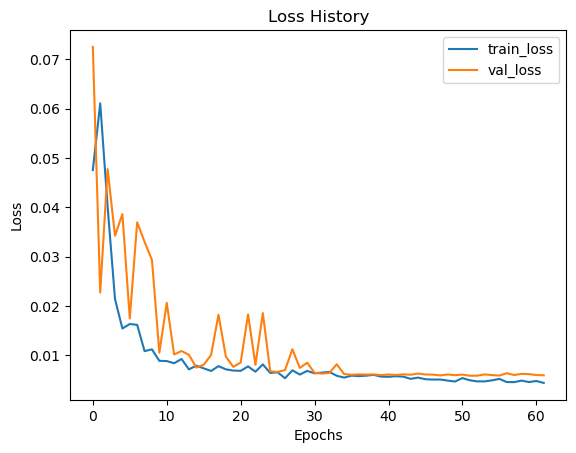

In [43]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Loss History.png")
plt.show()

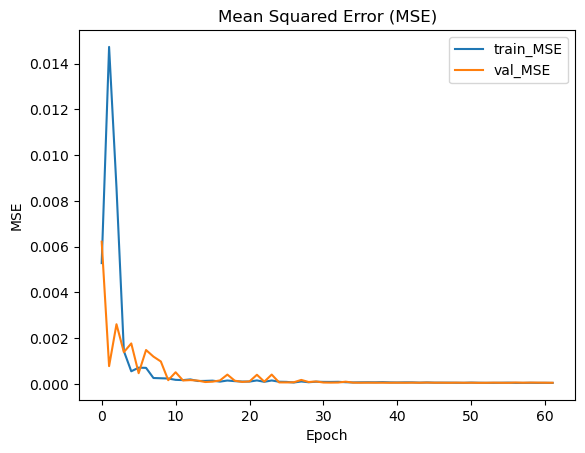

In [44]:
plt.plot(history.history['mean_squared_error'], label='train_MSE')
plt.plot(history.history['val_mean_squared_error'], label='val_MSE')
plt.title('Mean Squared Error (MSE)')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MSE History.png")
plt.show()

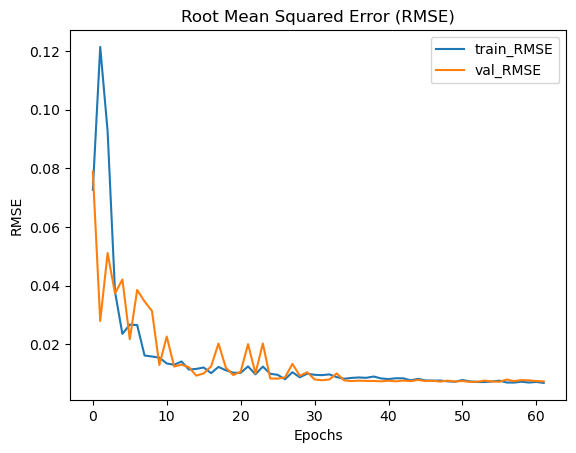

In [45]:
plt.plot(history.history['root_mean_squared_error'], label='train_RMSE')
plt.plot(history.history['val_root_mean_squared_error'], label='val_RMSE')
plt.title('Root Mean Squared Error (RMSE)')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - RMSE History.png")
plt.show()

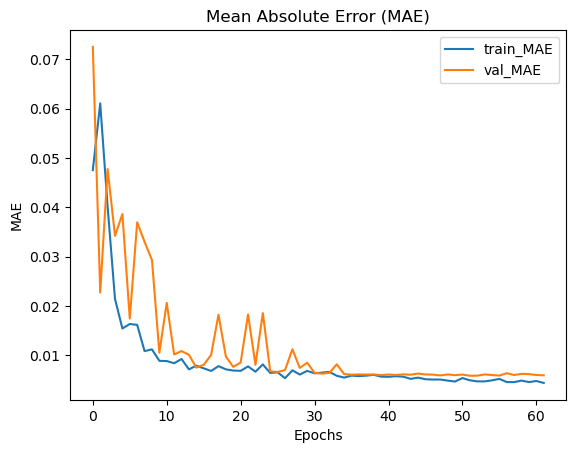

In [46]:
plt.plot(history.history['mean_absolute_error'], label='train_MAE')
plt.plot(history.history['val_mean_absolute_error'], label='val_MAE')
plt.title('Mean Absolute Error (MAE)')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAE History.png")
plt.show()

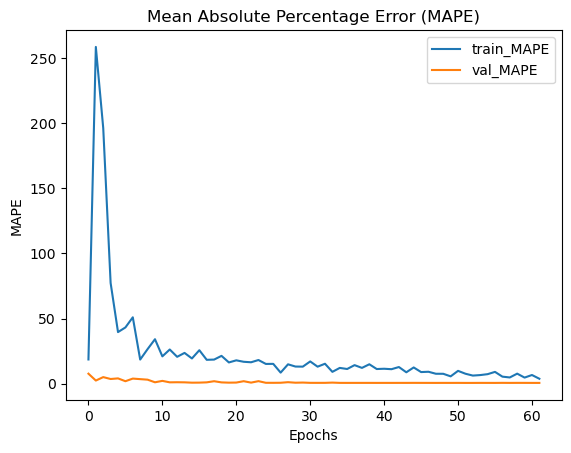

In [47]:
plt.plot(history.history['mean_absolute_percentage_error'], label='train_MAPE')
plt.plot(history.history['val_mean_absolute_percentage_error'], label='val_MAPE')
plt.title('Mean Absolute Percentage Error (MAPE)')
plt.xlabel('Epochs')
plt.ylabel('MAPE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAPE History.png")
plt.show()

Fazer uma predição

2025-04-14 19:13:27.793756: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Inputs Shape: (7598, 4, 3)
Labels Shape: (7598, 1, 1)
Prediction Shape: (7598, 1, 10)


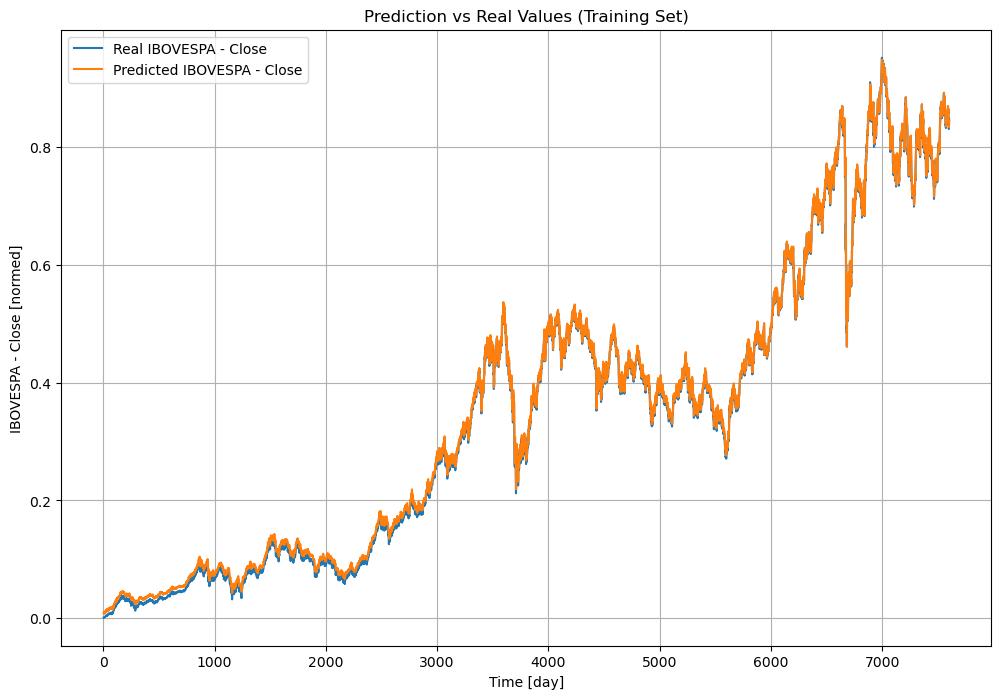

In [48]:
# create inputs and labels
inputs, labels = None, None
for train in iter(multi_window.train):
  if inputs is None:
    inputs = train[0]
    labels = train[1]
  else:
    inputs = np.concatenate((inputs, train[0]), axis=0)
    labels = np.concatenate((labels, train[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)column), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot shifted
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Training Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Training Set).png")
plt.show()

Inputs Shape: (257, 4, 3)
Labels Shape: (257, 1, 1)
Prediction Shape: (257, 1, 10)


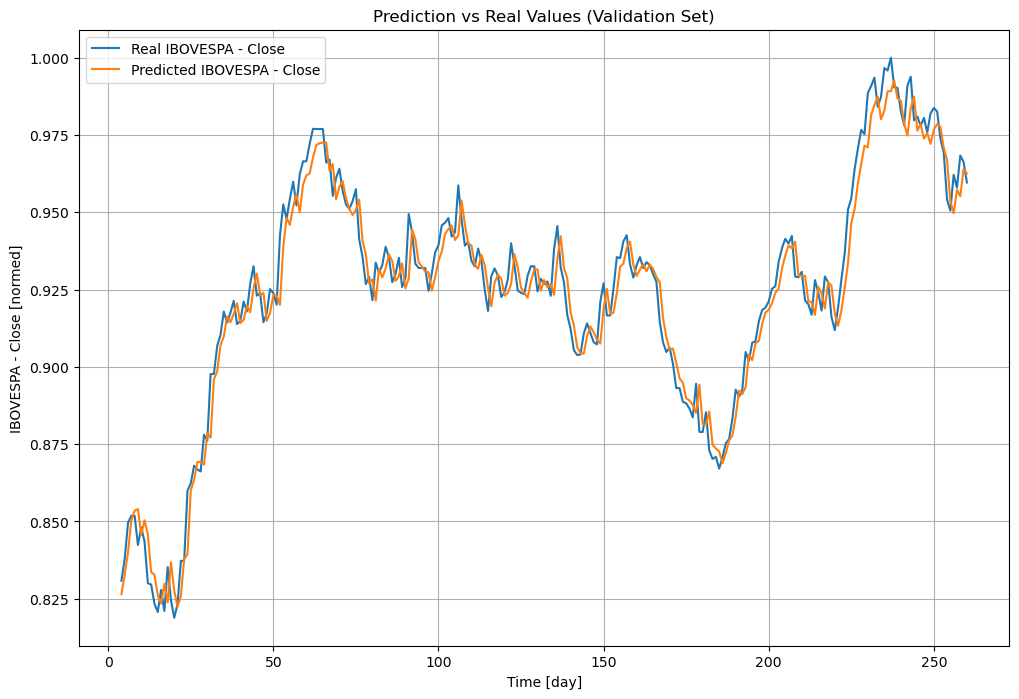

In [49]:
# create inputs and labels
inputs, labels = None, None
for val in iter(multi_window.val):
  if inputs is None:
    inputs = val[0]
    labels = val[1]
  else:
    inputs = np.concatenate((inputs, val[0]), axis=0)
    labels = np.concatenate((labels, val[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# plot the labels and predictions
# for i in range(2):#OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Validation Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Validation Set).png")
plt.show()

Inputs Shape: (125, 4, 3)
Labels Shape: (125, 1, 1)
Prediction Shape: (125, 1, 10)


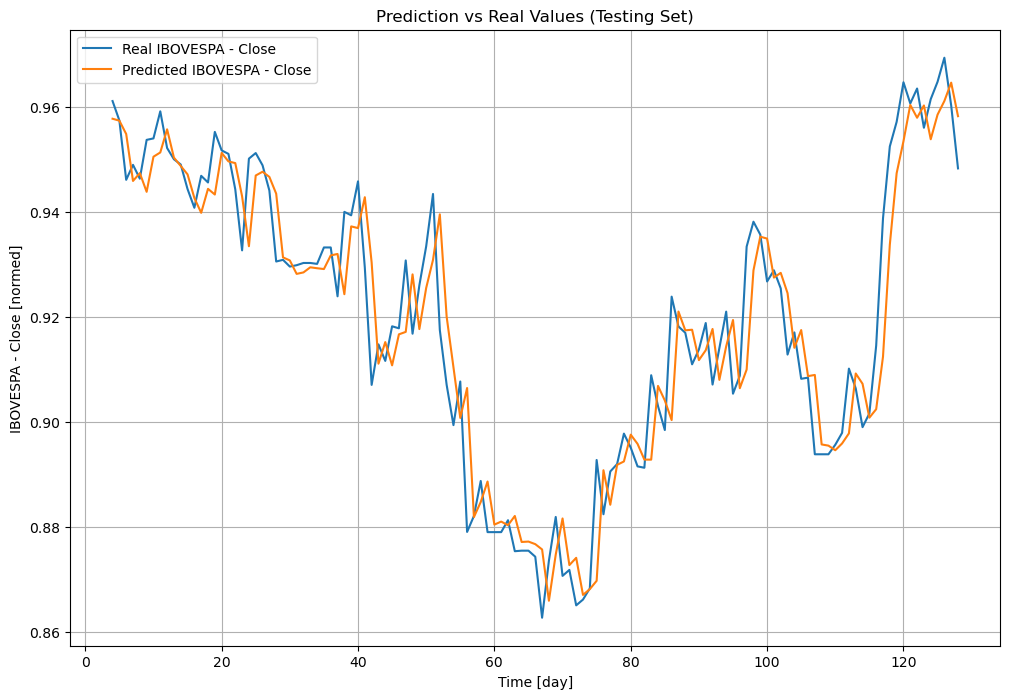

In [50]:
# create inputs and labels
inputs, labels = None, None
for test in iter(multi_window.test):
  if inputs is None:
    inputs = test[0]
    labels = test[1]
  else:
    inputs = np.concatenate((inputs, test[0]), axis=0)
    labels = np.concatenate((labels, test[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Testing Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Testing Set).png")
plt.show()

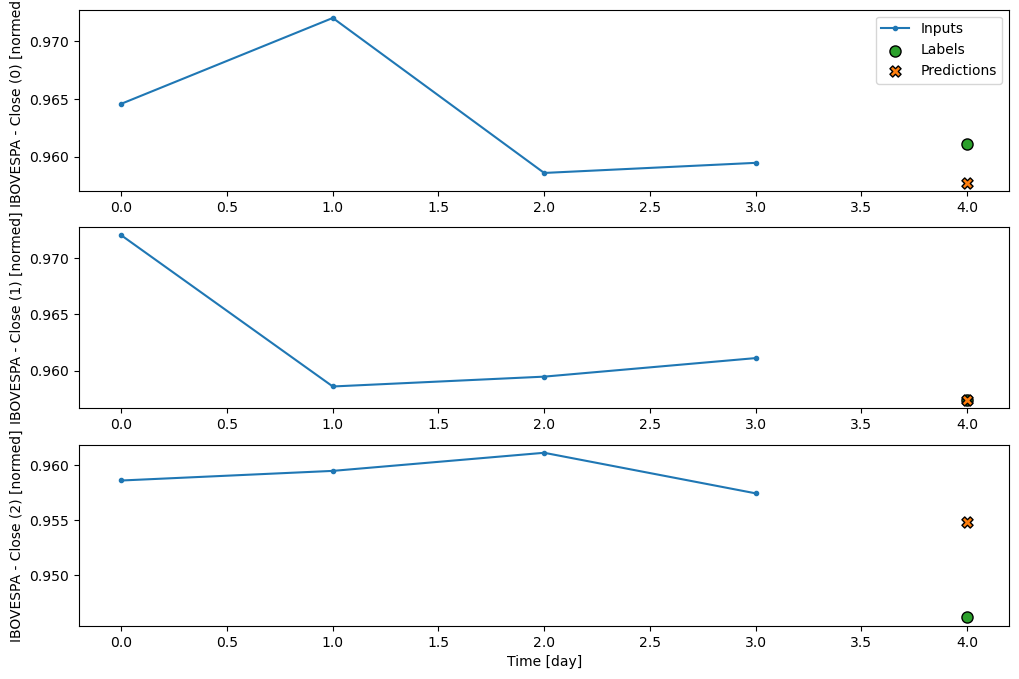

In [51]:
# multi_window.example = next(iter(multi_window.test))
multi_window.plot(model, plot_col=COLUMN_TO_PREDICT)

In [52]:
run_end = time.time()

timeMillisec = (run_end-run_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:1m:53s:58ms


In [53]:
# make a prediction
prediction = model.predict(multi_window.test)
prediction

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step 

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


array([[[0.957744  , 0.957744  , 0.957744  , ..., 0.957744  ,
         0.957744  , 0.957744  ]],

       [[0.95737684, 0.95737684, 0.95737684, ..., 0.95737684,
         0.95737684, 0.95737684]],

       [[0.9548388 , 0.9548388 , 0.9548388 , ..., 0.9548388 ,
         0.9548388 , 0.9548388 ]],

       ...,

       [[0.96112216, 0.96112216, 0.96112216, ..., 0.96112216,
         0.96112216, 0.96112216]],

       [[0.9646221 , 0.9646221 , 0.9646221 , ..., 0.9646221 ,
         0.9646221 , 0.9646221 ]],

       [[0.9582327 , 0.9582327 , 0.9582327 , ..., 0.9582327 ,
         0.9582327 , 0.9582327 ]]], shape=(125, 1, 10), dtype=float32)

In [54]:
prediction.shape

(125, 1, 10)

Salvar e carregar modelo

In [55]:
# model = ...  # Get model (Sequential, Functional Model, or Model subclass)
# model.save('path/to/location.keras')  # The file needs to end with the .keras extension
# model = keras.models.load_model('path/to/location.keras')